In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.backends.backend_pdf import PdfPages
from scipy.interpolate import UnivariateSpline
import os
import cv2
import glob


## Find 6 parameters not good but seem that it is easy to fit - option 1

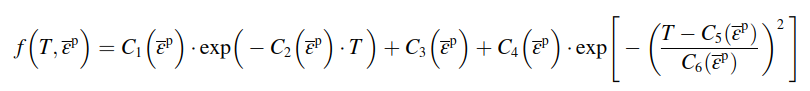

Perform Fitting and Save Results

In [3]:
def fit_6_parameters(file, T, indices, starting_column, r_value):
    data = pd.read_csv(f"{file}_ref.csv")
    output_pdf = f"6_Parameters_{file}.pdf"
    csv_output_path = f'6_Parameters_{file}_result.csv'

    # Define the double Gaussian function
    def f_func(T, C1, C2, C3, C4, C5, C6):
        return C1 * np.exp(-C2 * T) + C3 + C4 * np.exp(-((T - C5) / C6)**2)

    # Initialize variables
    fitted_parameters = []
    r_squared_values = []
    peeq_values = []


    # Loop through specified rows and perform fitting
    for j, i in enumerate(indices):
        if i != 0:
            # Extract stress data
            stress = data.iloc[i, starting_column:].values

            # Provide initial guesses and bounds
            # the best, but can be hard to fit
            #initial_guess = [1, 0.005, 0.7, 0.2, 550, 140]
            #bounds = ([0, 0.0001, 0, 0, 0, 100], [3., 0.01, 1, 2, 600, 350])
            #initial_guess = [1, 0.001, 0.5, 1, 300, 100]
            #bounds = ([0, 0.0001, 0, 0, 0, 100], [5., 0.003, 3.0, 10, 600, 500])
            #initial_guess = [1, 0.001, 0.5, 1, 400, 100]
            #bounds = ([0, 0.0001, 0, 0, 0, 100], [5., 0.003, 3.0, 10, 600, 200])
            #initial_guess = [1, 0.001, 0.5, 1, 300, 100]
            #bounds = ([0, 0.0001, 0, 0, 0, 100], [5., 0.003, 3.0, 10, 600, 500])
            #initial_guess = [1, 0.001, 0.5, 1, 300, 100]
            #bounds = ([0, 0.0001, 0, 0, 0, 100], [5., 0.003, 3.0, 10, 600, 500])
            #initial_guess = [1, 0.001, 0.5, 1, 300, 100]
            #bounds = ([0, 0.0001, 0, 0, 0, 100], [5., 0.003, 3.0, 10, 600, 500])
            #initial_guess = [1, 0.001, 0.5, 1, 300, 100]
            #bounds = ([0, 0.0001, 0, 0, 0, 100], [5., 0.1, 3, 10, 600, 500])
            #not good but seem that it is easy to fit
            initial_guess = [1, 0.001, 0.5, 1, 300, 100]
            bounds = ([0, 0.0001, 0, 0, 0, 100], [5., 0.003, 3.0, 10, 600, 500])

            # Perform curve fitting
            params, _ = curve_fit(f_func, T, stress, p0=initial_guess, bounds=bounds, maxfev=100000)
            residuals = stress - f_func(T, *params)
            ss_res = np.sum(residuals**2)
            ss_tot = np.sum((stress - np.mean(stress))**2)
            r_squared = 1 - (ss_res / ss_tot)

            # Save results
            fitted_parameters.append([data.iloc[i, 0], *params, r_squared])
            r_squared_values.append(r_squared)
            peeq_values.append(data.iloc[i, 0])

    # Save all results to CSV
    columns = ['PEEQ', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'R²']
    fitted_parameters_df = pd.DataFrame(fitted_parameters, columns=columns)
    fitted_parameters_df.to_csv(csv_output_path, index=False)
    print(f"Fitting results saved to '{csv_output_path}'")
    
    # Calculate R² statistics
    min_r2 = min(r_squared_values)
    max_r2 = max(r_squared_values)
    avg_r2 = np.mean(r_squared_values)
    peeq_min_r2 = peeq_values[r_squared_values.index(min_r2)]
    peeq_max_r2 = peeq_values[r_squared_values.index(max_r2)]
    # Calculate percentage of R² values below 0.95
    below = sum(1 for r2 in r_squared_values if r2 < r_value)
    percentage_below = (below / len(r_squared_values)) * 100

    # Print R² statistics
    print("\nR² Statistics:")
    print(f"Smallest R²: {min_r2:.3f} (PEEQ: {peeq_min_r2:.5f})")
    print(f"Largest R²: {max_r2:.3f} (PEEQ: {peeq_max_r2:.5f})")
    print(f"Average R²: {avg_r2:.3f}")
    print(f"Percentage of R² values below {r_value}: {percentage_below:.2f}%")

## Find 6 parameters the best, but can be hard to fit - option 2

In [3]:
def fit_6_parameters(file, T, indices, starting_column, r_value):
    data = pd.read_csv(f"{file}_ref.csv")
    output_pdf = f"6_Parameters_{file}.pdf"
    csv_output_path = f'6_Parameters_{file}_result_best.csv'

    # Define the double Gaussian function
    def f_func(T, C1, C2, C3, C4, C5, C6):
        return C1 * np.exp(-C2 * T) + C3 + C4 * np.exp(-((T - C5) / C6)**2)

    # Initialize variables
    fitted_parameters = []
    r_squared_values = []
    peeq_values = []


    # Loop through specified rows and perform fitting
    for j, i in enumerate(indices):
        if i != 0:
            # Extract stress data
            stress = data.iloc[i, starting_column:].values

            # Provide initial guesses and bounds
            # the best, but can be hard to fit
            initial_guess = [1, 0.005, 0.7, 0.2, 550, 140]
            bounds = ([0, 0.0001, 0, 0, 0, 100], [3., 0.01, 1, 2, 600, 350])
            #initial_guess = [1, 0.001, 0.5, 1, 300, 100]
            #bounds = ([0, 0.0001, 0, 0, 0, 100], [5., 0.003, 3.0, 10, 600, 500])
            #initial_guess = [1, 0.001, 0.5, 1, 400, 100]
            #bounds = ([0, 0.0001, 0, 0, 0, 100], [5., 0.003, 3.0, 10, 600, 200])
            #initial_guess = [1, 0.001, 0.5, 1, 300, 100]
            #bounds = ([0, 0.0001, 0, 0, 0, 100], [5., 0.003, 3.0, 10, 600, 500])
            #initial_guess = [1, 0.001, 0.5, 1, 300, 100]
            #bounds = ([0, 0.0001, 0, 0, 0, 100], [5., 0.003, 3.0, 10, 600, 500])
            #initial_guess = [1, 0.001, 0.5, 1, 300, 100]
            #bounds = ([0, 0.0001, 0, 0, 0, 100], [5., 0.003, 3.0, 10, 600, 500])
            #initial_guess = [1, 0.001, 0.5, 1, 300, 100]
            #bounds = ([0, 0.0001, 0, 0, 0, 100], [5., 0.1, 3, 10, 600, 500])
            #not good but seem that it is easy to fit
            #initial_guess = [1, 0.001, 0.5, 1, 300, 100]
            #bounds = ([0, 0.0001, 0, 0, 0, 100], [5., 0.003, 3.0, 10, 600, 500])

            # Perform curve fitting
            params, _ = curve_fit(f_func, T, stress, p0=initial_guess, bounds=bounds, maxfev=100000)
            residuals = stress - f_func(T, *params)
            ss_res = np.sum(residuals**2)
            ss_tot = np.sum((stress - np.mean(stress))**2)
            r_squared = 1 - (ss_res / ss_tot)

            # Save results
            fitted_parameters.append([data.iloc[i, 0], *params, r_squared])
            r_squared_values.append(r_squared)
            peeq_values.append(data.iloc[i, 0])

    # Save all results to CSV
    columns = ['PEEQ', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'R²']
    fitted_parameters_df = pd.DataFrame(fitted_parameters, columns=columns)
    fitted_parameters_df.to_csv(csv_output_path, index=False)
    print(f"Fitting results saved to '{csv_output_path}'")
    
    # Calculate R² statistics
    min_r2 = min(r_squared_values)
    max_r2 = max(r_squared_values)
    avg_r2 = np.mean(r_squared_values)
    peeq_min_r2 = peeq_values[r_squared_values.index(min_r2)]
    peeq_max_r2 = peeq_values[r_squared_values.index(max_r2)]
    # Calculate percentage of R² values below 0.95
    below = sum(1 for r2 in r_squared_values if r2 < r_value)
    percentage_below = (below / len(r_squared_values)) * 100

    # Print R² statistics
    print("\nR² Statistics:")
    print(f"Smallest R²: {min_r2:.3f} (PEEQ: {peeq_min_r2:.5f})")
    print(f"Largest R²: {max_r2:.3f} (PEEQ: {peeq_max_r2:.5f})")
    print(f"Average R²: {avg_r2:.3f}")
    print(f"Percentage of R² values below {r_value}: {percentage_below:.2f}%")

Perform Fitting and Save Results

In [4]:
def generate_pdf(file, T, starting_column):
    # Read the results from the saved CSV file
    results = pd.read_csv(f"6_Parameters_{file}_result.csv")
    original_data = pd.read_csv(f"{file}_ref.csv").iloc[1:]
    output_pdf = f"6_Parameters_{file}_final.pdf"
    output_images_dir = "plots"

    # Create directory for plots
    os.makedirs(output_images_dir, exist_ok=True)

    # Initialize a PDF for storing plots
    pdf_pages = PdfPages(output_pdf)

    # Loop through the results to generate plots
    for index, row in results.iterrows():
        peeq = row['PEEQ']  # Extract PEEQ
        params = row[1:-1].values  # Extract parameters C1 to C9
        r_squared = row['R²']  # Extract R² value

        # Extract the original data
        stress_original = original_data.iloc[index, starting_column:].values

        # Generate data for the fitted curve
        T_fit = np.linspace(np.min(T), np.max(T), 100)
        stress_fit = (
            params[0] * np.exp(-params[1] * T_fit) + params[2] +
            params[3] * np.exp(-((T_fit - params[4]) / params[5])**2) 
        )

        # Plot both original data and fitted curve
        plt.figure()
        plt.ylim(0.8, 2.4) #0.0001 and 0.01
        #plt.ylim(0.8, 2) #0.001 and 0.1
        plt.plot(T, stress_original, 'o', label='Data')  # Plot original data
        plt.plot(T_fit, stress_fit, '-', label='Fitted Curve')  # Plot fitted curve
        plt.xlabel('Temperature (K)')
        plt.ylabel('Normalized Stress')
        plt.title(f"PEEQ={peeq:.5f} (R² = {r_squared:.3f})", fontweight='bold')
        plt.legend([
            f'Data',
            f'Fit: C1={params[0]:.3f}, C2={params[1]:.3f}, C3={params[2]:.3f},\n'
            f'C4={params[3]:.3f}, C5={params[4]:.3f}, C6={params[5]:.3f}'
        ])
        
        # Save the current figure to the PDF
        pdf_pages.savefig()

        # Save the current figure as an image for video generation
        image_path = os.path.join(output_images_dir, f"plot_{index:03d}.png")
        plt.savefig(image_path, dpi=300)  # High resolution
        plt.close()

    # Close the PDF file
    pdf_pages.close()
    print(f"PDF with original data and fitted curves saved as '{output_pdf}'")
    print(f"Plots saved in '{output_images_dir}'")

In [5]:
file_0001 = 'Fitted_FC_TmpDpn_RD_StrRt0.0001'
#T = np.array([298.15, 373.15, 473.15, 573.15, 673.15]) #other strain-rates
T = np.array([77.15, 233.15, 298.15, 373.15, 473.15, 573.15, 673.15]) #0.0001
#indices = np.array([1,2,3, 4, 5, 6, 10,11,14,15,20,25,30,35,40,45,50,100,200,230,250,270,280,290,300,310])
indices = np.arange(0, 396)
#starting_column = 6 #other strain-rates
starting_column = 8 #0.0001
r_value = 0.99

In [26]:
fit_6_parameters(file_0001, T, indices, starting_column, r_value )

Fitting results saved to '6_Parameters_Fitted_FC_TmpDpn_RD_StrRt0.0001_result_best.csv'

R² Statistics:
Smallest R²: 0.971 (PEEQ: 0.00011)
Largest R²: 1.000 (PEEQ: 0.03600)
Average R²: 0.994
Percentage of R² values below 0.99: 0.25%


In [8]:
generate_pdf(file_0001, T, starting_column)

PDF with original data and fitted curves saved as '6_Parameters_Fitted_FC_TmpDpn_RD_StrRt0.0001_final.pdf'
Plots saved in 'plots'


## Plot all C-parameters option 1

In [27]:
data = pd.read_csv(f"6_Parameters_{file_0001}_result.csv")

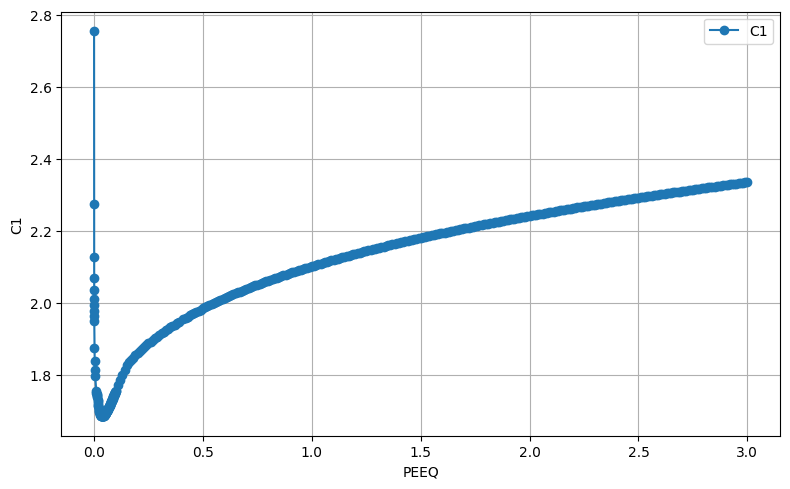

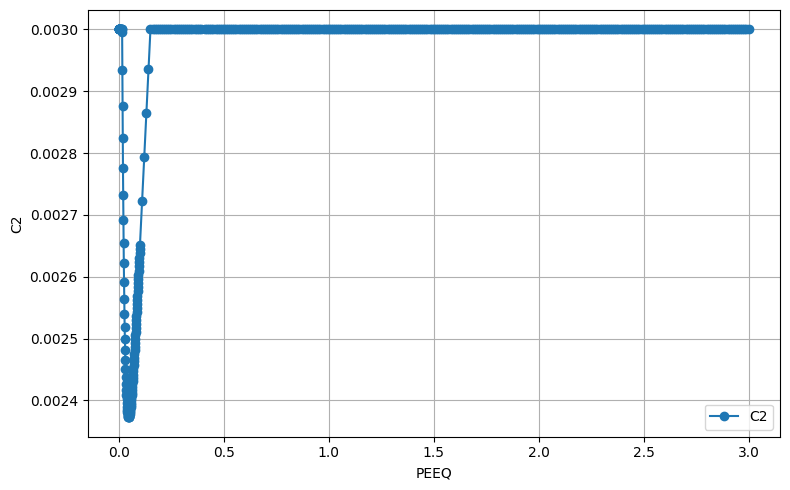

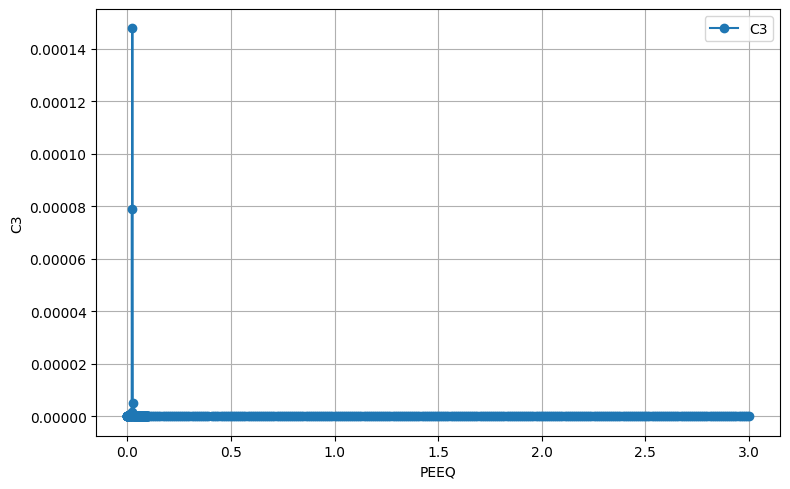

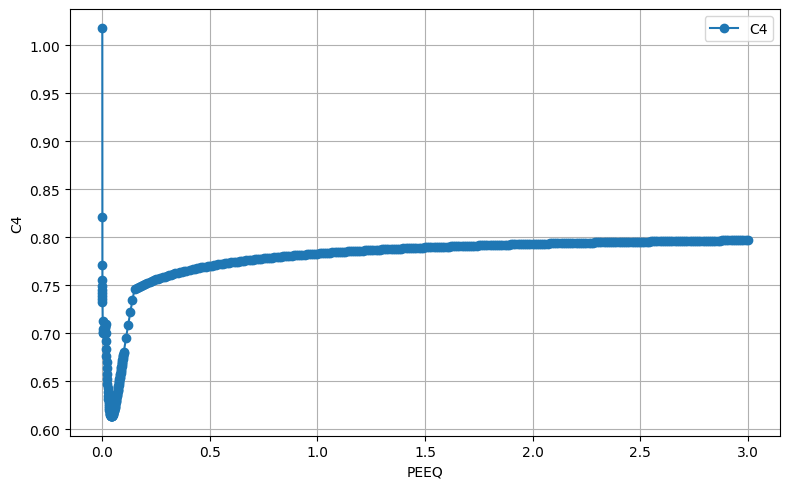

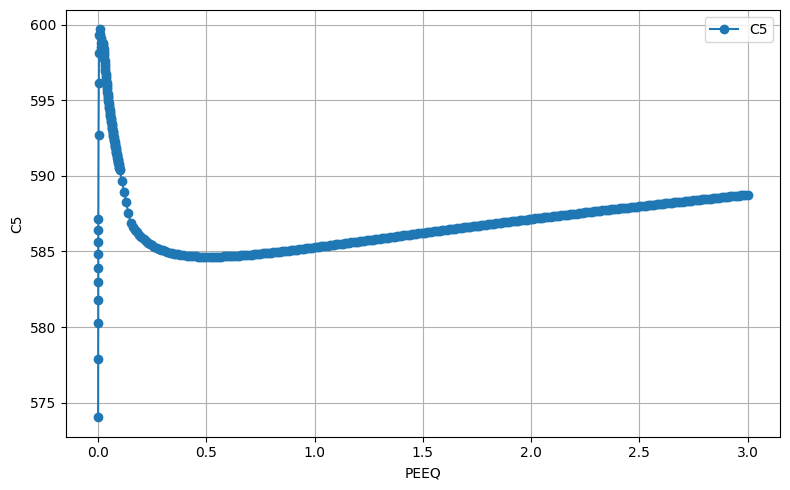

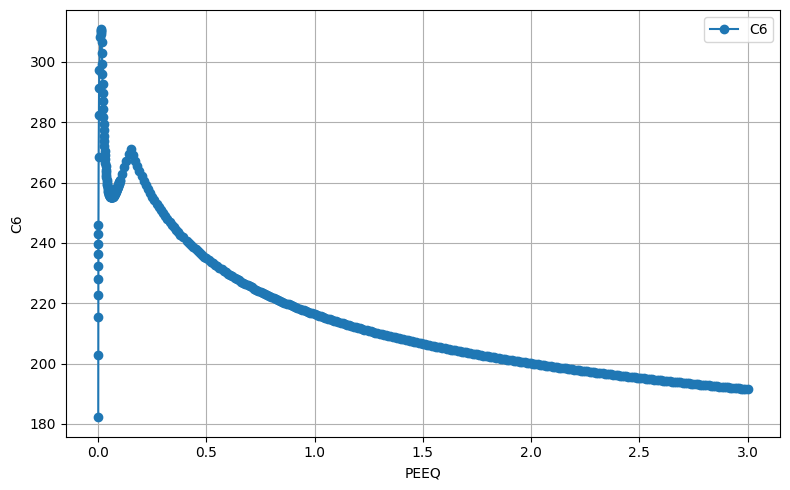

In [37]:
# Specify the column names
x_column = 'PEEQ'
y_columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']

# Specify the PEEQ bounds
peeq_lower_bound = 0
peeq_upper_bound = 3

# Filter data based on the PEEQ bounds
filtered_data = data[
    (data[x_column] > peeq_lower_bound) & 
    (data[x_column] <= peeq_upper_bound) & 
    (data[x_column] != 0.4)  # Exclude strain = 0.4
]

# Iterate over each y-column and create a plot
for y_column in y_columns:
    plt.figure(figsize=(8, 5))
    plt.plot(filtered_data[x_column], filtered_data[y_column], marker='o', linestyle='-', label=y_column)
    plt.xlabel('PEEQ')
    plt.ylabel(y_column)
    #plt.title(f'{y_column} vs ')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Plot all C-parameters option 2

In [11]:
file_0001 = 'Fitted_FC_TmpDpn_RD_StrRt0.0001'
#T = np.array([298.15, 373.15, 473.15, 573.15, 673.15]) #other strain-rates
T = np.array([77.15, 233.15, 298.15, 373.15, 473.15, 573.15, 673.15]) #0.0001
#indices = np.array([1,2,3, 4, 5, 6, 10,11,14,15,20,25,30,35,40,45,50,100,200,230,250,270,280,290,300,310])
indices = np.arange(0, 396)
#starting_column = 6 #other strain-rates
starting_column = 8 #0.0001
r_value = 0.99
fit_6_parameters(file_0001, T, indices, starting_column, r_value )

Fitting results saved to '6_Parameters_Fitted_FC_TmpDpn_RD_StrRt0.0001_result_best.csv'

R² Statistics:
Smallest R²: 0.971 (PEEQ: 0.00011)
Largest R²: 1.000 (PEEQ: 0.03600)
Average R²: 0.994
Percentage of R² values below 0.99: 0.25%


In [12]:
data = pd.read_csv(f"6_Parameters_{file_0001}_result_best.csv")

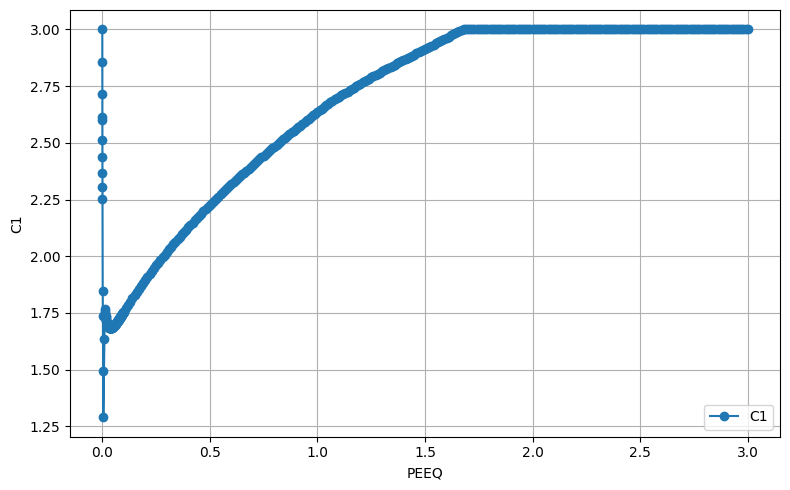

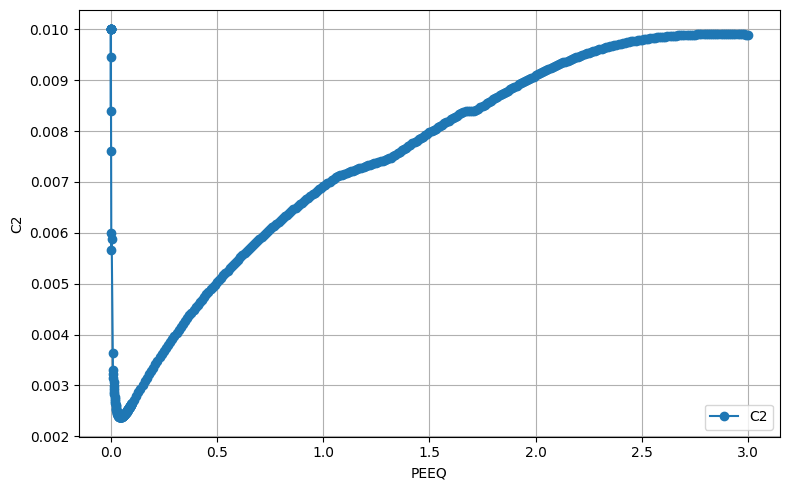

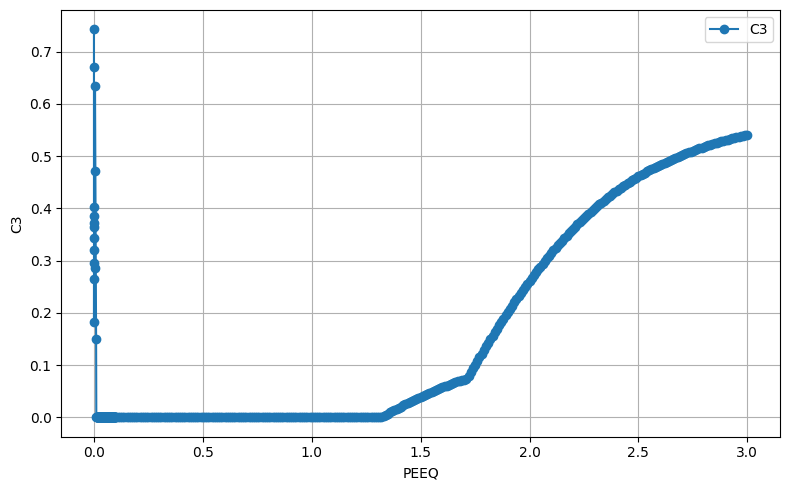

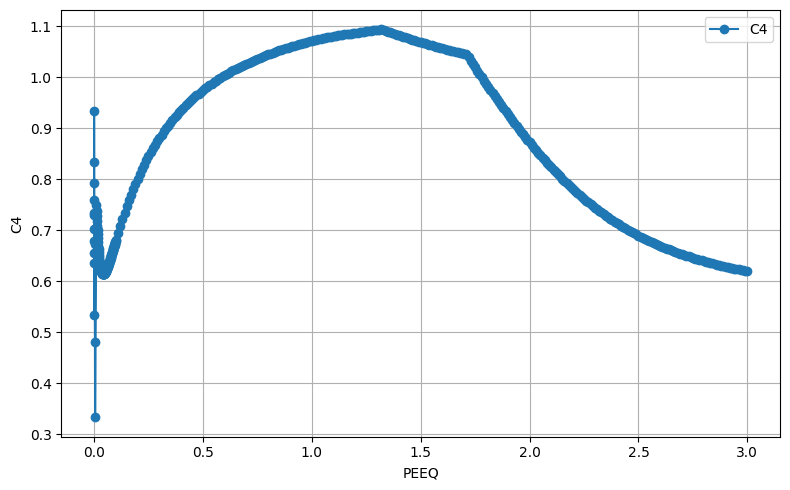

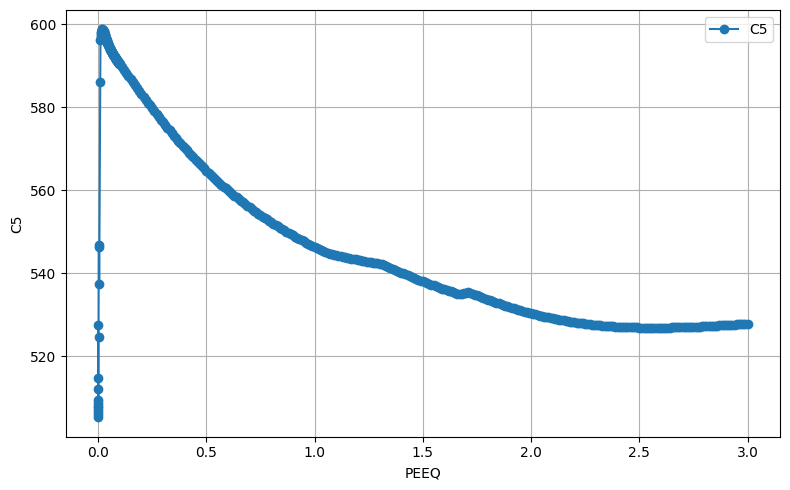

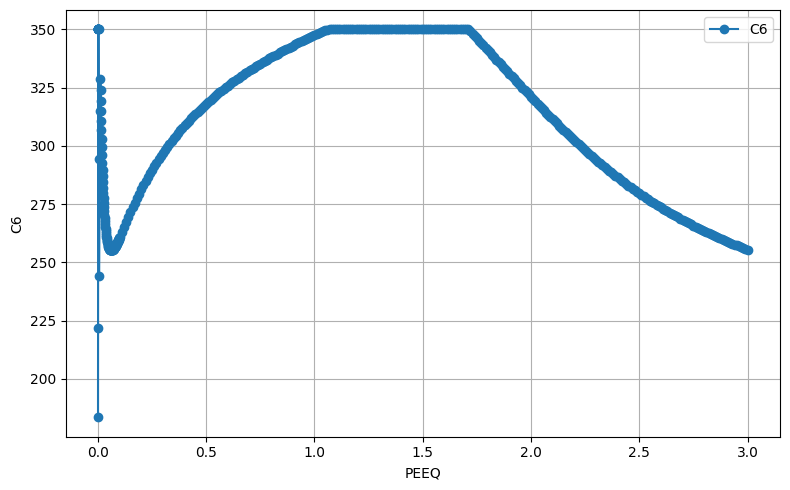

In [13]:
# Specify the column names
x_column = 'PEEQ'
y_columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']

# Specify the PEEQ bounds
peeq_lower_bound = 0
peeq_upper_bound = 3

#Filter data based on the PEEQ bounds
filtered_data = data[
    (data[x_column] > peeq_lower_bound) & 
    (data[x_column] <= peeq_upper_bound)
]

# Iterate over each y-column and create a plot
for y_column in y_columns:
    plt.figure(figsize=(8, 5))
    plt.plot(filtered_data[x_column], filtered_data[y_column], marker='o', linestyle='-', label=y_column)
    plt.xlabel('PEEQ')
    plt.ylabel(y_column)
    #plt.title(f'{y_column} vs ')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [42]:
df_para_fit = pd.DataFrame({x_column: strain})

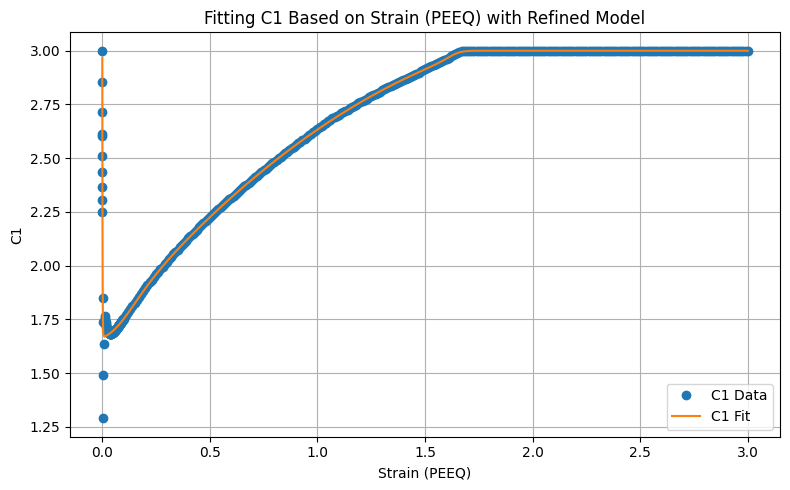

Fitted parameters for C1:
Q1: 1.93400, Q2: -932.87823, Q3: 1.65573, Q4: -0.25496,
P0: 1.19610, P1: 1.69199


In [43]:
# Load data from the CSV file
#file_0001 = '6_Parameters_Fitted_FC_TmpDpn_RD_StrRt0.0001_result'
file_0001 = '6_Parameters_Fitted_FC_TmpDpn_RD_StrRt0.0001_result_best'
data = pd.read_csv(f"{file_0001}.csv")
x_column = 'PEEQ'
y_column = 'C1'

# Specify the PEEQ bounds
peeq_lower_bound = 0
peeq_upper_bound = 3

# Filter data based on the PEEQ bounds
# Filter data based on the PEEQ bounds
filtered_data = data[
    (data[x_column] > peeq_lower_bound) & 
    (data[x_column] <= peeq_upper_bound) #& 
    #(data[x_column] != 0.4)  # Exclude strain = 0.4
]

# Extract strain (PEEQ) and C1 values
strain = filtered_data[x_column].values
C1 = filtered_data[y_column].values

# Create a DataFrame to store the PEEQ and fitted C1 values
df_para_fit = pd.DataFrame({x_column: strain})

# Define the refined function
# def refined_ci_function(strain, Q1, Q2, Q3, Q4, P0, P1):
#     """
#     Refined function for C1:
#     C1 = Q1 * exp(-Q2 * strain) + Q3 * exp(-Q4 * strain) + P0 + P1 * strain
#     """
#     exponential_term1 = Q1 * np.exp(-Q2 * strain)
#     exponential_term2 = Q3 * np.exp(-Q4 * strain)
#     polynomial_term = P0 + P1 * strain
#     return exponential_term1 + exponential_term2 + polynomial_term

def refined_ci_function(strain, a1, b1, c1, a2, b2, b3, x0, x1, w1, w2):
    sigmoid1 = 1 / (1 + np.exp(-w1 * (strain - x0)))
    sigmoid2 = 1 / (1 + np.exp(-w2 * (strain - x1)))

    segment1 = (1-sigmoid1) * (a1 * np.exp(b1 * strain) + c1)
    segment2 = (sigmoid1 * (1 - sigmoid2)) * (a2 * strain**2 + b2 * strain + b3)
    segment3 = sigmoid2 * 3.0

    return segment1 + segment2 + segment3


# Define initial guesses and bounds
# initial_guess = [5.0, 300.0, 1, 5.0, 1, 1]  # [Q1, Q2, Q3, Q4, P0, P1]
# bounds = (
#     [0.0, 1.0, 1.0, 0, -1, -0.5],  # Lower bounds
#     [1000.0, 400.0, 100.0, 100.0, 5.0, 2.0]  # Upper bounds
# )
initial_guess = [1.5, -10.0, 1.7, 0.5, 0.5, 1.7, 0.04, 1.68, 50, 50]

# Perform the curve fitting
params, _ = curve_fit(
    refined_ci_function, strain, C1, p0=initial_guess, maxfev=100000
)

# Generate fitted C1 values corresponding to the original strain values
C1_fitted = refined_ci_function(strain, *params)

# Add the fitted values to the DataFrame
df_para_fit['CT1'] = C1_fitted

# Plot experimental data and fitted curve
plt.figure(figsize=(8, 5))
plt.plot(strain, C1, 'o', label='C1 Data')  # Original data
plt.plot(strain, C1_fitted, '-', label='C1 Fit')  # Fitted curve
plt.xlabel('Strain (PEEQ)')
plt.ylabel('C1')
plt.title('Fitting C1 Based on Strain (PEEQ) with Refined Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the fitted parameters
print("Fitted parameters for C1:")
print(f"Q1: {params[0]:.5f}, Q2: {params[1]:.5f}, Q3: {params[2]:.5f}, Q4: {params[3]:.5f},")
print(f"P0: {params[4]:.5f}, P1: {params[5]:.5f}")

# Save the DataFrame to a CSV file (optional)
df_para_fit.to_csv('fitted_C1_values.csv', index=False)

C:\Users\meian\AppData\Local\Temp\ipykernel_22352\2883363759.py:37: RuntimeWarning: overflow encountered in exp
  exp = (1 - sigmoid) * (a1 * np.exp(b1 * strain) + c1)
C:\Users\meian\AppData\Local\Temp\ipykernel_22352\2883363759.py:37: RuntimeWarning: invalid value encountered in multiply
  exp = (1 - sigmoid) * (a1 * np.exp(b1 * strain) + c1)


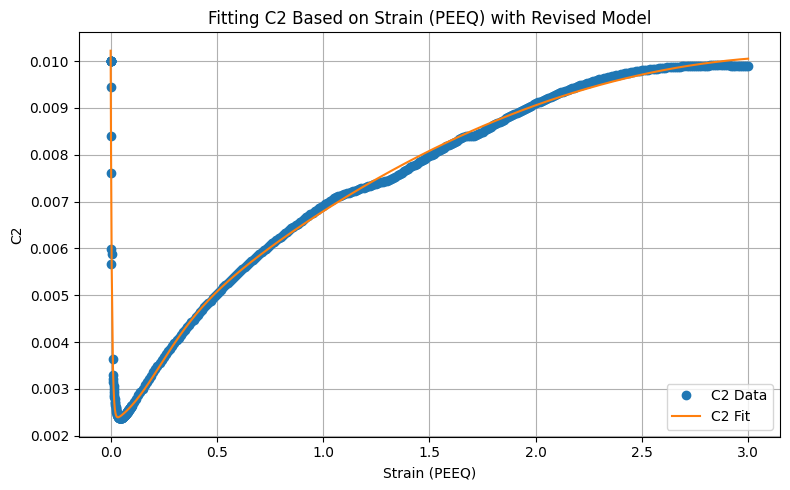

Fitted parameters for C2:
Q1: 0.00988, Q2: -175.24551, Q3: 0.00206, Q4: -0.00063,
P0: 0.00416, P1: 0.00327, P2: 0.15757


In [44]:
x_column = 'PEEQ'
y_column_c2 = 'C2'  # Change to C2 for fitting

# Specify the PEEQ bounds
peeq_lower_bound = 0
peeq_upper_bound = 3

# Filter data based on the PEEQ bounds
# Filter data based on the PEEQ bounds
filtered_data = data[
    (data[x_column] > peeq_lower_bound) & 
    (data[x_column] <= peeq_upper_bound) #& 
    #(data[x_column] != 0.4)  # Exclude strain = 0.4
]

# Extract strain (PEEQ) and C2 values
strain = filtered_data[x_column].values
C2 = filtered_data[y_column_c2].values

# Ensure `df_para_fit` already exists and contains 'PEEQ' and 'CT1'
if 'PEEQ' not in df_para_fit.columns:
    df_para_fit = pd.DataFrame({x_column: strain})

# Define the revised function for C2
# def c2_function(strain, Q1, Q2, Q3, Q4, P0, P1, P2):
#     """
#     Function for fitting C2:
#     C2 = Q1 * exp(-Q2 * strain) + Q3 * exp(-Q4 * strain) + P0 + P1 * strain + P2 * strain^2
#     """
#     exponential_term1 = Q1 * np.exp(-Q2 * strain)
#     exponential_term2 = Q3 * np.exp(-Q4 * strain)
#     polynomial_term = P0 + P1 * strain + P2 * strain**2
#     return exponential_term1 + exponential_term2 + polynomial_term

def c2_function(strain, a1, b1, c1, a2, b2, c2, x0, w):
    sigmoid = 1 / (1 + np.exp(-w * (strain - x0)))
    exp = (1 - sigmoid) * (a1 * np.exp(b1 * strain) + c1)
    quad = sigmoid * (a2 * strain**2 + b2 * strain + c2)
    return exp + quad

# Define initial guesses and bounds
# initial_guess = [0.03, 3.0, 0.02, 10.0, 0.005, 0.01, 0.001]  # [Q1, Q2, Q3, Q4, P0, P1, P2]
# bounds = (
#     [-1, 1.0, 0.01, 1.0, 0.001, -0.01, -0.005],  # Lower bounds
#     [0.05, 30.0, 0.03, 50.0, 0.01, 0.05, 0.005]    # Upper bounds
# )
initial_guess = [0.01, -10.0, 0.002, 0.5, 0.5, 0.002, 0.04, 50]

# Perform the curve fitting
params, _ = curve_fit(
    c2_function, strain, C2, p0=initial_guess, maxfev=100000
)

# Generate fitted C2 values corresponding to the original strain values
C2_fitted = c2_function(strain, *params)

# Add the fitted C2 values to the DataFrame
df_para_fit['CT2'] = C2_fitted

# Plot experimental data and fitted curve
plt.figure(figsize=(8, 5))
plt.plot(strain, C2, 'o', label='C2 Data')  # Original data
plt.plot(strain, C2_fitted, '-', label='C2 Fit')  # Fitted curve
plt.xlabel('Strain (PEEQ)')
plt.ylabel('C2')
plt.title('Fitting C2 Based on Strain (PEEQ) with Revised Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the fitted parameters
print("Fitted parameters for C2:")
print(f"Q1: {params[0]:.5f}, Q2: {params[1]:.5f}, Q3: {params[2]:.5f}, Q4: {params[3]:.5f},")
print(f"P0: {params[4]:.5f}, P1: {params[5]:.5f}, P2: {params[6]:.5f}")

# Save the DataFrame to a CSV file (optional)
df_para_fit.to_csv('fitted_C1_C2_values.csv', index=False)

C:\Users\meian\AppData\Local\Temp\ipykernel_22352\3083668613.py:38: RuntimeWarning: overflow encountered in exp
  sigmoid1 = 1 / (1 + np.exp(-w1 * (strain - x0)))


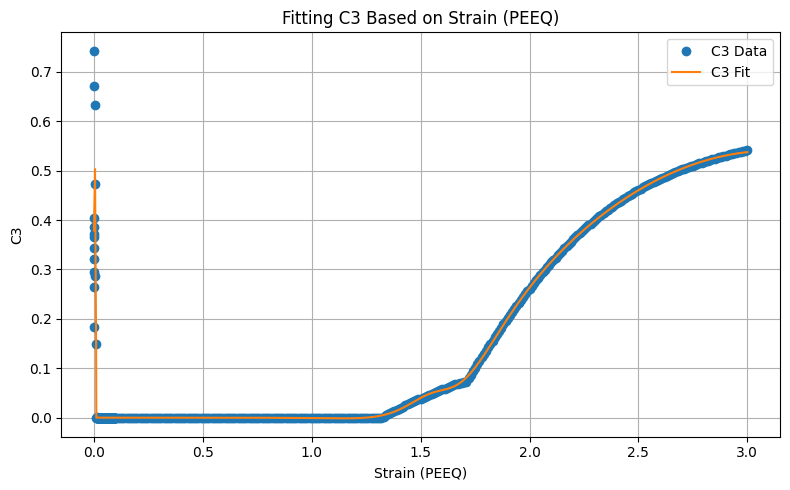

Fitted parameters for C3:
A1: 0.37619, B1: 58.12920, C1: 0.00016,
A2: -1.41795, B2: 2.37199, C2: -0.21233,
P0: 1.32161, P1: -1.51634, P2: 0.00982


In [45]:
x_column = 'PEEQ'
y_column_c3 = 'C3'  # Change to C3 for fitting

# Specify the PEEQ bounds
peeq_lower_bound = 0
peeq_upper_bound = 3

# Filter data based on the PEEQ bounds
# Filter data based on the PEEQ bounds
filtered_data = data[
    (data[x_column] > peeq_lower_bound) & 
    (data[x_column] <= peeq_upper_bound) #& 
    #(data[x_column] != 0.4)  # Exclude strain = 0.4
]

# Extract strain (PEEQ) and C3 values
strain = filtered_data[x_column].values
C3 = filtered_data[y_column_c3].values

# Define the function for C3
# def c3_function(strain, A1, B1, C1, A2, B2, C2, P0, P1, P2):
#     """
#     Function for fitting C3:
#     C3 = A1 * sin(B1 * strain + C1) + A2 * sin(B2 * strain + C2) + P0 + P1 * strain + P2 * strain^2
#     """
#     sinusoidal_term1 = A1 * np.sin(B1 * strain + C1)
#     sinusoidal_term2 = A2 * np.sin(B2 * strain + C2)
#     polynomial_term = P0 + P1 * strain + P2 * strain**2
#     return sinusoidal_term1 + sinusoidal_term2 + polynomial_term
def c3_function(strain, a1, b1, c1, a2, b2, a3, b3, b4, x0, x1, x2, w1, w2, w3):
    """
    Model for C3 with the following segments:
    - Exponential decay for 0 <= x <= x0
    - Constant value for x0 < x <= x1
    - Linear rise for x1 < x <= x2
    - Quadratic rise for x > x2
    """
    sigmoid1 = 1 / (1 + np.exp(-w1 * (strain - x0)))
    sigmoid2 = 1 / (1 + np.exp(-w2 * (strain - x1)))
    sigmoid3 = 1 / (1 + np.exp(-w3 * (strain - x2)))
    
    segment1 = (1 - sigmoid1) * (a1 * np.exp(b1 * strain) + c1)  # Exponential decay
    segment2 = sigmoid1 * (1 - sigmoid2) * c1  # Constant value
    segment3 = sigmoid2 * (1 - sigmoid3) * (a2 * strain + b2)  # Linear rise
    segment4 = sigmoid3 * (a3 * strain**2 + b3 * strain + b4)  # Quadratic rise
    
    return segment1 + segment2 + segment3 + segment4

# Define initial guesses and bounds
# initial_guess = [0.3, 5.0, 0.0, 0.2, 10.0, 0.0, 0.5, 0.1, 0.01]  # [A1, B1, C1, A2, B2, C2, P0, P1, P2]
# bounds = (
#     [0.1, 1.0, -np.pi, 0.1, 5.0, -np.pi, 0.0, -0.1, -0.01],  # Lower bounds
#     [0.5, 20.0, np.pi, 0.5, 20.0, np.pi, 1.0, 0.5, 0.05]     # Upper bounds
# )

initial_guess = [0.7, -10.0, 0.1, 0.5, 0.5, 0.2, 0.2, 0.2, 0.05, 1.5, 2.0, 50, 50, 50]

# Perform the curve fitting
params, _ = curve_fit(
    c3_function, strain, C3, p0=initial_guess, maxfev=100000
)

# Generate fitted C3 values corresponding to the original strain values
C3_fitted = c3_function(strain, *params)

# Ensure `df_para_fit` already exists
if 'PEEQ' not in df_para_fit.columns:
    df_para_fit = pd.DataFrame({x_column: strain})

# Add the fitted C3 values to the DataFrame
df_para_fit['CT3'] = C3_fitted

# Plot experimental data and fitted curve
plt.figure(figsize=(8, 5))
plt.plot(strain, C3, 'o', label='C3 Data')  # Original data
plt.plot(strain, C3_fitted, '-', label='C3 Fit')  # Fitted curve
plt.xlabel('Strain (PEEQ)')
plt.ylabel('C3')
plt.title('Fitting C3 Based on Strain (PEEQ)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the fitted parameters for C3
print("Fitted parameters for C3:")
print(f"A1: {params[0]:.5f}, B1: {params[1]:.5f}, C1: {params[2]:.5f},")
print(f"A2: {params[3]:.5f}, B2: {params[4]:.5f}, C2: {params[5]:.5f},")
print(f"P0: {params[6]:.5f}, P1: {params[7]:.5f}, P2: {params[8]:.5f}")

# Save the updated DataFrame to a CSV file
df_para_fit.to_csv('fitted_C1_C2_C3_values.csv', index=False)

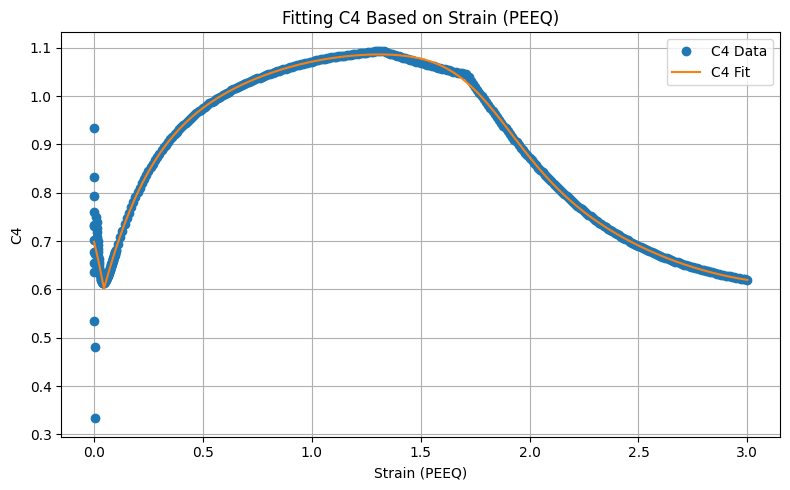

Fitted parameters for C4:
A1: -3.70113, B1: -3.75349, C1: 0.17855,
A2: 0.13542, B2: -0.88430, C2: 2.05399,
P0: -0.09832, P1: 1.26200, P2: -3.40632


In [46]:
x_column = 'PEEQ'
y_column_c4 = 'C4'  # Change to C4 for fitting

# Specify the PEEQ bounds
peeq_lower_bound = 0
peeq_upper_bound = 3

# Filter data based on the PEEQ bounds
# Filter data based on the PEEQ bounds
filtered_data = data[
    (data[x_column] > peeq_lower_bound) & 
    (data[x_column] <= peeq_upper_bound) #& 
    #(data[x_column] != 0.4)  # Exclude strain = 0.4
]

# Extract strain (PEEQ) and C4 values
strain = filtered_data[x_column].values
C4 = filtered_data[y_column_c4].values

# Define the function for C4
# def c4_function(strain, A1, B1, C1, A2, B2, C2, P0, P1, P2):
#     """
#     Function for fitting C4:
#     C4 = A1 * sin(B1 * strain + C1) + A2 * sin(B2 * strain + C2) + P0 + P1 * strain + P2 * strain^2
#     """
#     sinusoidal_term1 = A1 * np.sin(B1 * strain + C1)
#     sinusoidal_term2 = A2 * np.sin(B2 * strain + C2)
#     polynomial_term = P0 + P1 * strain + P2 * strain**2
#     return sinusoidal_term1 + sinusoidal_term2 + polynomial_term

def c4_function(strain, a1, b1, c1, a2, b2, c2, a3, b3, c3, x0, x1, x2, t1, t2, t3):
    """
    Improved model for C4:
    - Quadratic segment for initial part (0 <= x <= x0)
    - Quadratic rise for x0 < x <= x1
    - Linear drop for x1 < x <= x2
    - Quadratic drop for x > x2
    """
    sigmoid1 = 1 / (1 + np.exp(-t1 * (strain - x0)))
    sigmoid2 = 1 / (1 + np.exp(-t2 * (strain - x1)))
    sigmoid3 = 1 / (1 + np.exp(-t3 * (strain - x2)))
    
    # Segments
    segment1 = (1 - sigmoid1) * (a1 * strain**2 + b1 * strain + c1)  # Initial quadratic segment
    segment2 = sigmoid1 * (1 - sigmoid2) * (a2 * strain**2 + b2 * strain + c2)  # Quadratic rise
    segment3 = sigmoid2 * (1 - sigmoid3) * (a3 * strain + b3)  # Linear drop
    segment4 = sigmoid3 * (c3 * strain**2 + b3 * strain + a3)  # Quadratic drop
    
    return segment1 + segment2 + segment3 + segment4
# Define initial guesses and bounds
# initial_guess = [0.4, 6.0, 0.0, 0.2, 12.0, 0.0, 0.6, 0.1, -0.01]  # [A1, B1, C1, A2, B2, C2, P0, P1, P2]
# bounds = (
#     [0.2, 3.0, -np.pi, 0.1, 8.0, -np.pi, 0.3, -0.2, -0.05],  # Lower bounds
#     [0.6, 15.0, np.pi, 0.5, 20.0, np.pi, 1.0, 0.3, 0.05]     # Upper bounds
# )
initial_guess = [0.6, 0.0, 0.4, 1.0, -0.5, 0.8, -0.5, -0.3, 0.1, 0.04, 1.5, 2.0, 30, 30, 30]


# Perform the curve fitting
params, _ = curve_fit(
    c4_function, strain, C4, p0=initial_guess, maxfev=100000
)

# Generate fitted C4 values corresponding to the original strain values
C4_fitted = c4_function(strain, *params)

# Ensure `df_para_fit` already exists
if 'PEEQ' not in df_para_fit.columns:
    df_para_fit = pd.DataFrame({x_column: strain})

# Add the fitted C4 values to the DataFrame
df_para_fit['CT4'] = C4_fitted

# Plot experimental data and fitted curve
plt.figure(figsize=(8, 5))
plt.plot(strain, C4, 'o', label='C4 Data')  # Original data
plt.plot(strain, C4_fitted, '-', label='C4 Fit')  # Fitted curve
plt.xlabel('Strain (PEEQ)')
plt.ylabel('C4')
plt.title('Fitting C4 Based on Strain (PEEQ)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the fitted parameters for C4
print("Fitted parameters for C4:")
print(f"A1: {params[0]:.5f}, B1: {params[1]:.5f}, C1: {params[2]:.5f},")
print(f"A2: {params[3]:.5f}, B2: {params[4]:.5f}, C2: {params[5]:.5f},")
print(f"P0: {params[6]:.5f}, P1: {params[7]:.5f}, P2: {params[8]:.5f}")

# Save the updated DataFrame to a CSV file
df_para_fit.to_csv('fitted_C1_C2_C3_C4_values.csv', index=False)

C:\Users\meian\AppData\Local\Temp\ipykernel_22352\2059842438.py:49: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(


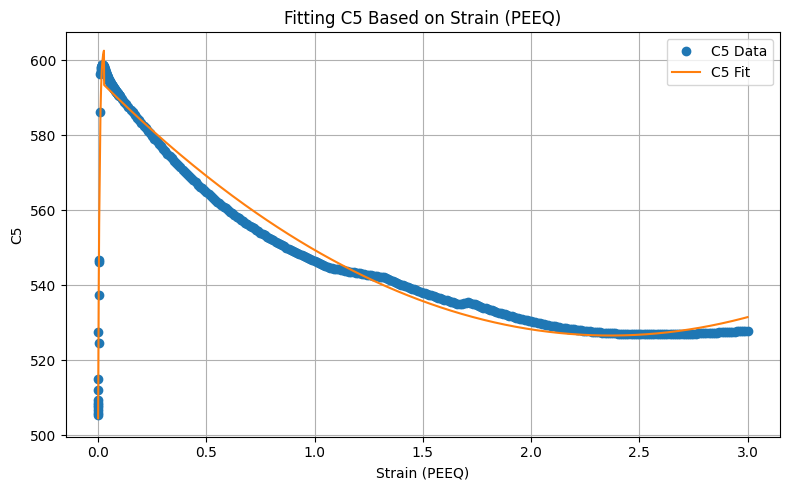

In [47]:
x_column = 'PEEQ'
y_column_c5 = 'C5'  # Change to C5 for fitting
# Specify the PEEQ bounds
peeq_lower_bound = 0
peeq_upper_bound = 3

# Filter data based on the PEEQ bounds
# Filter data based on the PEEQ bounds
filtered_data = data[
    (data[x_column] > peeq_lower_bound) & 
    (data[x_column] <= peeq_upper_bound) #& 
    #(data[x_column] != 0.4)  # Exclude strain = 0.4
]

# Extract strain (PEEQ) and C5 values
strain = filtered_data[x_column].values
C5 = filtered_data[y_column_c5].values
# def c5_function(strain, Q1, Q2, Q3, P0, P1, P2, P3, P4):
#     """
#     Function for fitting C5:
#     C5 = Q1 * exp(-Q2 * strain) + Q3 * strain^2 + P0 + P1 * strain + P2 * sin(P3 * strain + P4)
#     """
#     exponential_term = Q1 * np.exp(-Q2 * strain)
#     polynomial_term = Q3 * strain**2 + P0 + P1 * strain
#     sinusoidal_term = P2 * np.sin(P3 * strain + P4)
#     return exponential_term + polynomial_term + sinusoidal_term

def c5_function(x, a1, b1, c1, a2, b2, c2, switch_point):
    """
    Logistic growth followed by quadratic decay with correct indexing.
    """
    cond = x <= switch_point
    y = np.where(
        cond,
        a1 / (1 + np.exp(-b1 * (x - c1))),  # Logistic growth
        a2 * x**2 + b2 * x + c2  # Quadratic decay
    )
    return y

# Define initial guesses and bounds
# initial_guess = [600.0, 5.0, 10.0, 400.0, 1.0, 10.0, 1.0, 0.0]  # [Q1, Q2, Q3, P0, P1, P2, P3, P4]
# bounds = (
#     [100.0, 0.1, -10.0, 300.0, -1.0, 0.0, 0.1, -np.pi],  # Lower bounds
#     [1000.0, 20.0, 50.0, 500.0, 5.0, 50.0, 5.0, np.pi]    # Upper bounds
# )
initial_guess = [600, 50, 0.01, -1, -1, 600, 0.027]

# Perform the curve fitting
params, _ = curve_fit(
    c5_function, strain, C5, p0=initial_guess, maxfev=100000
)

# Generate fitted C5 values corresponding to the original strain values
C5_fitted = c5_function(strain, *params)

# Add the fitted C5 values to the DataFrame
df_para_fit['CT5'] = C5_fitted

# Plot experimental data and fitted curve
plt.figure(figsize=(8, 5))
plt.plot(strain, C5, 'o', label='C5 Data')  # Original data
plt.plot(strain, C5_fitted, '-', label='C5 Fit')  # Fitted curve
plt.xlabel('Strain (PEEQ)')
plt.ylabel('C5')
plt.title('Fitting C5 Based on Strain (PEEQ)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the fitted parameters for C5
# print("Fitted parameters for C5:")
# print(f"Q1: {params[0]:.5f}, Q2: {params[1]:.5f}, Q3: {params[2]:.5f},")
# print(f"P0: {params[3]:.5f}, P1: {params[4]:.5f}, P2: {params[5]:.5f},")
# print(f"P3: {params[6]:.5f}, P4: {params[7]:.5f}")

# Save the updated DataFrame to a CSV file
df_para_fit.to_csv('fitted_C1_C2_C3_C4_C5_values.csv', index=False)

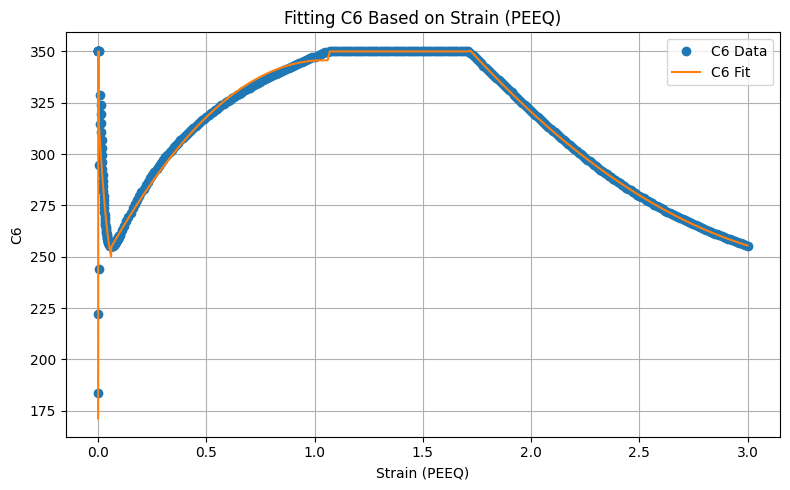

Fitted parameters for C6:
Q1: 114.27112, Q2: 3678.84203, Q3: 350.00000,
P0: 11640.08386, P1: -1896.68632, P2: 321.87998,
P3: -94.78517, P4: 197.25616


In [48]:
x_column = 'PEEQ'
y_column_c6 = 'C6'  # Change to C5 for fitting
# Specify the PEEQ bounds
peeq_lower_bound = 0
peeq_upper_bound = 3

# Filter data based on the PEEQ bounds
# Filter data based on the PEEQ bounds
filtered_data = data[
    (data[x_column] > peeq_lower_bound) & 
    (data[x_column] <= peeq_upper_bound) #& 
    #(data[x_column] != 0.4)  # Exclude strain = 0.4
]

# Extract strain (PEEQ) and C5 values
strain = filtered_data[x_column].values
C6 = filtered_data[y_column_c6].values
# def c6_function(strain, Q1, Q2, Q3, P0, P1, P2, P3, P4):
#     """
#     Function for fitting C5:
#     C6 = Q1 * exp(-Q2 * strain) + Q3 * strain^2 + P0 + P1 * strain + P2 * sin(P3 * strain + P4)
#     """
#     exponential_term = Q1 * np.exp(-Q2 * strain)
#     polynomial_term = Q3 * strain**2 + P0 + P1 * strain
#     sinusoidal_term = P2 * np.sin(P3 * strain + P4)
#     return exponential_term + polynomial_term + sinusoidal_term

def c6_function(x, rise_a, rise_b, plateau1, drop_a, drop_b, drop_c,
                                      quad_rise_a, quad_rise_b, quad_rise_c, plateau2,
                                      fall_a, fall_b, fall_c, smooth_width):
    y = np.zeros_like(x)
    # Region 1: Exponential rise
    mask1 = x <= 0.0003
    y[mask1] = rise_a * np.exp(rise_b * x[mask1])

    # Region 2: Plateau 1
    mask2 = (x > 0.0003) & (x <= 0.003)
    y[mask2] = plateau1

    # Region 3: Drop
    mask3 = (x > 0.003) & (x <= 0.06)
    y[mask3] = drop_a * x[mask3]**2 + drop_b * x[mask3] + drop_c

    # Region 4: Quadratic rise
    mask4 = (x > 0.06) & (x <= 1.06)
    y[mask4] = quad_rise_a * x[mask4]**2 + quad_rise_b * x[mask4] + quad_rise_c

    # Smoother transition from Quadratic Rise to Plateau 2
    mask5 = (x > 1.06) & (x <= 1.71)
    blend = 1 / (1 + np.exp(-smooth_width * (x[mask5] - 1.06)))  # Smooth transition blending
    y[mask5] = (1 - blend) * (quad_rise_a * x[mask5]**2 + quad_rise_b * x[mask5] + quad_rise_c) + blend * plateau2

    # Region 6: Quadratic fall
    mask6 = x > 1.71
    y[mask6] = fall_a * x[mask6]**2 + fall_b * x[mask6] + fall_c

    return y
# Define initial guesses and bounds
# initial_guess = [600.0, 5.0, 10.0, 400.0, 1.0, 10.0, 1.0, 0.0]  # [Q1, Q2, Q3, P0, P1, P2, P3, P4]
# bounds = (
#     [100.0, 0.1, -10.0, 300.0, -1.0, 0.0, 0.1, -np.pi],  # Lower bounds
#     [1000.0, 20.0, 50.0, 500.0, 5.0, 50.0, 5.0, np.pi]    # Upper bounds
# )

initial_guess = [
    114.27,  # a_rise
    3678.84,  # b_rise
    350.00,  # plateau1
    11640.08,  # a_drop
    -1896.69,  # b_drop
    321.88,  # c_drop
    -94.79,  # a_quad_rise
    197.26,  # b_quad_rise
    243.06,  # c_quad_rise
    350.00,  # plateau2
    32.21,  # a_fall
    -226.19,  # b_fall
    644.09,  # c_fall
    200.00  # smoothing_width
]

# Perform the curve fitting
params, _ = curve_fit(
    c6_function, strain, C6, p0=initial_guess, maxfev=100000
)

# Generate fitted C5 values corresponding to the original strain values
C6_fitted = c6_function(strain, *params)

# Add the fitted C5 values to the DataFrame
df_para_fit['CT6'] = C6_fitted

# Plot experimental data and fitted curve
plt.figure(figsize=(8, 5))
plt.plot(strain, C6, 'o', label='C6 Data')  # Original data
plt.plot(strain, C6_fitted, '-', label='C6 Fit')  # Fitted curve
plt.xlabel('Strain (PEEQ)')
plt.ylabel('C6')
plt.title('Fitting C6 Based on Strain (PEEQ)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the fitted parameters for C5
print("Fitted parameters for C6:")
print(f"Q1: {params[0]:.5f}, Q2: {params[1]:.5f}, Q3: {params[2]:.5f},")
print(f"P0: {params[3]:.5f}, P1: {params[4]:.5f}, P2: {params[5]:.5f},")
print(f"P3: {params[6]:.5f}, P4: {params[7]:.5f}")

# Save the updated DataFrame to a CSV file
df_para_fit.to_csv('fitted_C1_C2_C3_C4_C5_C6_values.csv', index=False)

## Validate

[2.82914622 1.50746458 1.         1.51249493 1.72236651 1.70664659
 1.19383934]


C:\Users\meian\AppData\Local\Temp\ipykernel_22352\2148083455.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))


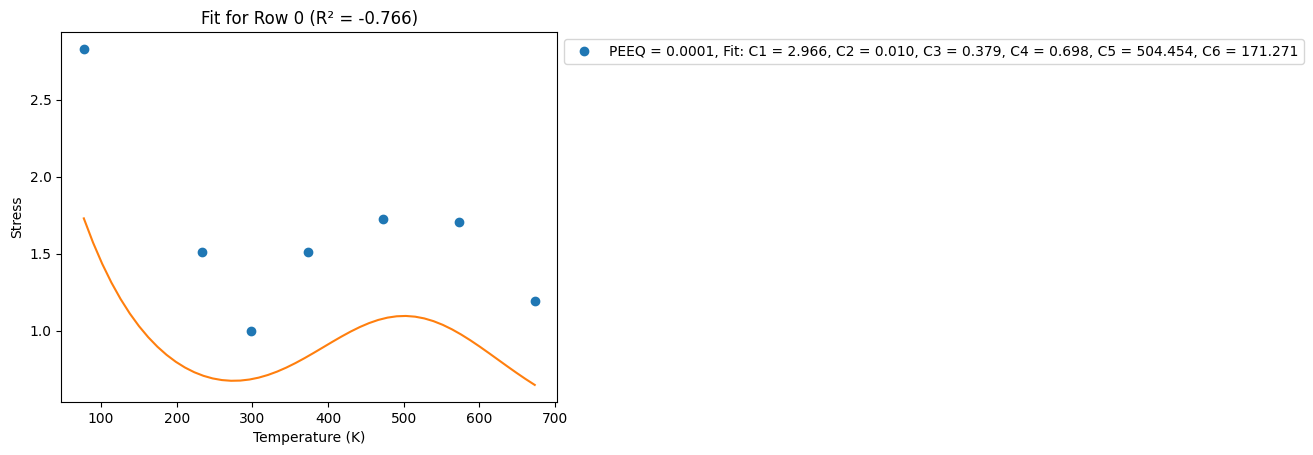

[2.33219773 1.26455856 1.         1.32765637 1.4637548  1.43116091
 1.16800752]


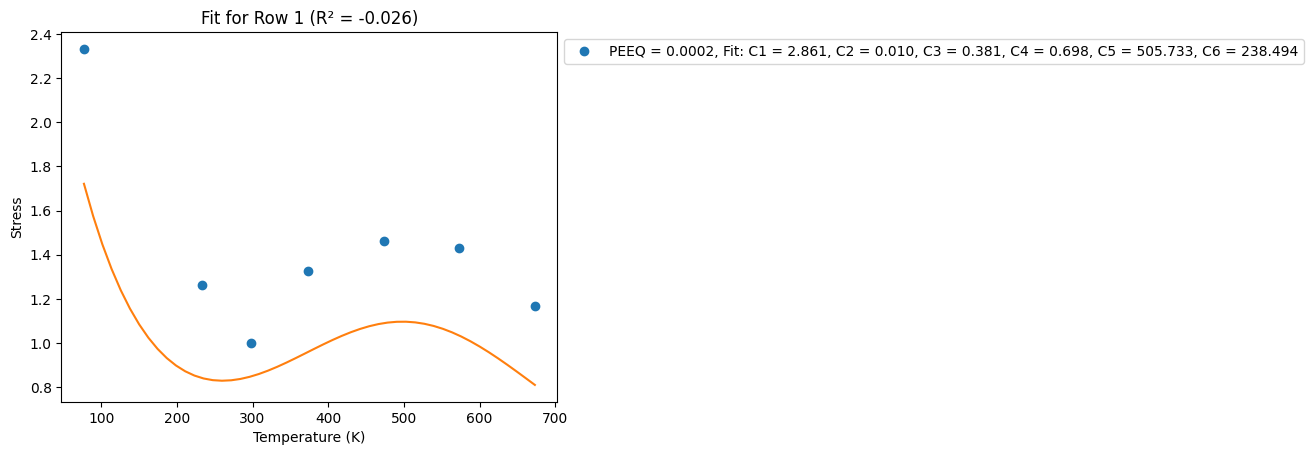

[1.88977535 1.04028073 1.         1.10573315 1.20809166 1.17370133
 0.99026645]


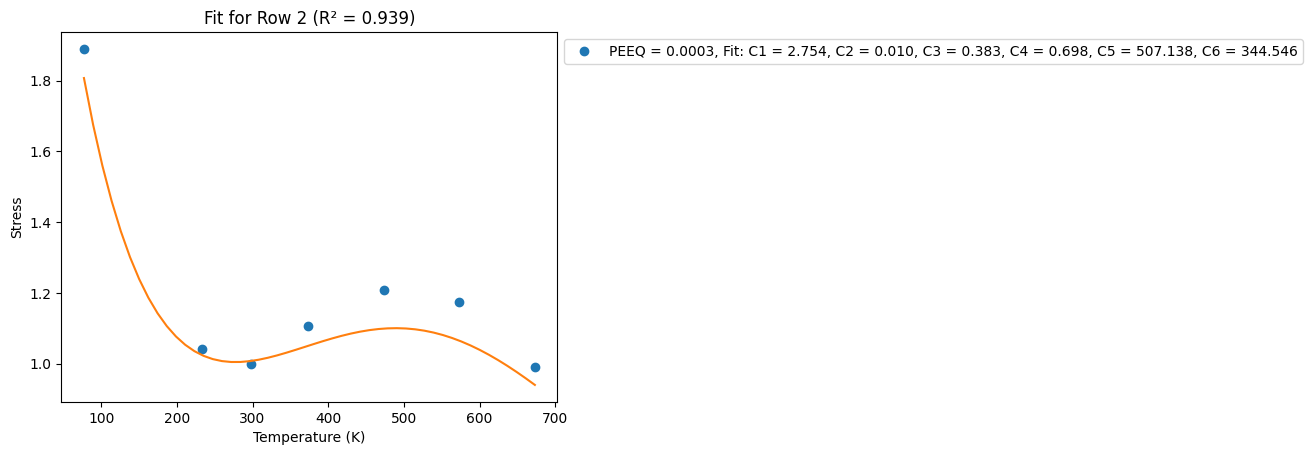

[1.75580815 0.98239076 1.         1.0486669  1.13967641 1.10277459
 0.94778786]


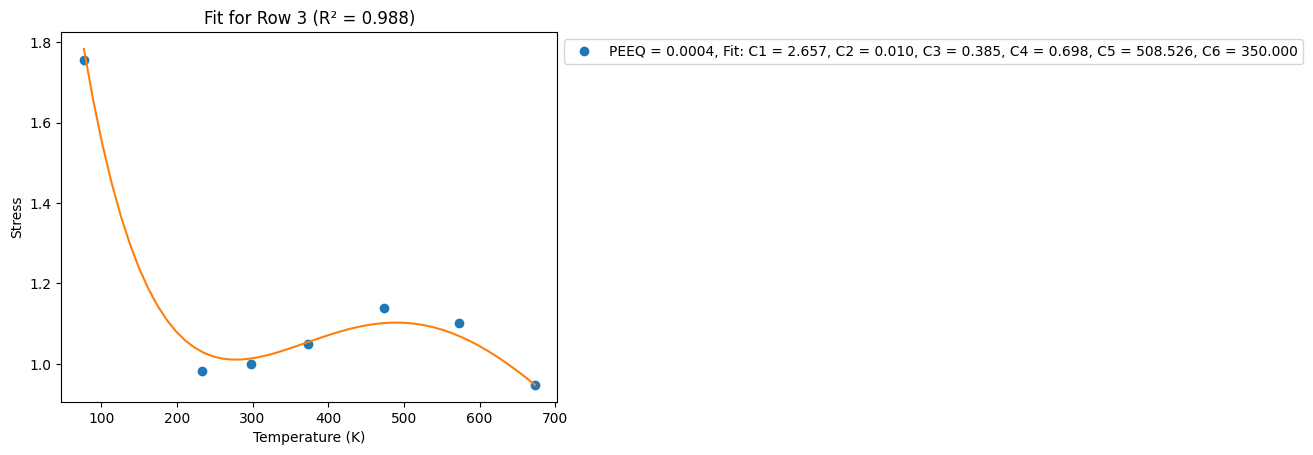

[1.70260576 0.96735308 1.         1.03210659 1.11772935 1.07936231
 0.93761111]


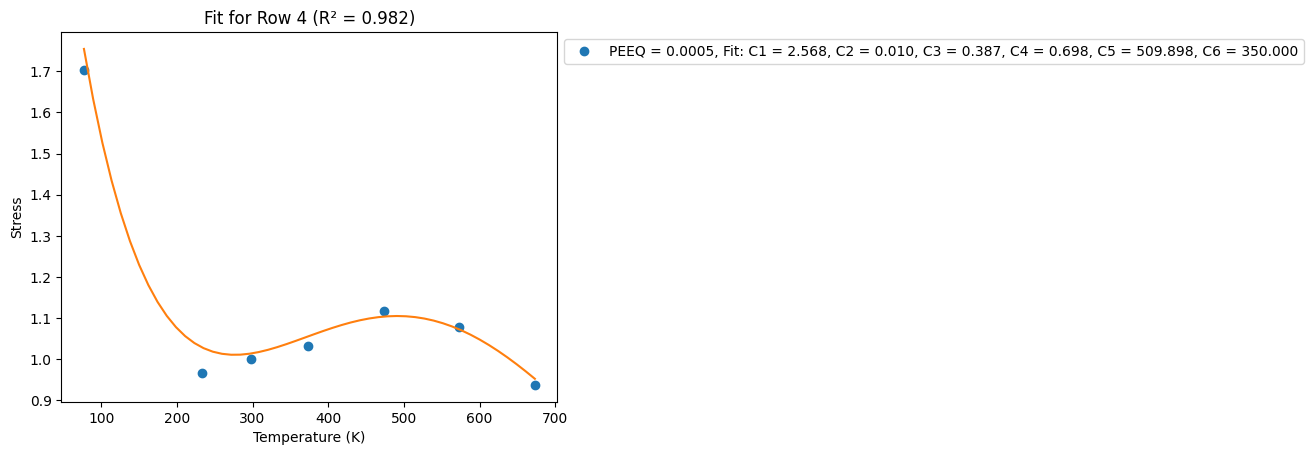

[1.67202446 0.9636772  1.         1.02517726 1.1071245  1.06828681
 0.93438411]


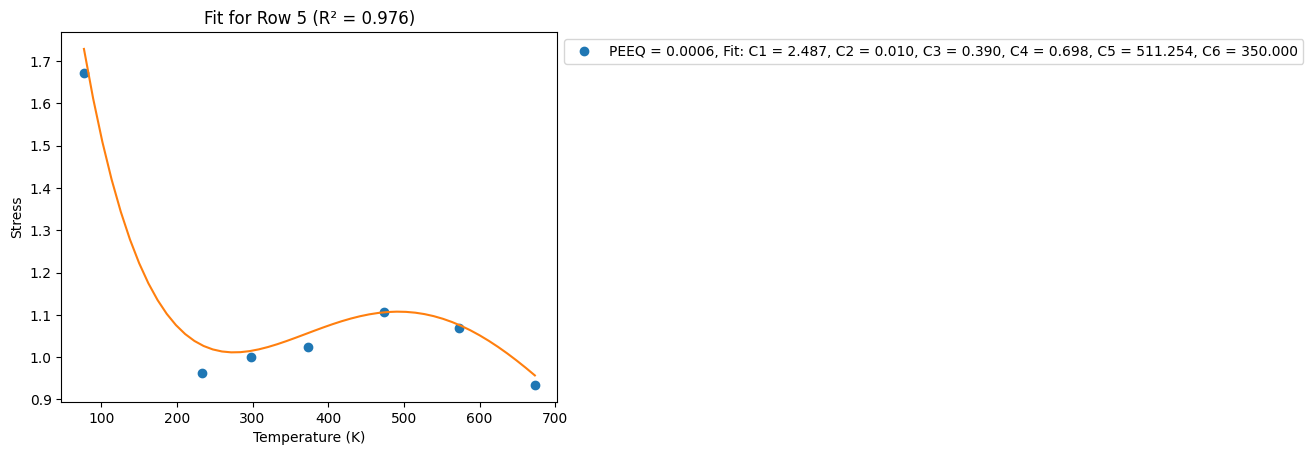

[1.64977962 0.96358756 1.         1.0207674  1.09970582 1.06107194
 0.93250779]


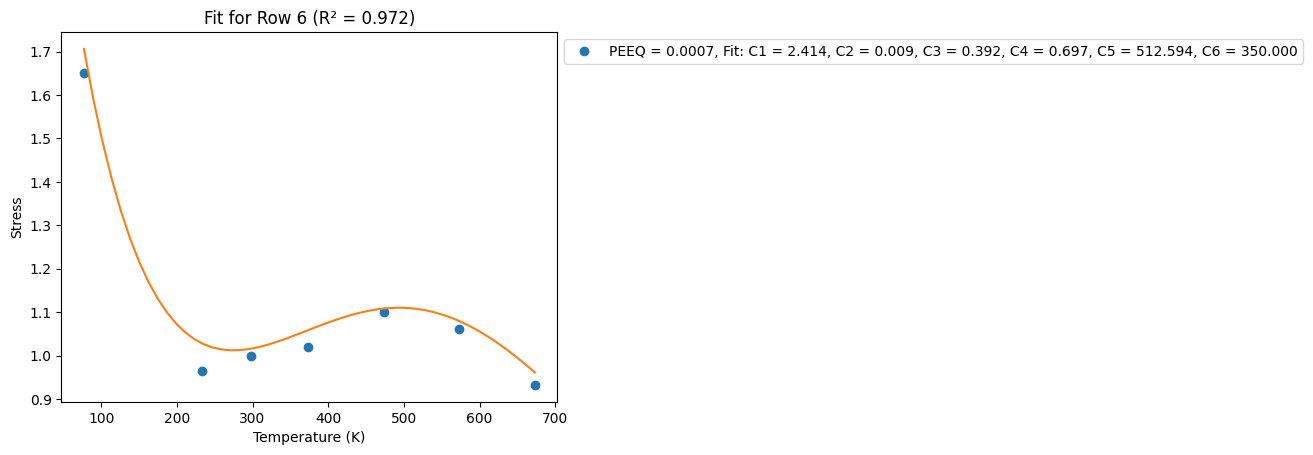

[1.63171927 0.96486607 1.         1.01714432 1.09345224 1.05541175
 0.93078589]


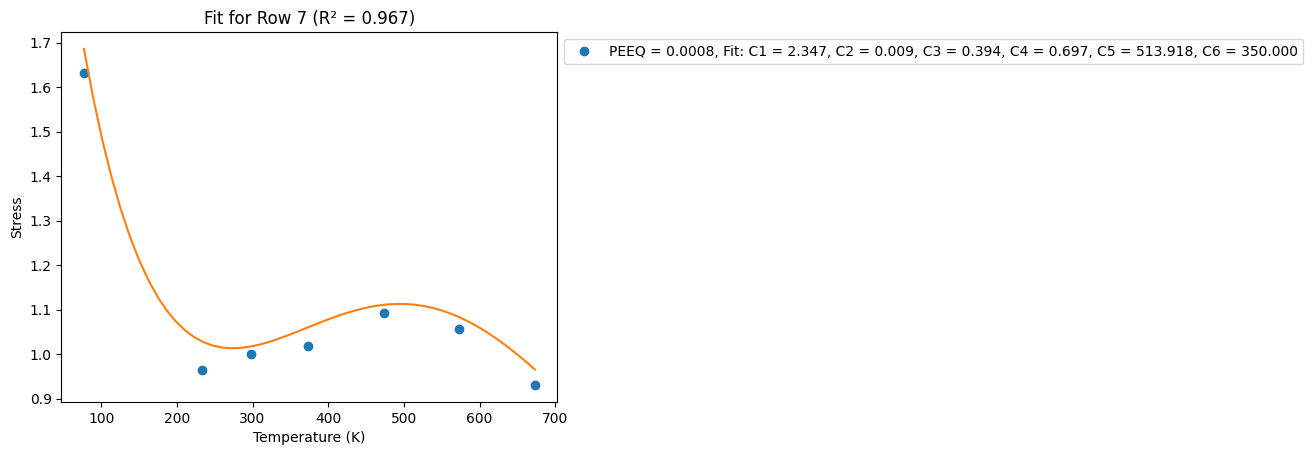

[1.61637091 0.96677924 1.         1.01389072 1.08785796 1.05060108
 0.9290367 ]


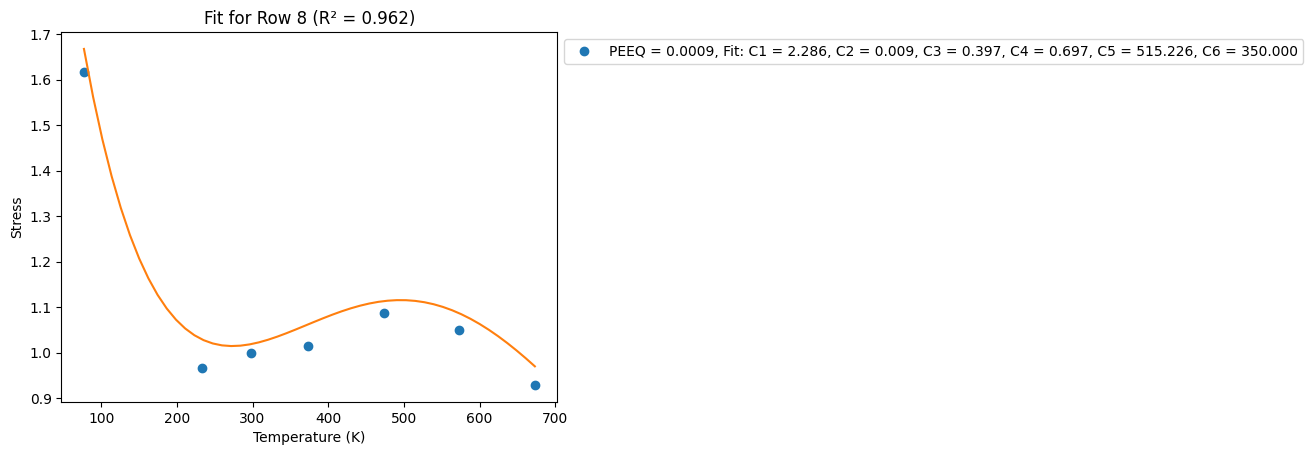

[1.60305198 0.96902917 1.         1.01090674 1.08278742 1.04637831
 0.92728377]


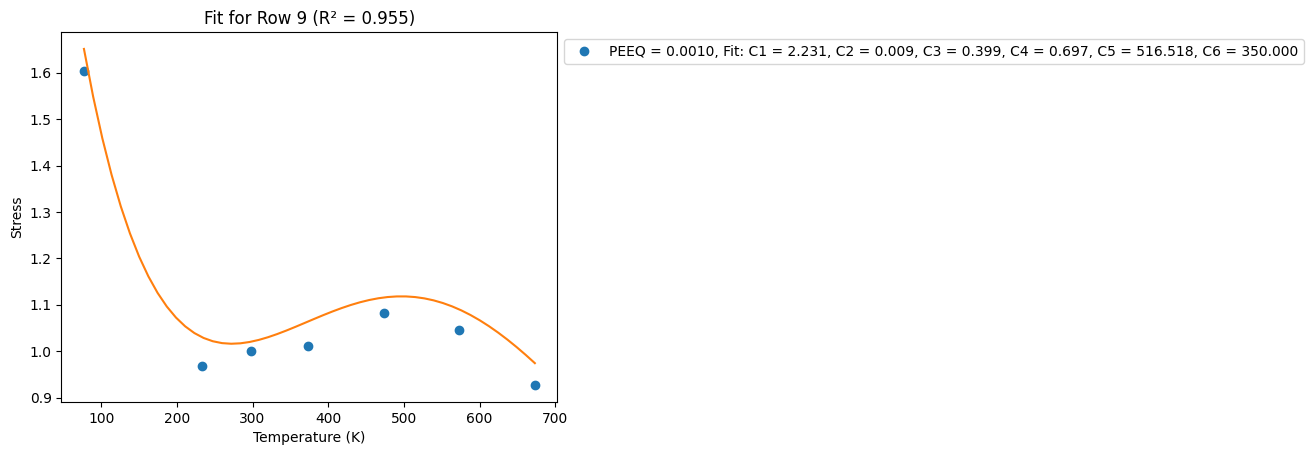

[1.59135519 0.97146423 1.         1.00816312 1.07818814 1.04261654
 0.92557132]


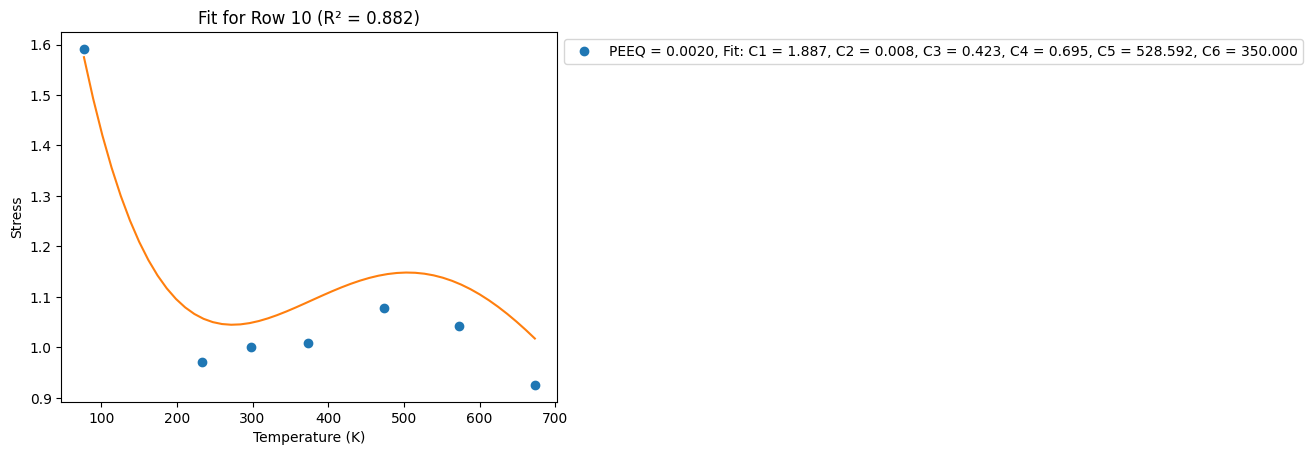

[1.52308237 0.99512694 1.         0.99046308 1.05028236 1.0195775
 0.91318337]


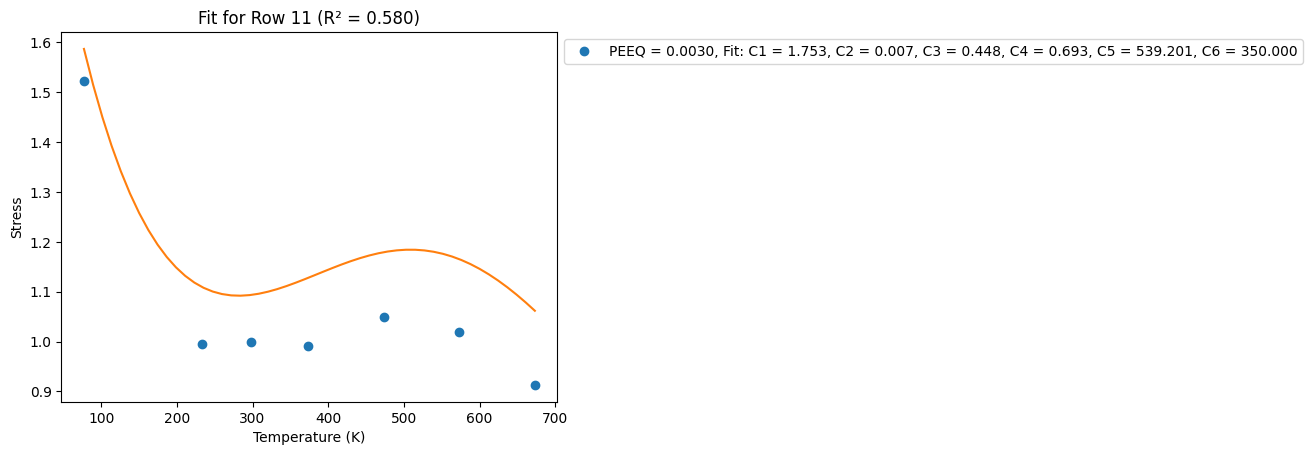

[1.49252082 1.01072475 1.         0.98251803 1.038574   1.00948488
 0.9071737 ]


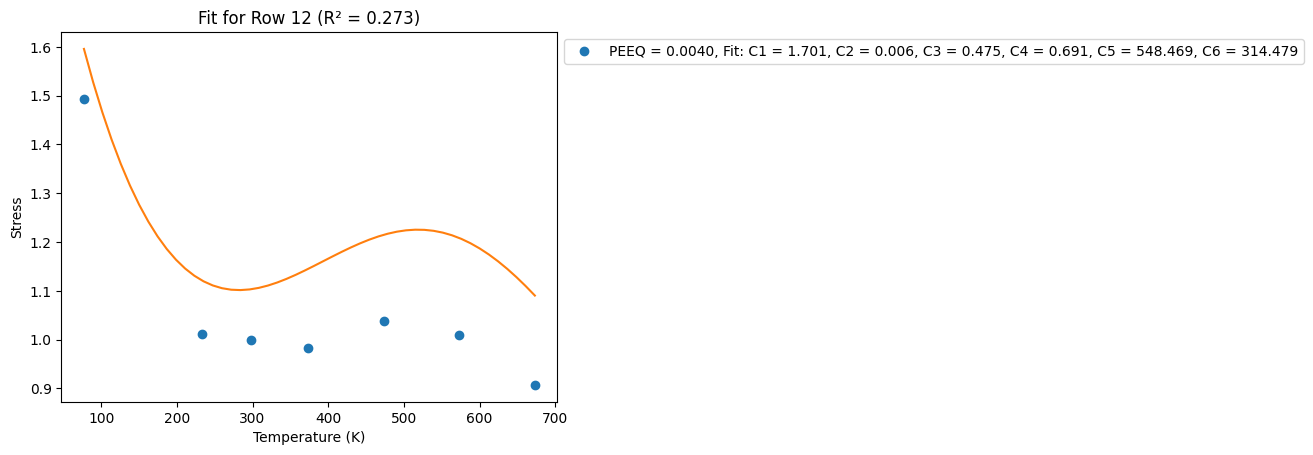

[1.47505738 1.01982738 1.         0.97872502 1.03268962 1.00499261
 0.90413453]


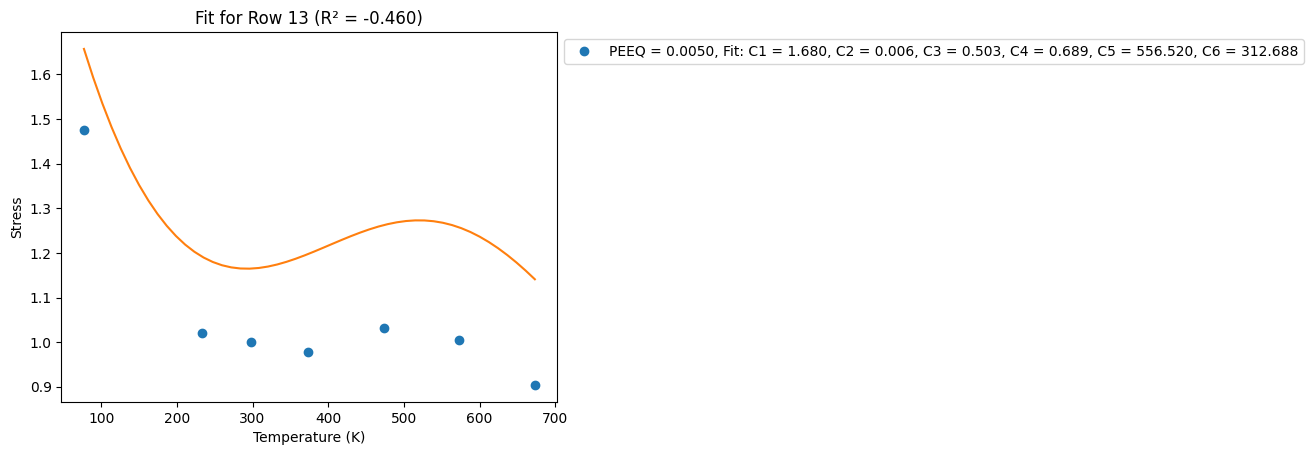

[1.46346827 1.02506208 1.         0.97694684 1.02940085 1.00337592
 0.90251418]


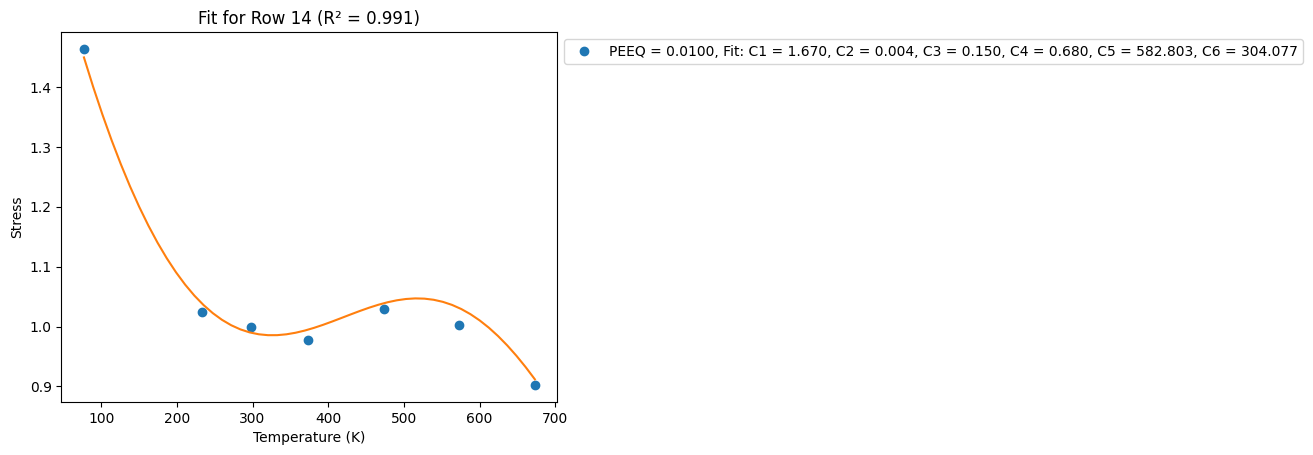

[1.43427297 1.03294434 1.         0.97719854 1.02511894 1.00856621
 0.90042063]


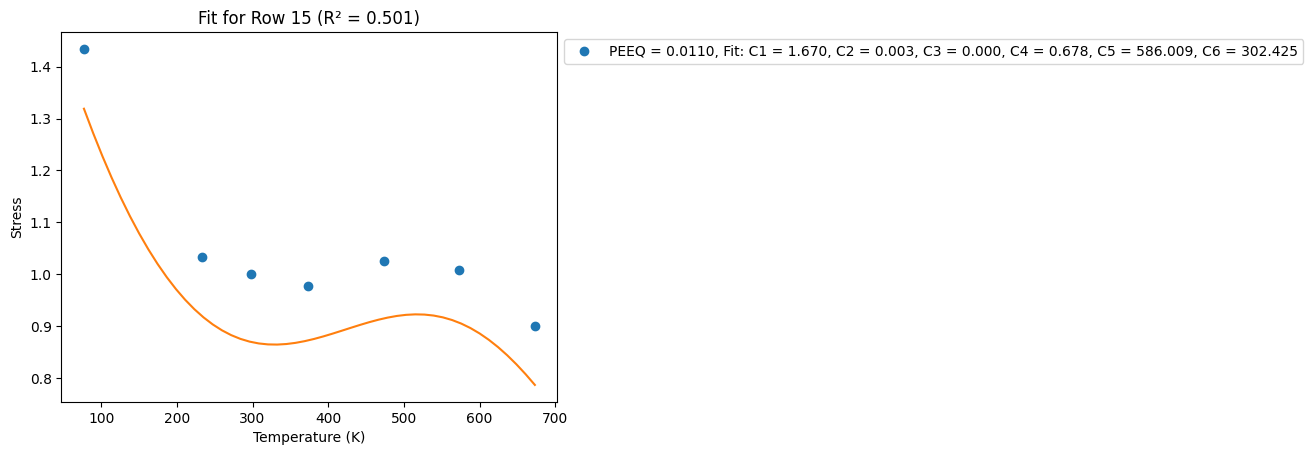

[1.42530476 1.0352961  1.         0.97879891 1.02538704 1.01348978
 0.90010584]


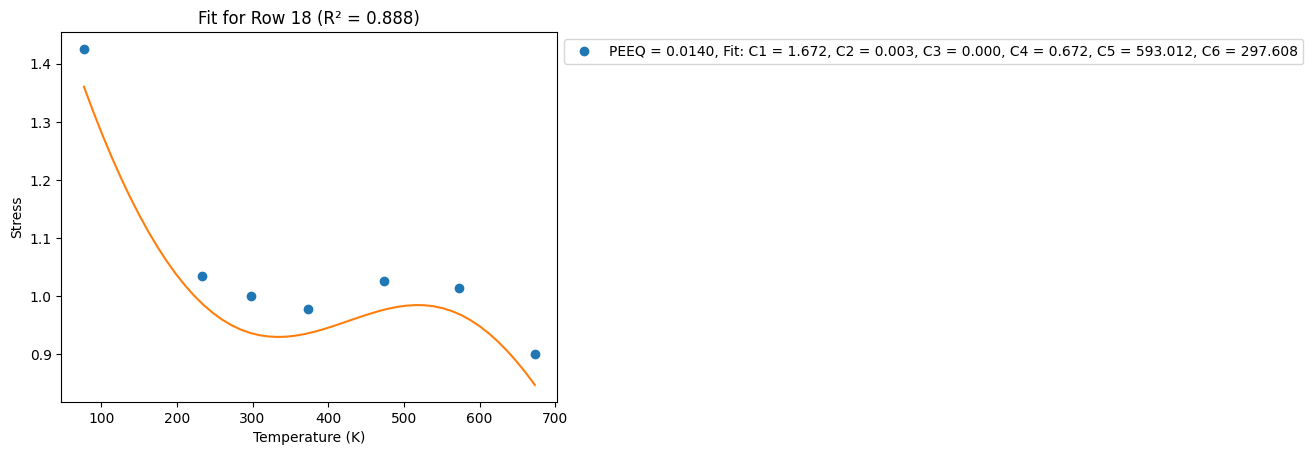

[1.41936943 1.03786566 1.         0.98024345 1.02617812 1.01802528
 0.89985042]


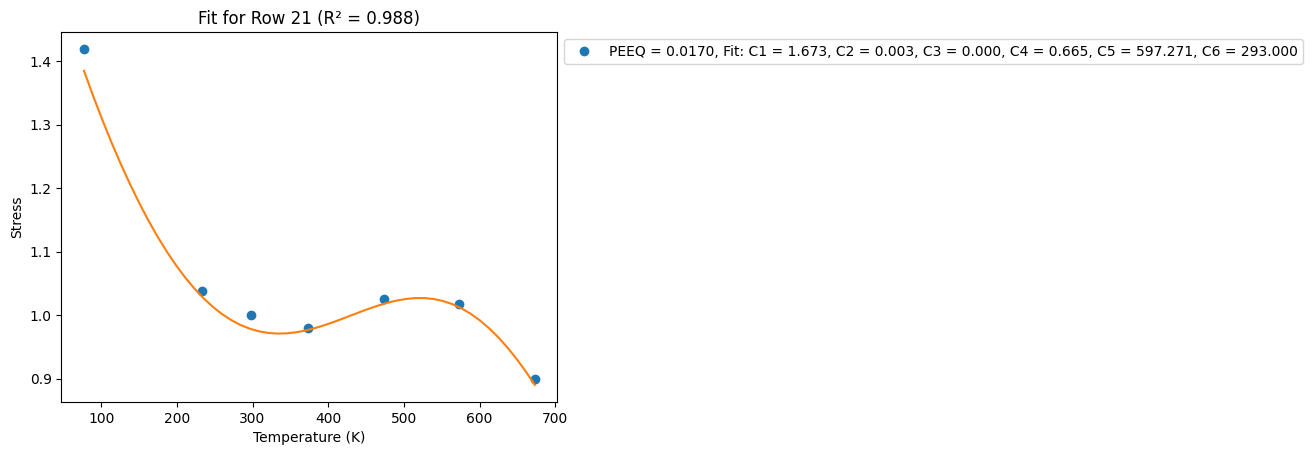

[1.41550102 1.0404695  1.         0.98141897 1.02717065 1.02208096
 0.89963878]


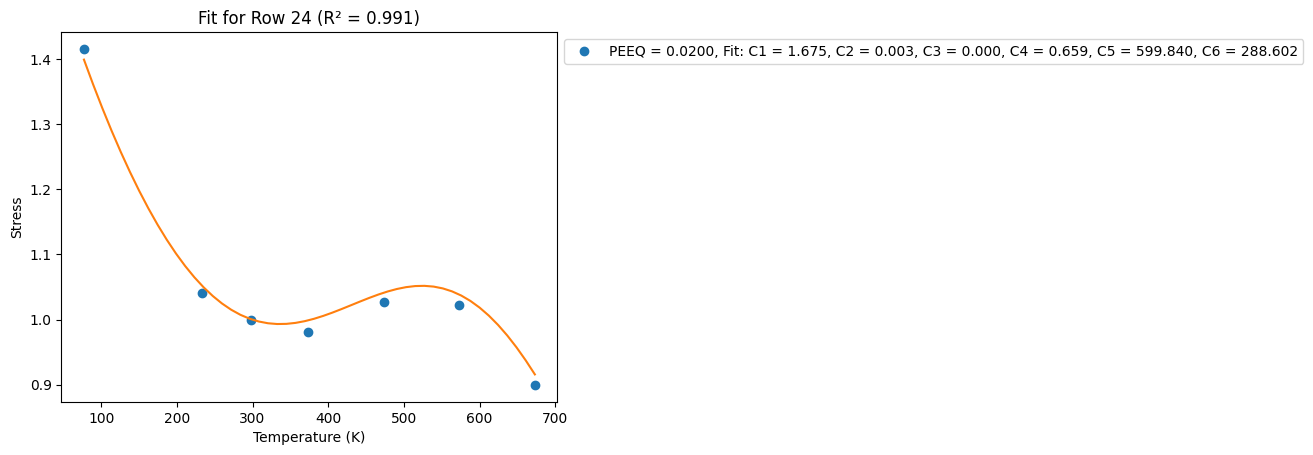

[1.41309288 1.04286913 1.         0.98235283 1.02823355 1.02571458
 0.8994909 ]


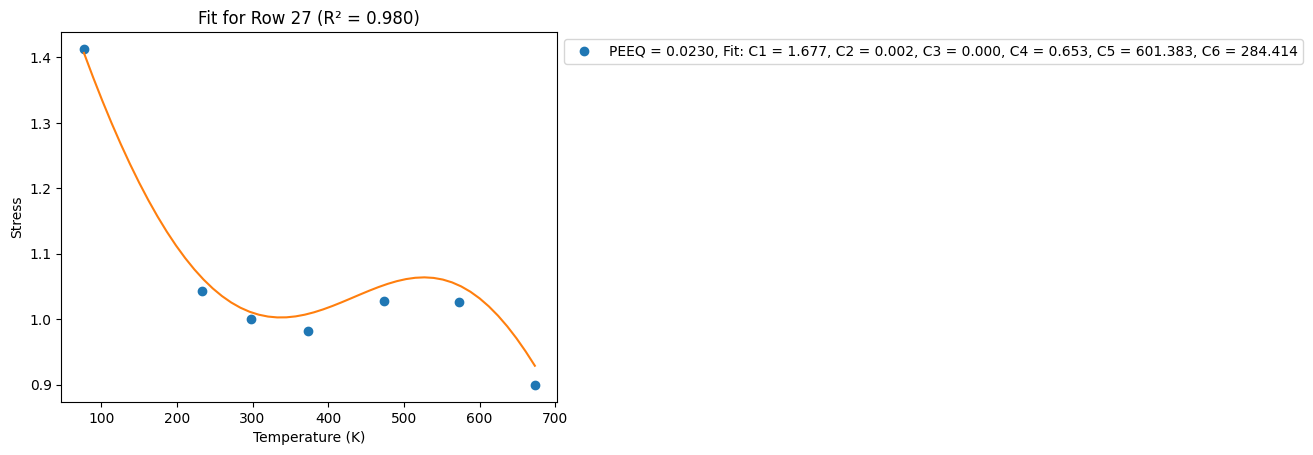

[1.41173245 1.04492866 1.         0.98310133 1.029308   1.02899767
 0.89941865]


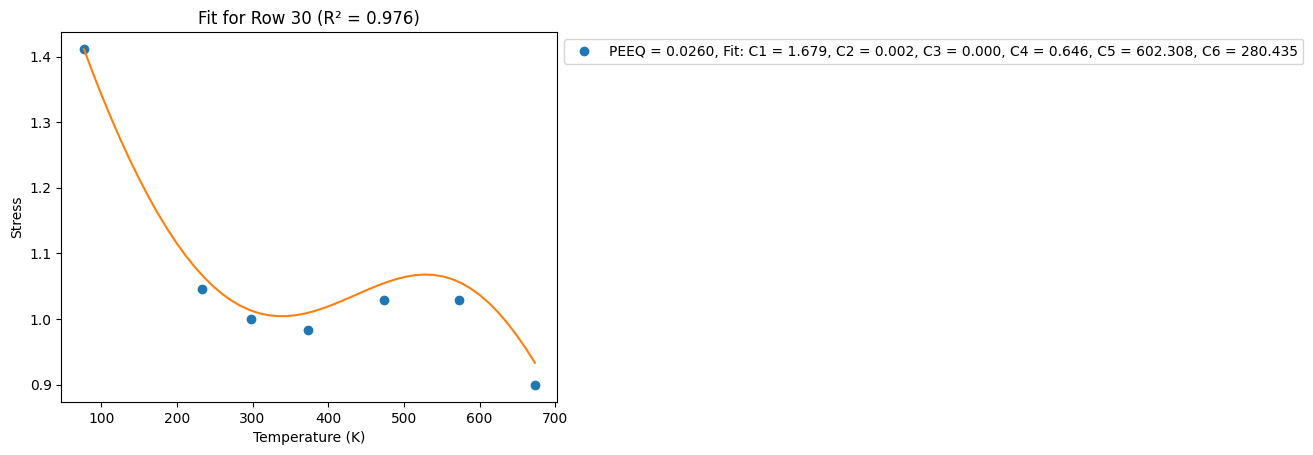

[1.41113321 1.04660278 1.         0.98371765 1.0303664  1.0319904
 0.89942288]


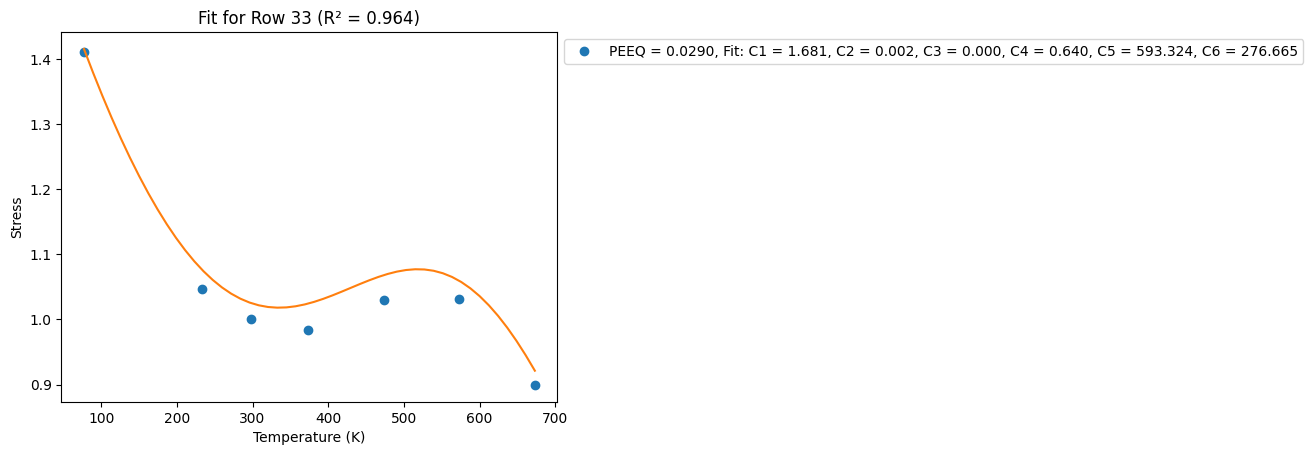

[1.41109416 1.04790127 1.         0.9842441  1.03139578 1.03474009
 0.89949758]


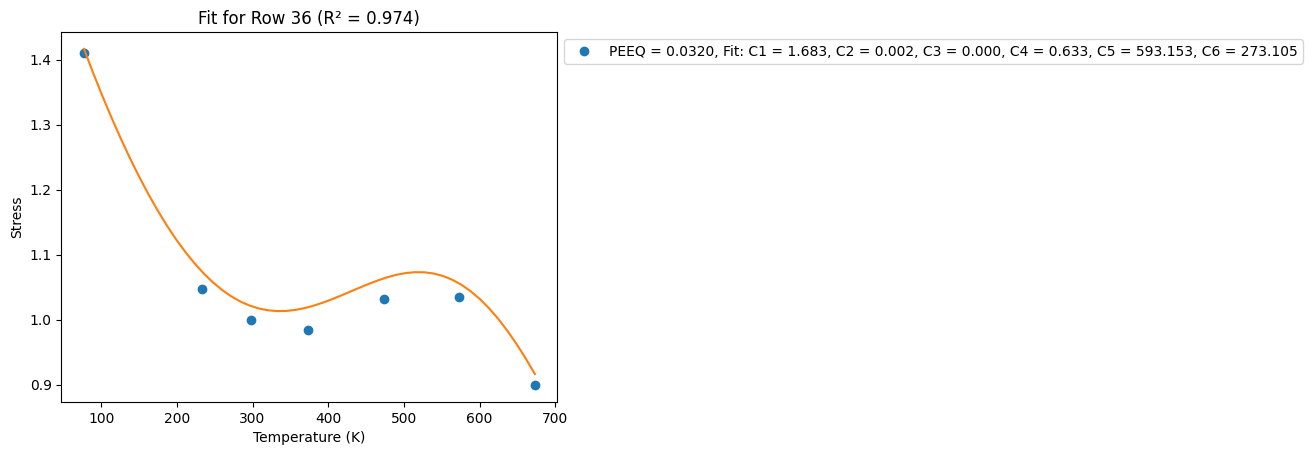

[1.41147283 1.04886113 1.         0.98471186 1.03239045 1.03728371
 0.89963361]


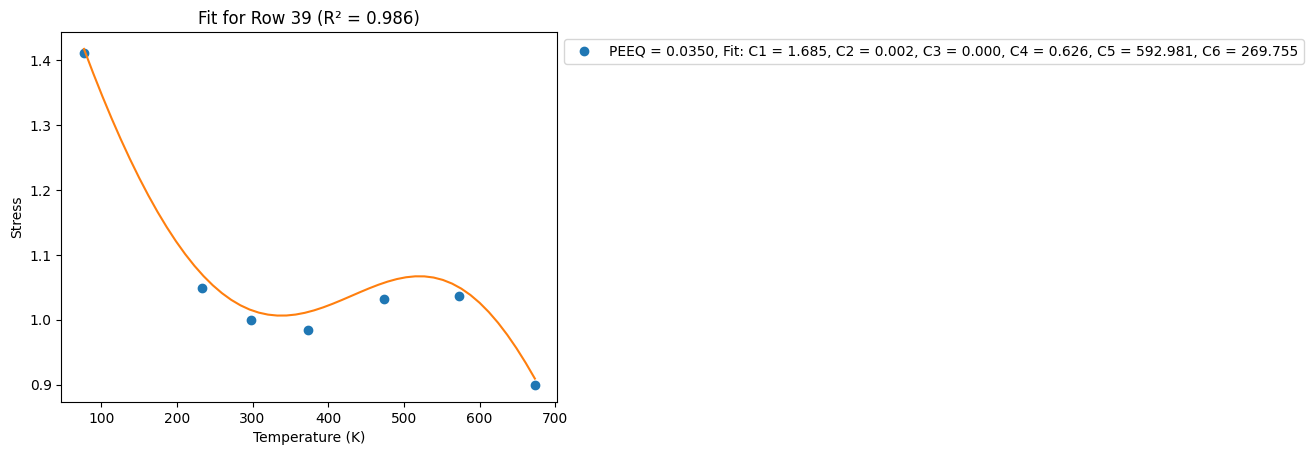

[1.41216688 1.04952922 1.         0.98514292 1.03334848 1.03965047
 0.89982108]


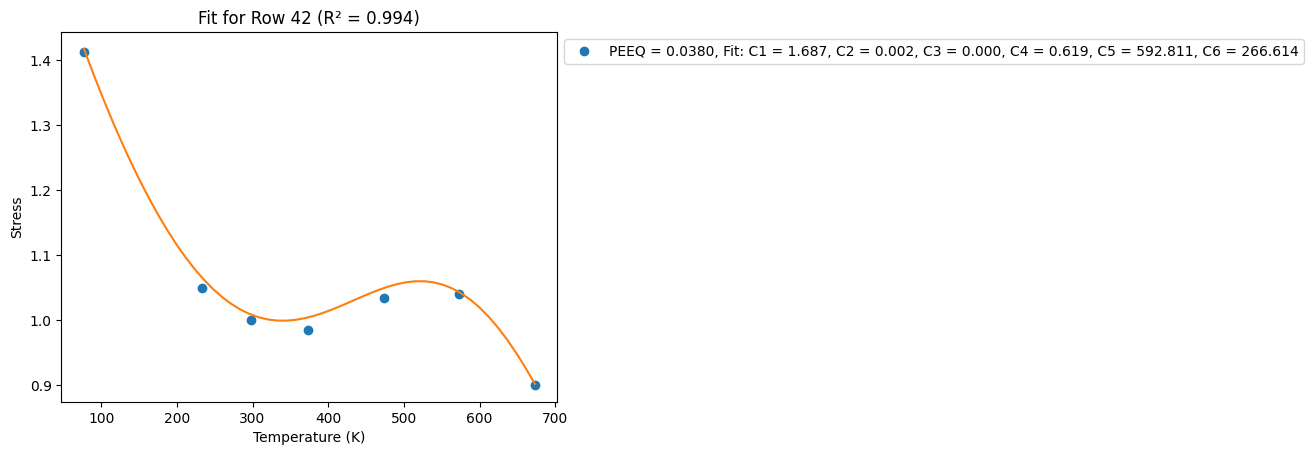

[1.41310172 1.04995285 1.         0.98555223 1.03426989 1.04186381
 0.90005065]


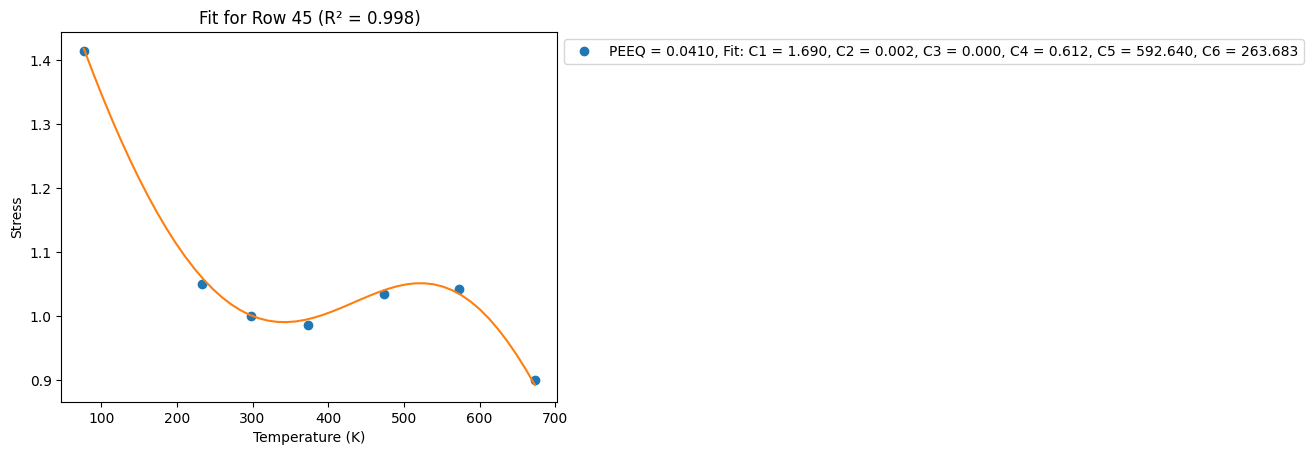

[1.41422216 1.05017528 1.         0.98594965 1.03515575 1.04394277
 0.90031403]


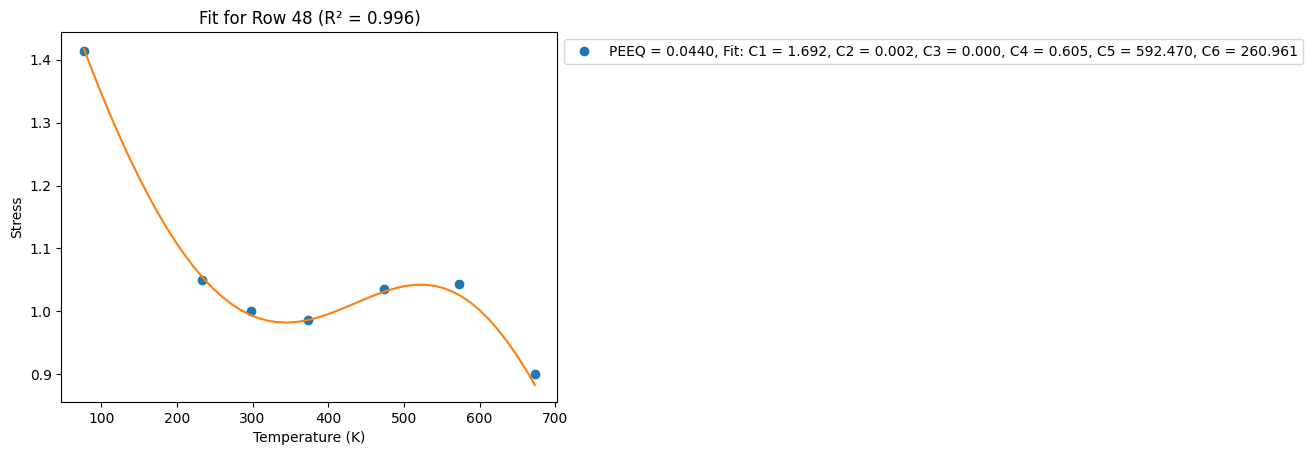

[1.41548674 1.05023402 1.         0.98634143 1.0360076  1.04590303
 0.90060421]


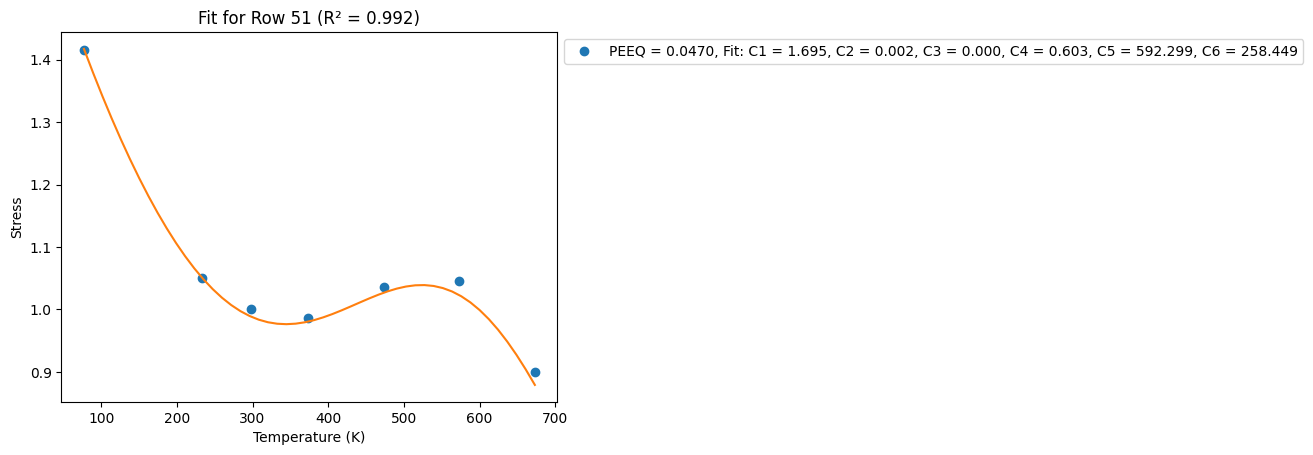

[1.41686389 1.05016061 1.         0.98673138 1.03682721 1.04775767
 0.90091534]


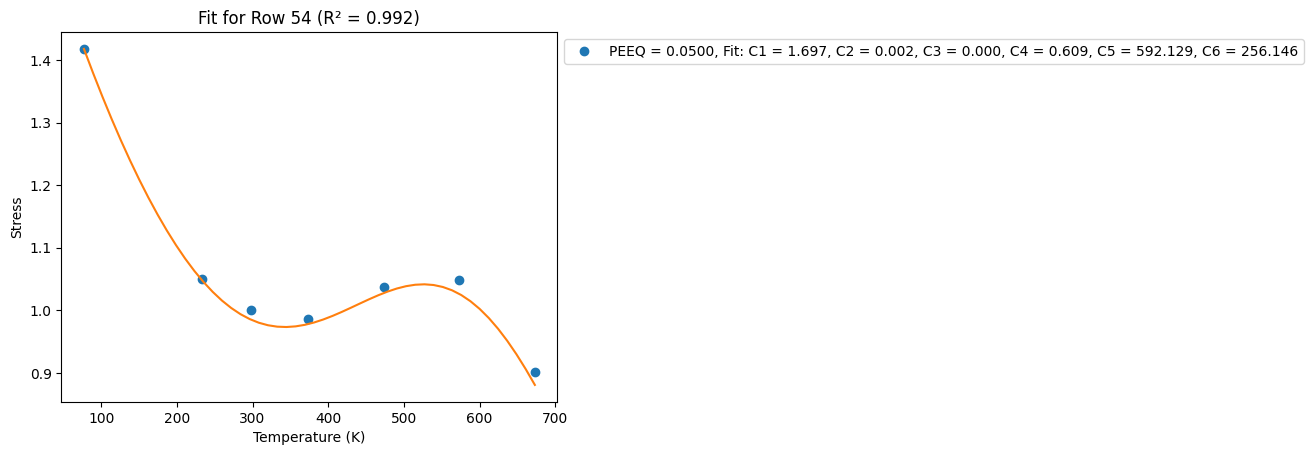

[1.41832923 1.04998109 1.         0.98712159 1.03761643 1.04951772
 0.90124264]


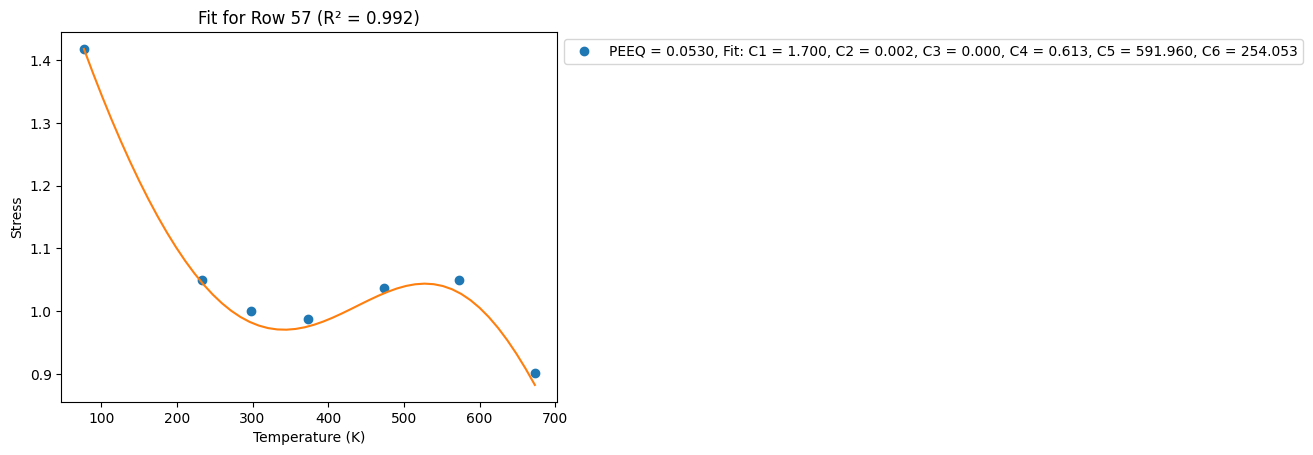

[1.41986373 1.04971672 1.         0.98751308 1.03837706 1.05119253
 0.90158224]


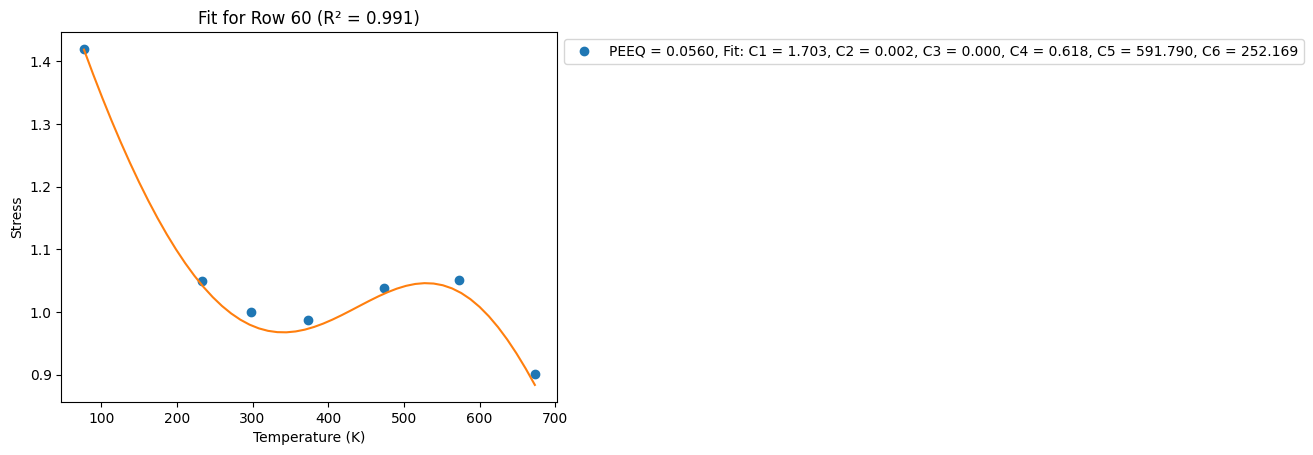

[1.42145236 1.04938474 1.         0.98790619 1.03911084 1.05279013
 0.90193101]


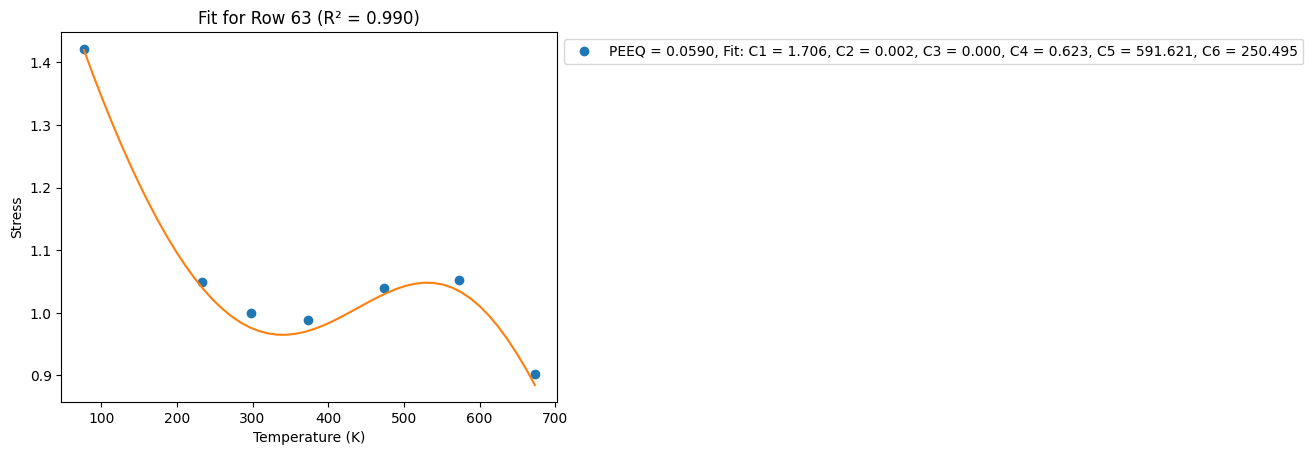

[1.42308318 1.04899911 1.         0.98830079 1.03981941 1.05431748
 0.90228642]


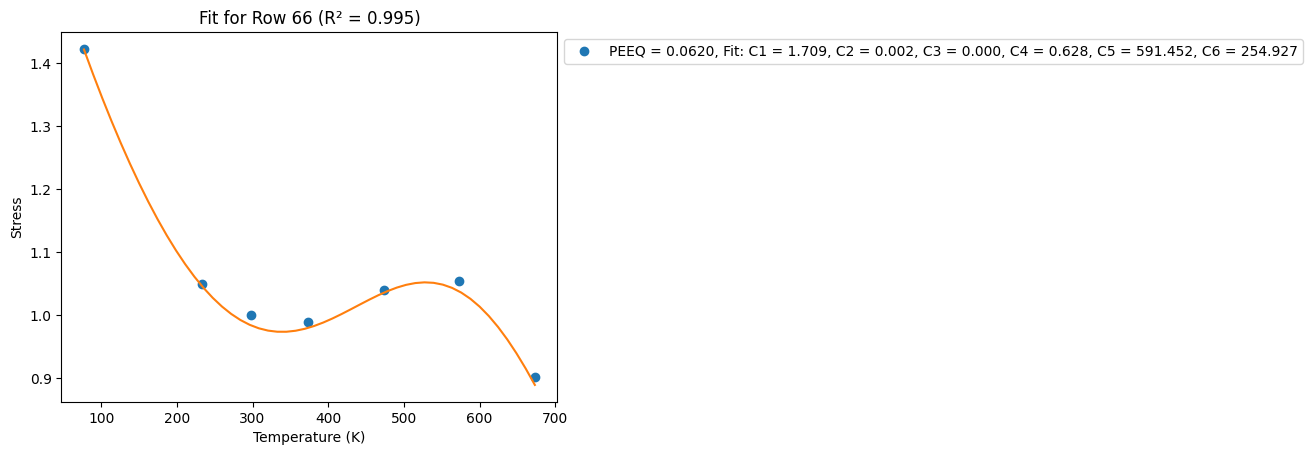

[1.42474656 1.04857109 1.         0.98869654 1.0405043  1.05578059
 0.90264645]


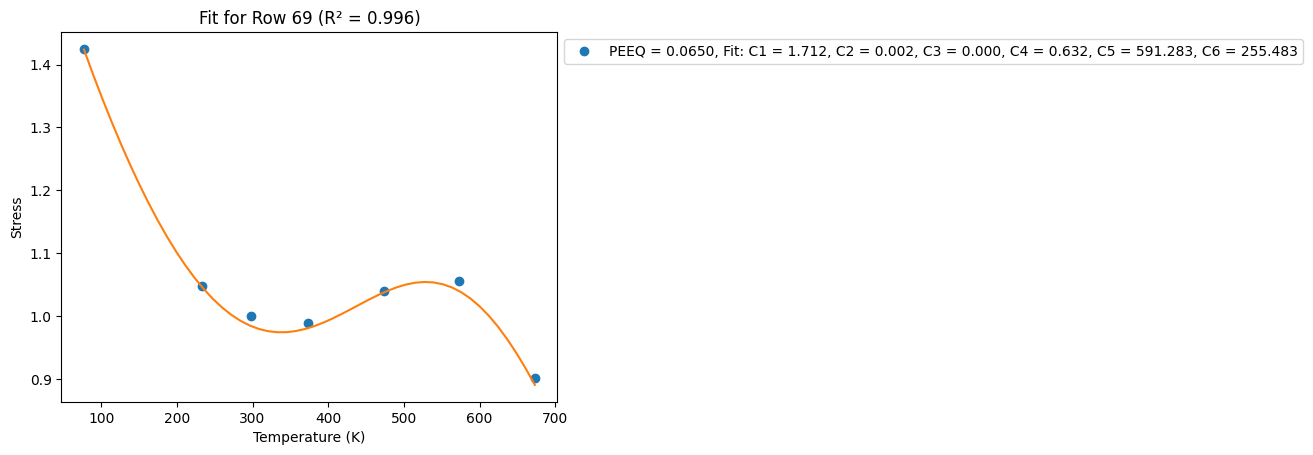

[1.42643475 1.04810981 1.         0.98909295 1.04116693 1.05718476
 0.90300946]


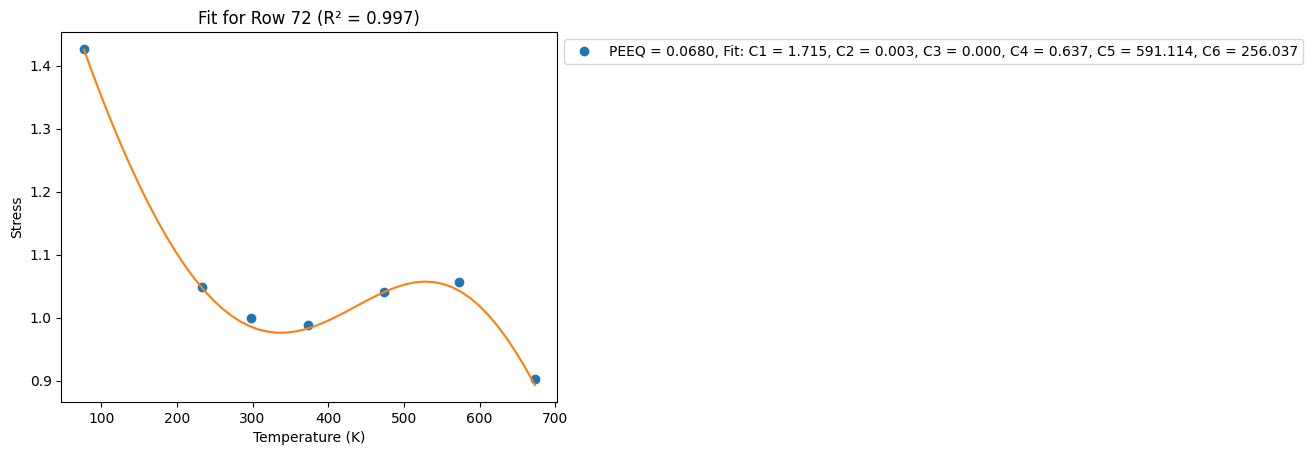

[1.42814142 1.04762264 1.         0.9894895  1.04180863 1.05853463
 0.90337414]


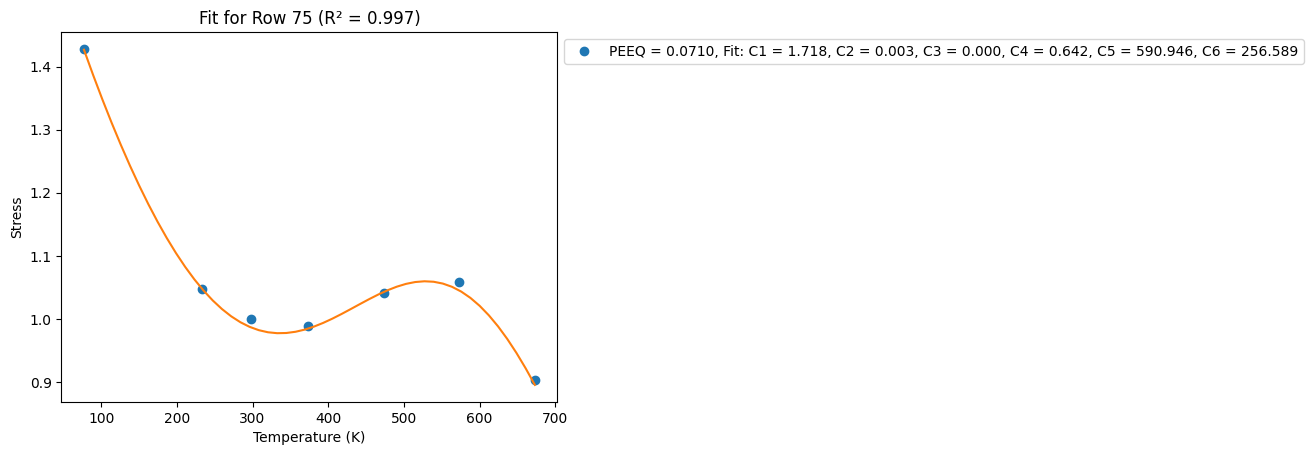

[1.42986139 1.04711559 1.         0.98988565 1.04243062 1.05983434
 0.90373942]


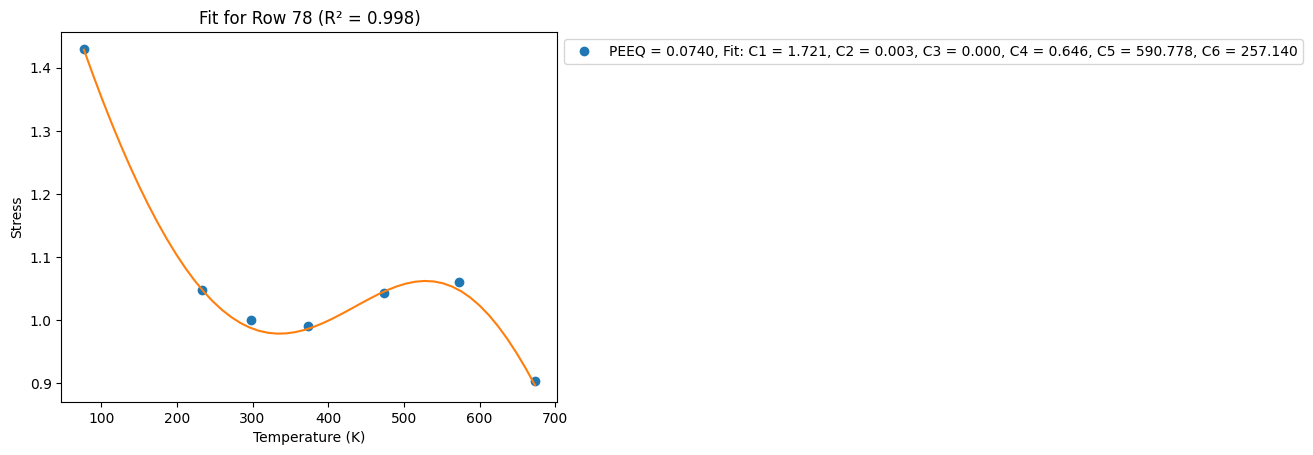

[1.43159042 1.04659353 1.         0.99028092 1.04303403 1.06108753
 0.90410446]


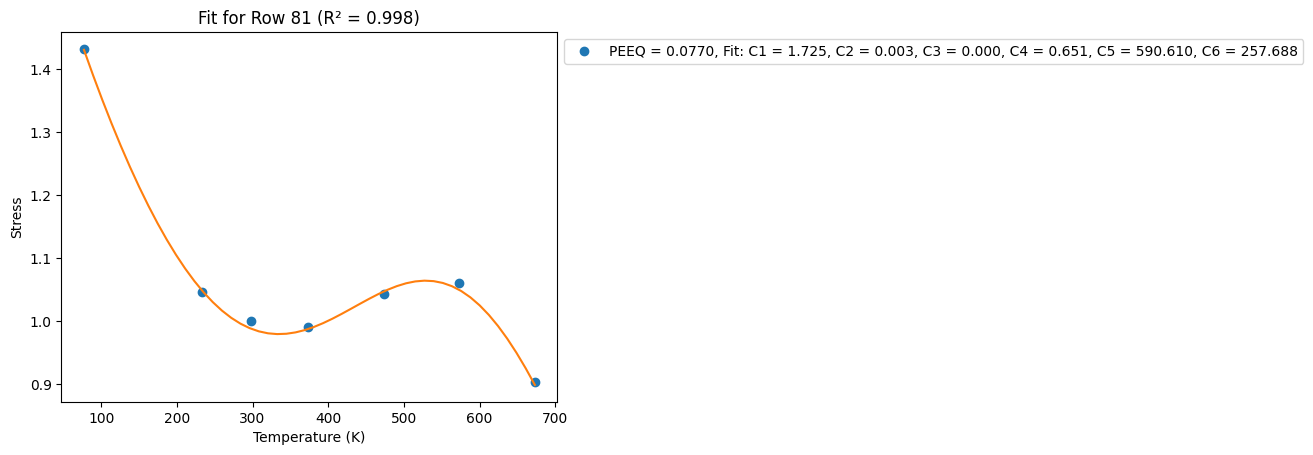

[1.43332498 1.04606043 1.         0.99067483 1.0436199  1.06229749
 0.90446857]


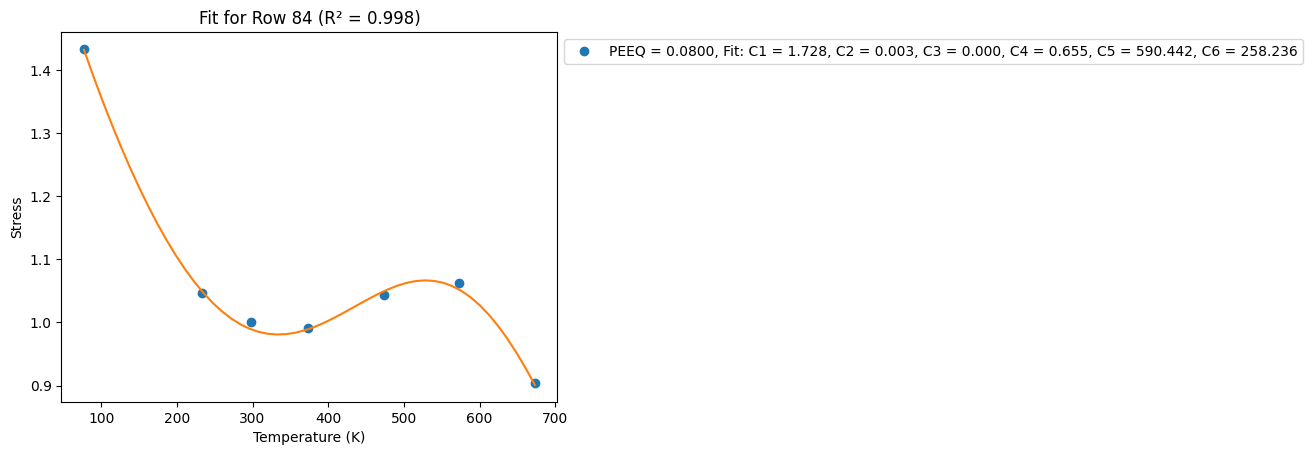

[1.43506218 1.04551953 1.         0.99106699 1.0441892  1.06346715
 0.90483119]


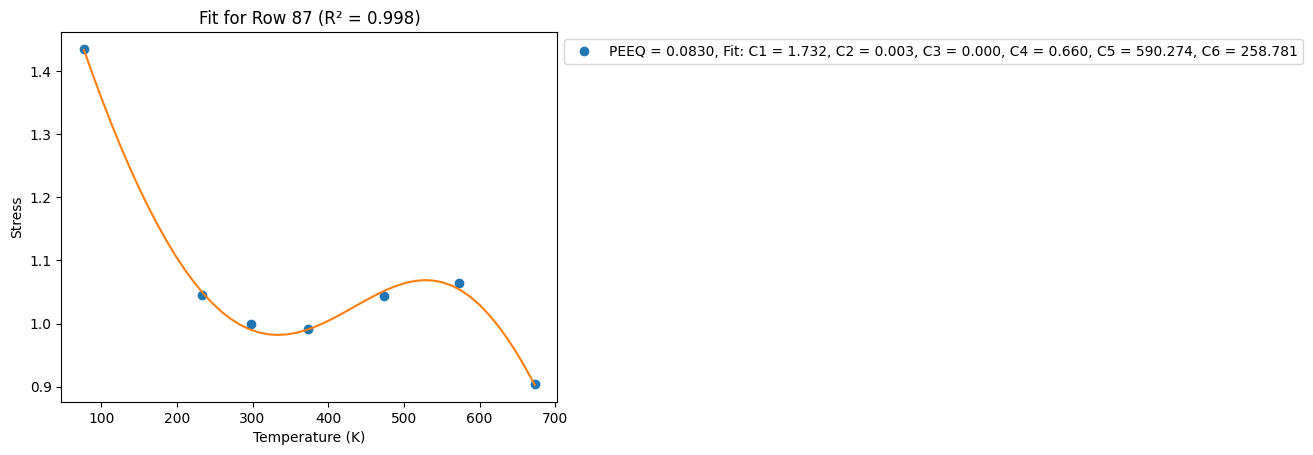

[1.4367996  1.04497349 1.         0.99145704 1.04474281 1.06459915
 0.90519189]


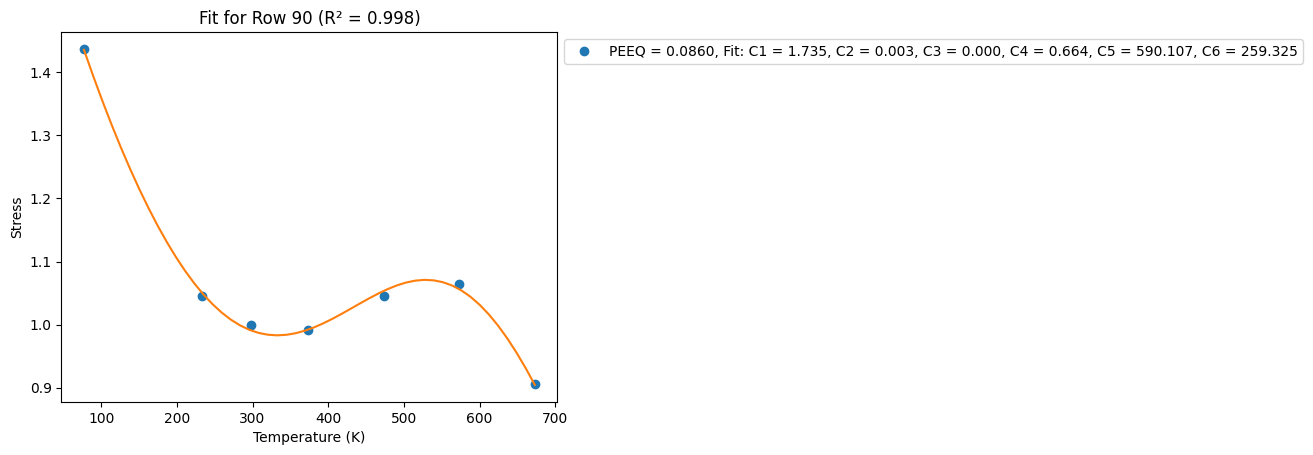

[1.43853523 1.04442449 1.         0.99184467 1.04528157 1.06569588
 0.90555029]


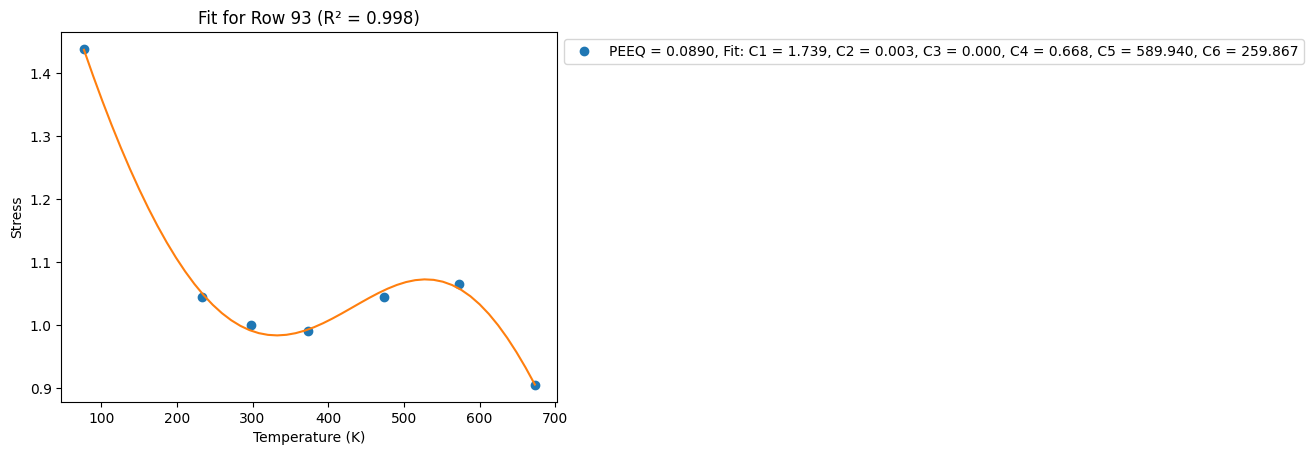

[1.44026741 1.04387431 1.         0.99222964 1.04580623 1.06675952
 0.90590613]


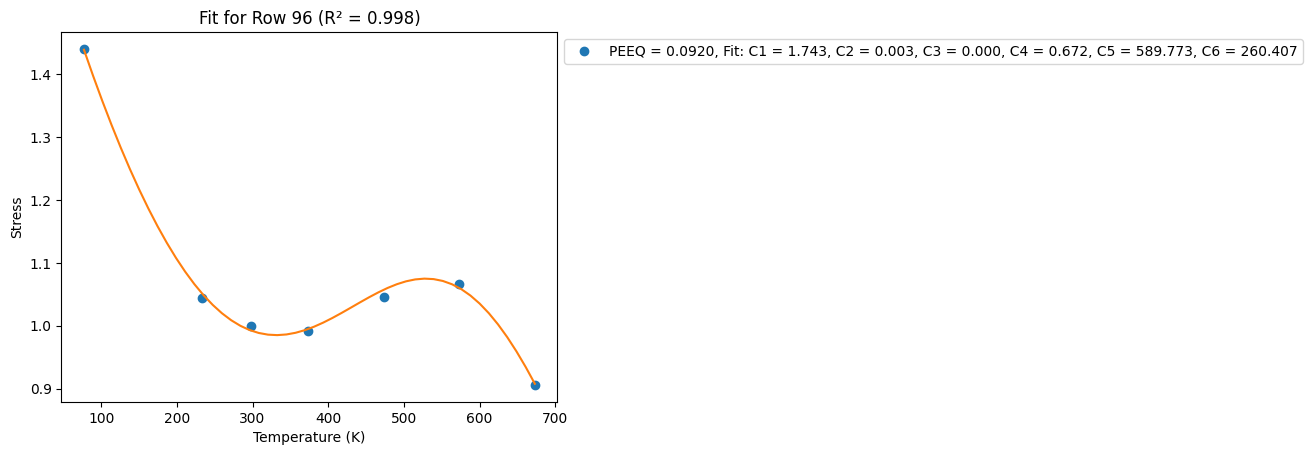

[1.44199473 1.04332441 1.         0.99261172 1.04631751 1.06779204
 0.90625918]


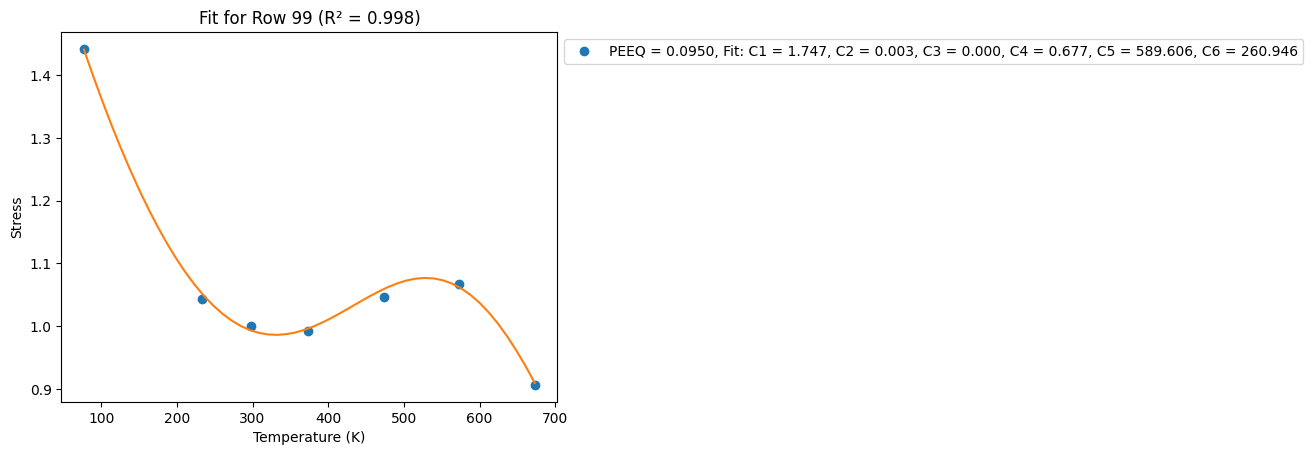

[1.44371605 1.04277599 1.         0.99299073 1.04681607 1.06879523
 0.90660926]


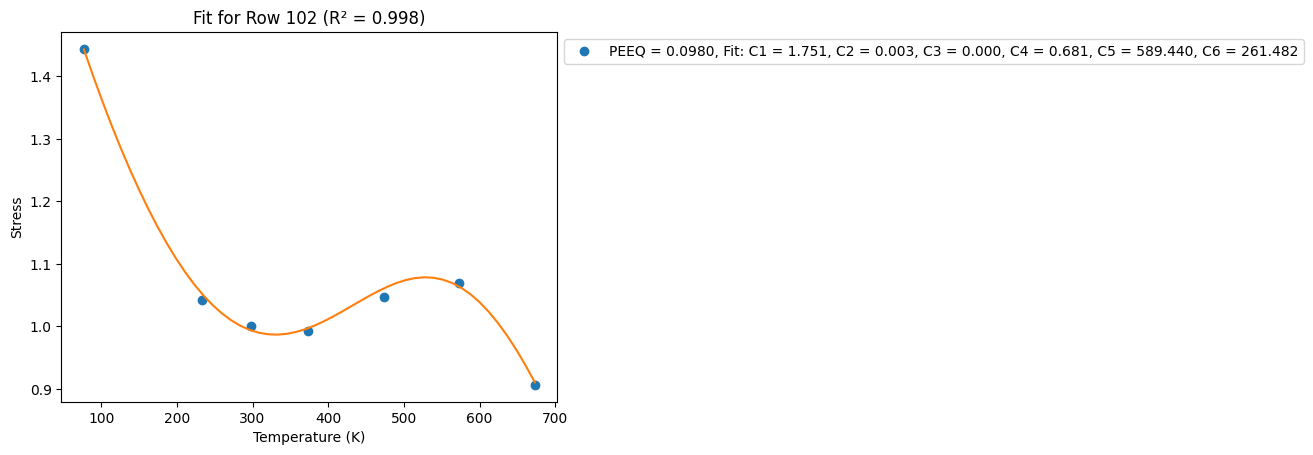

[1.44543039 1.04223004 1.         0.99336655 1.04730252 1.06977074
 0.90695624]


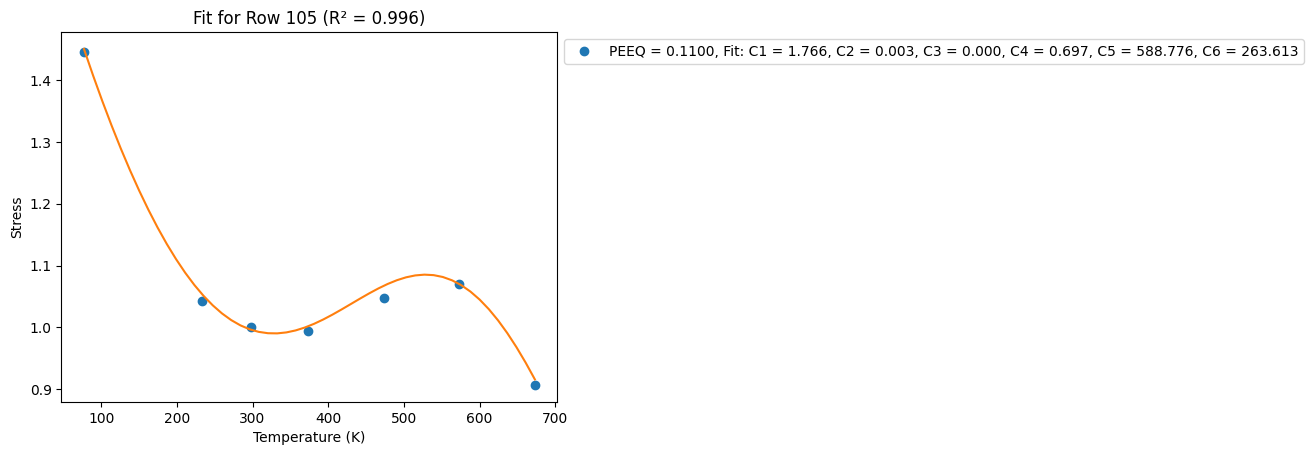

[1.46206879 1.03702512 1.         0.9969344  1.05160981 1.0782847
 0.91024344]


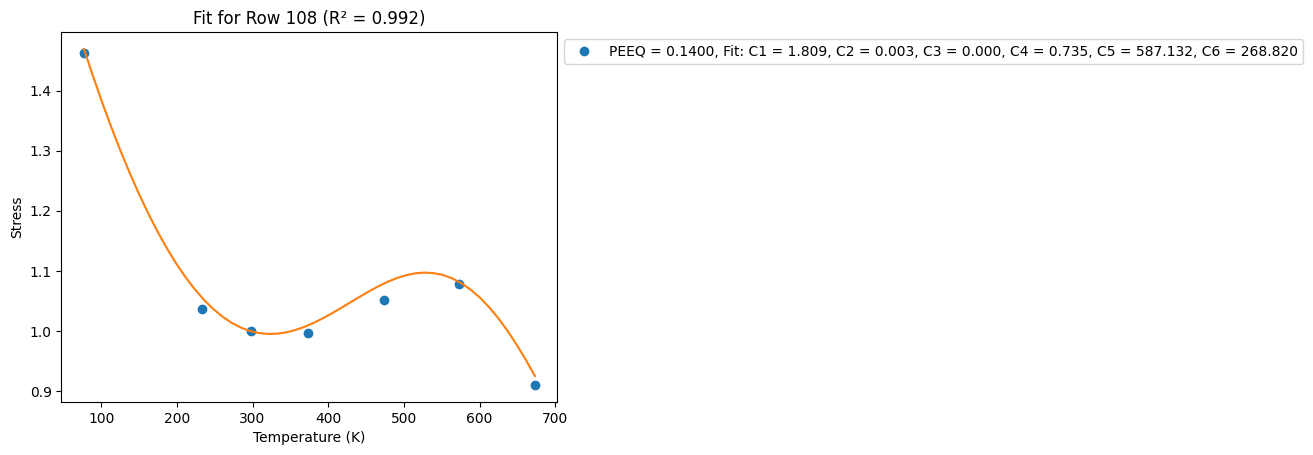

[1.47765636 1.0324051  1.         1.00015859 1.05515266 1.08515256
 0.91320572]


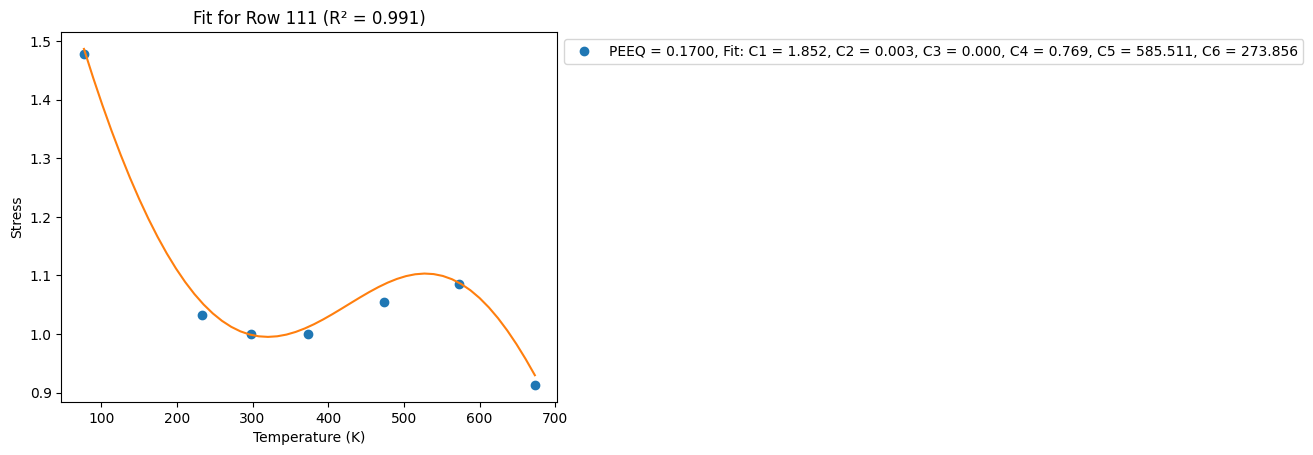

[1.49221651 1.02834831 1.         1.00307828 1.05816282 1.09091417
 0.91588361]


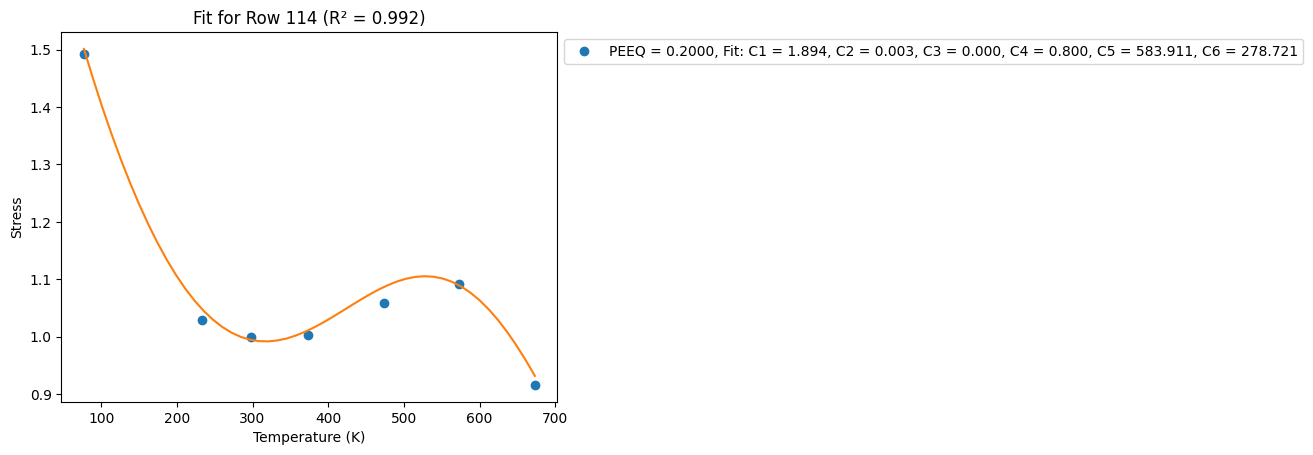

[1.5058547  1.02477016 1.         1.0057398  1.06078049 1.09587987
 0.91832188]


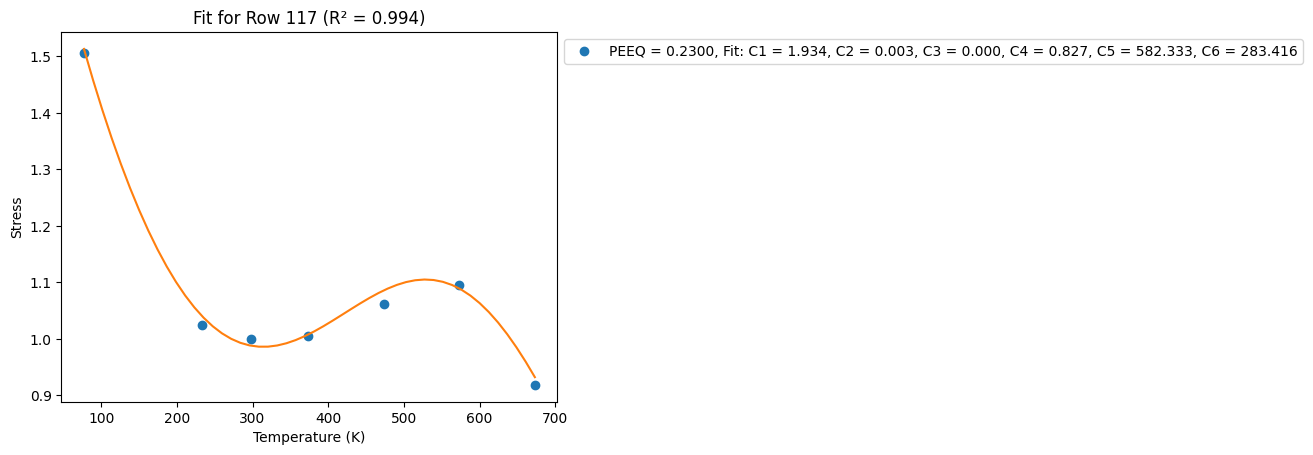

[1.51868229 1.02158881 1.         1.00818343 1.06309686 1.1002448
 0.92055865]


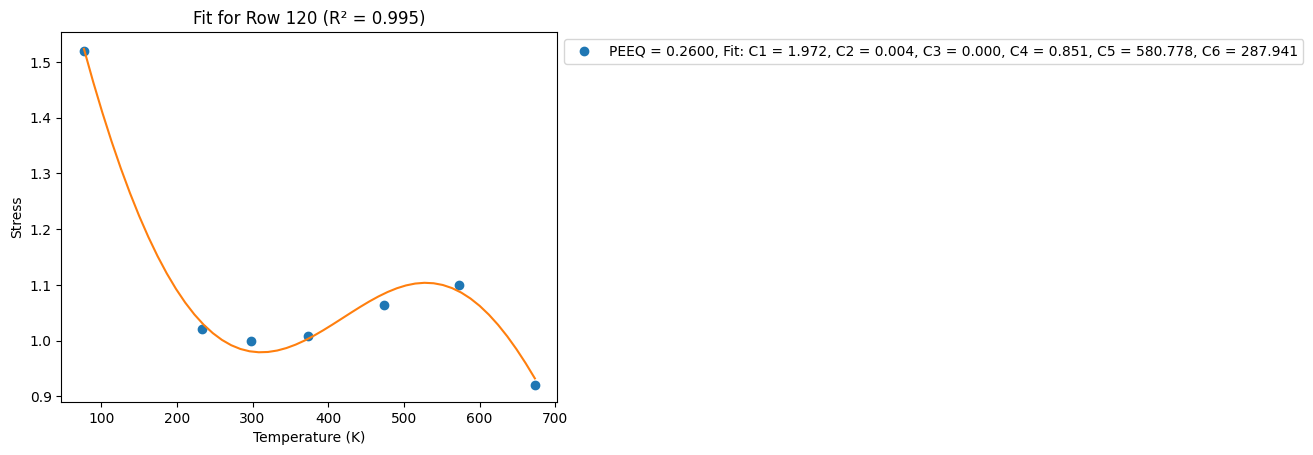

[1.5307988  1.01873644 1.         1.01044201 1.06517455 1.10413986
 0.9226247 ]


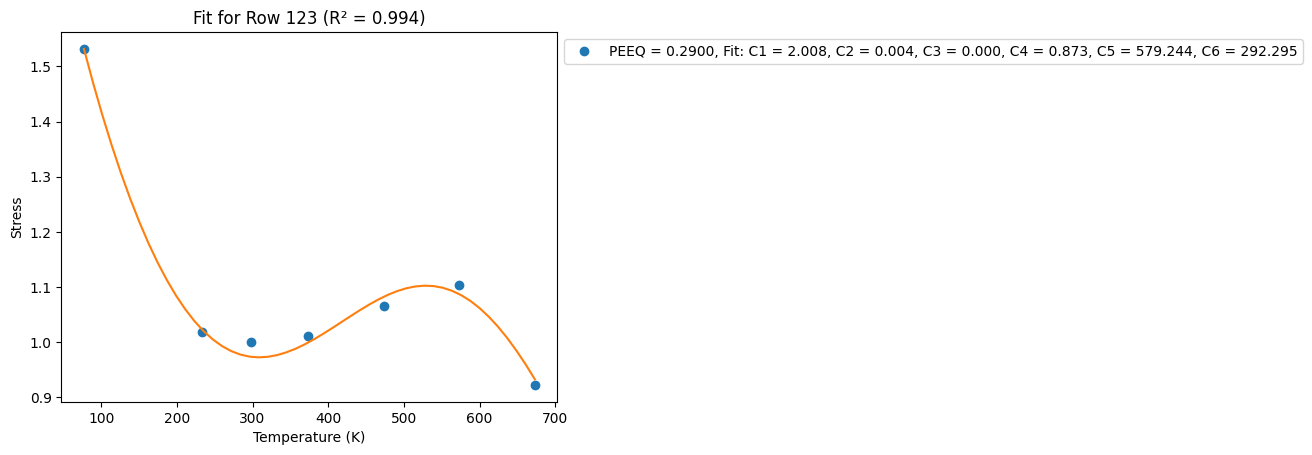

[1.5422891  1.01615884 1.         1.01254199 1.06705844 1.10765714
 0.92454469]


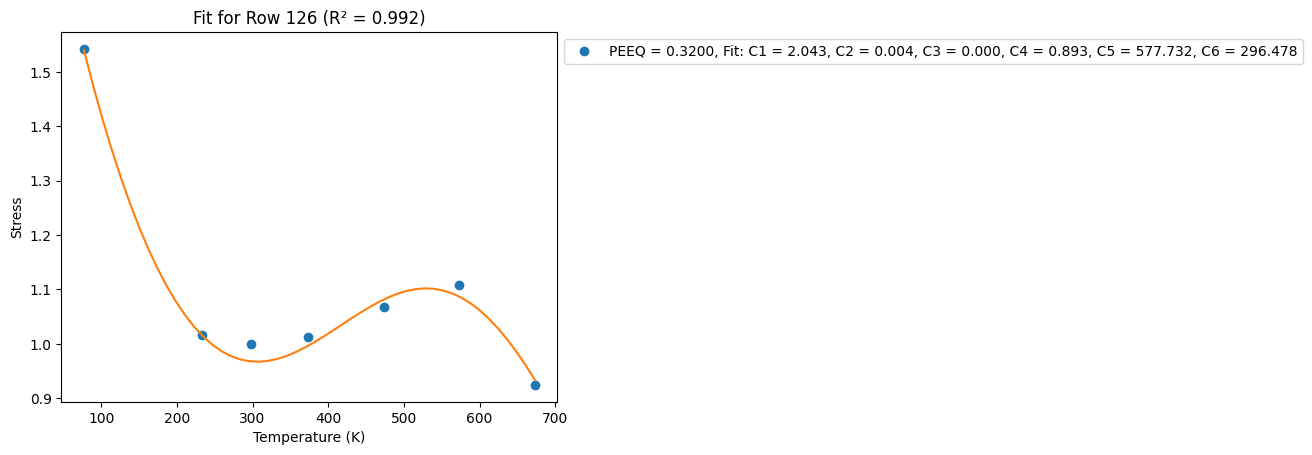

[1.5532247  1.01381297 1.         1.01450474 1.0687818  1.11086399
 0.92633844]


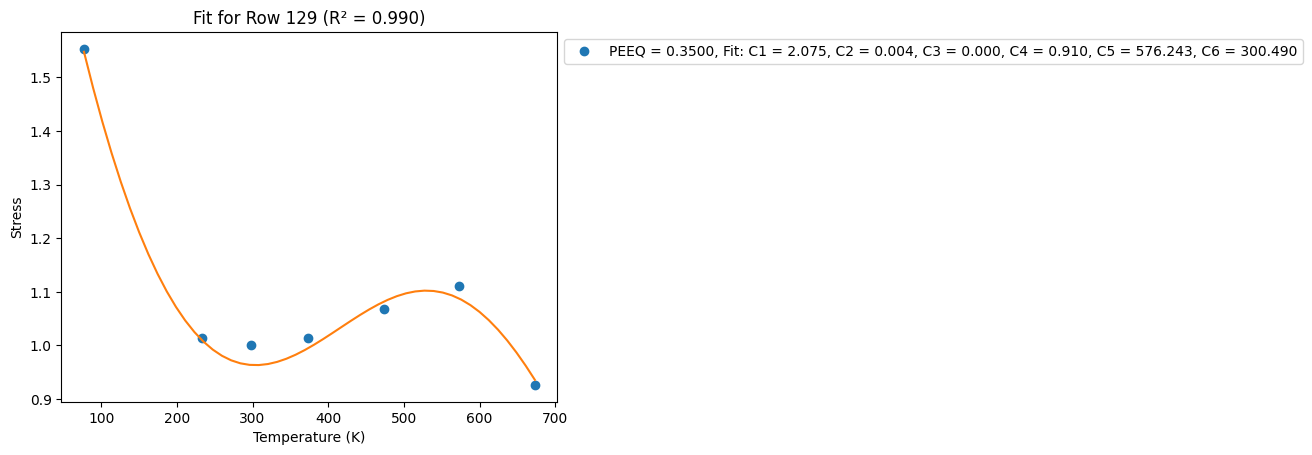

[1.56366581 1.01166446 1.         1.01634767 1.07036997 1.11381112
 0.92802208]


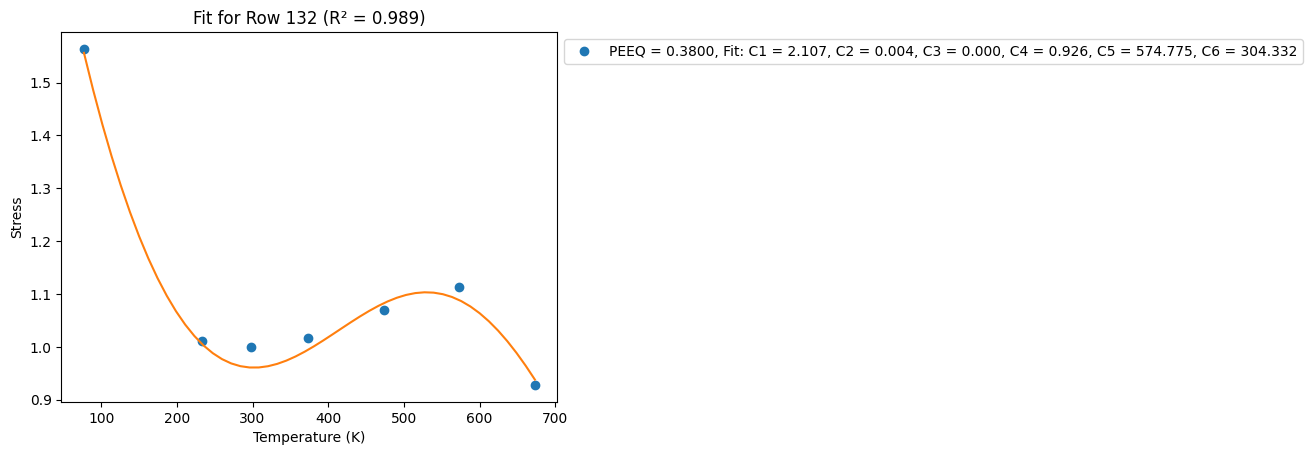

[1.57366334 1.00968563 1.         1.01808509 1.0718427  1.11653773
 0.92960885]


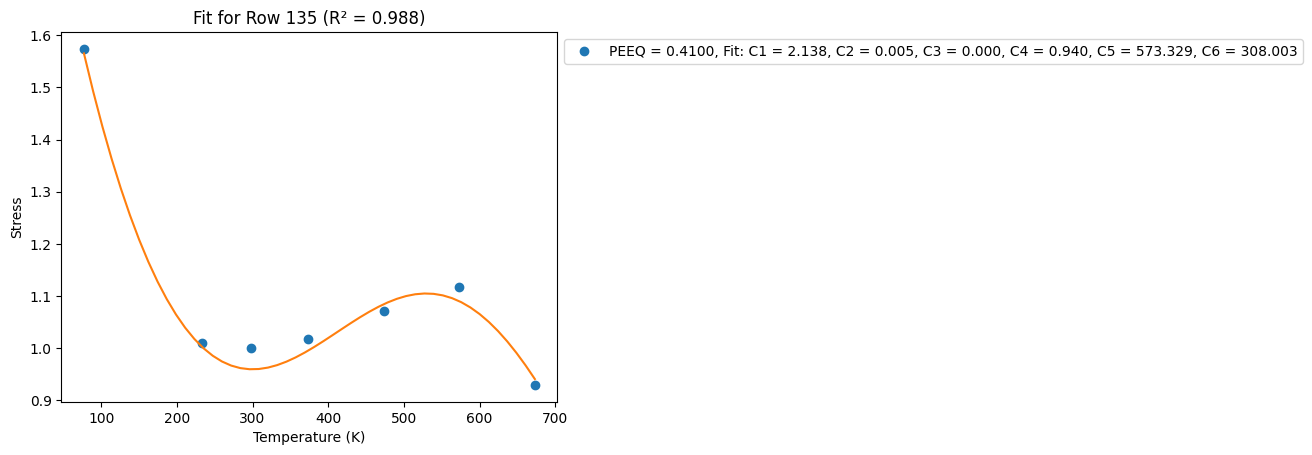

[1.5832606  1.00785393 1.         1.01972891 1.07321573 1.11907471
 0.93110974]


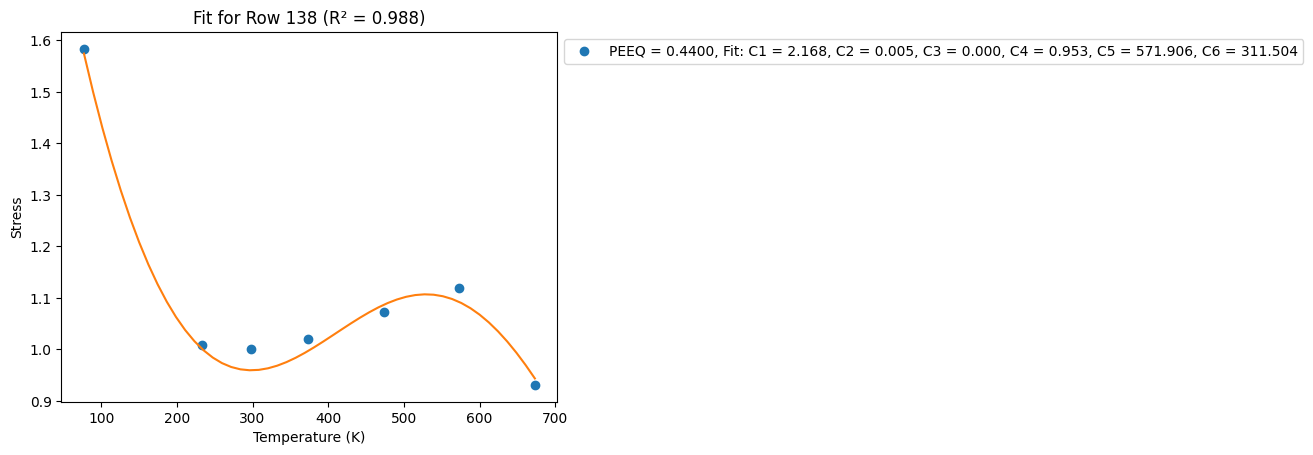

[1.59249471 1.00615085 1.         1.02128913 1.07450172 1.12144686
 0.93253397]


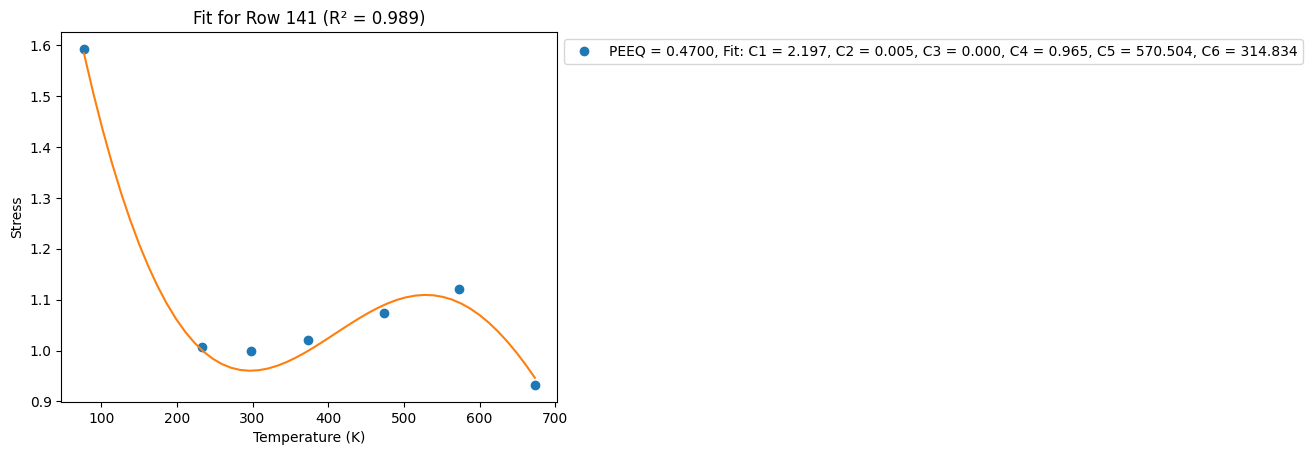

[1.60139768 1.00456103 1.         1.0227742  1.07571111 1.12367442
 0.93388931]


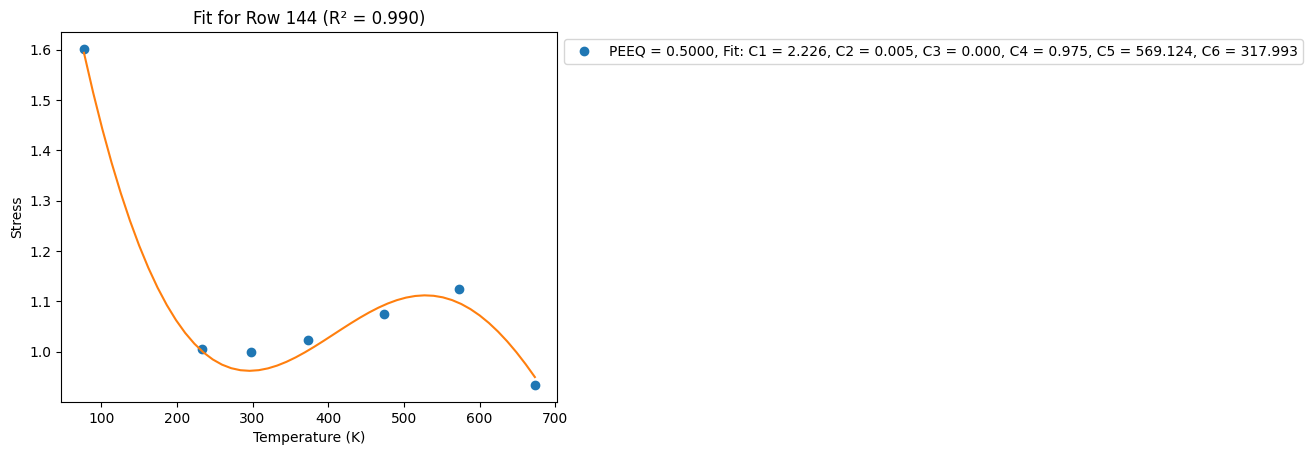

[1.60999731 1.00307157 1.         1.02419137 1.07685252 1.12577408
 0.93518244]


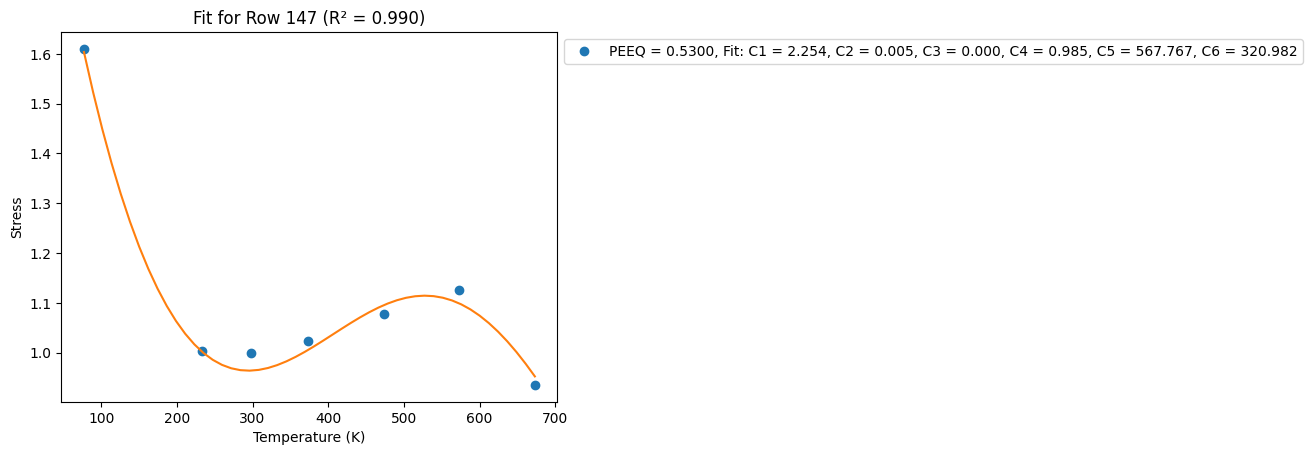

[1.61831791 1.00167161 1.         1.02554684 1.07793321 1.12775981
 0.93641907]


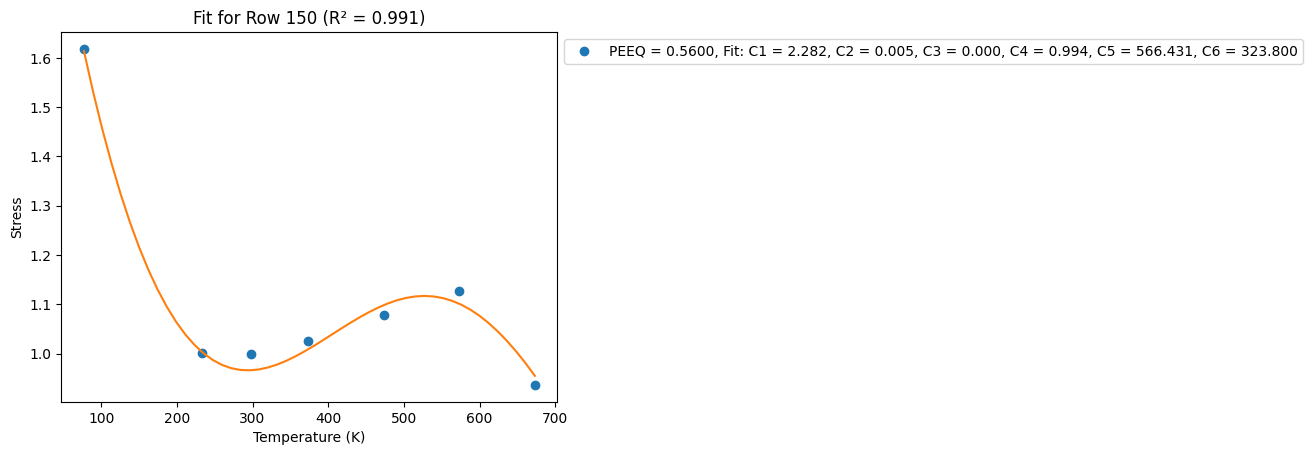

[1.62638083 1.00035187 1.         1.02684603 1.07895932 1.12964337
 0.93760416]


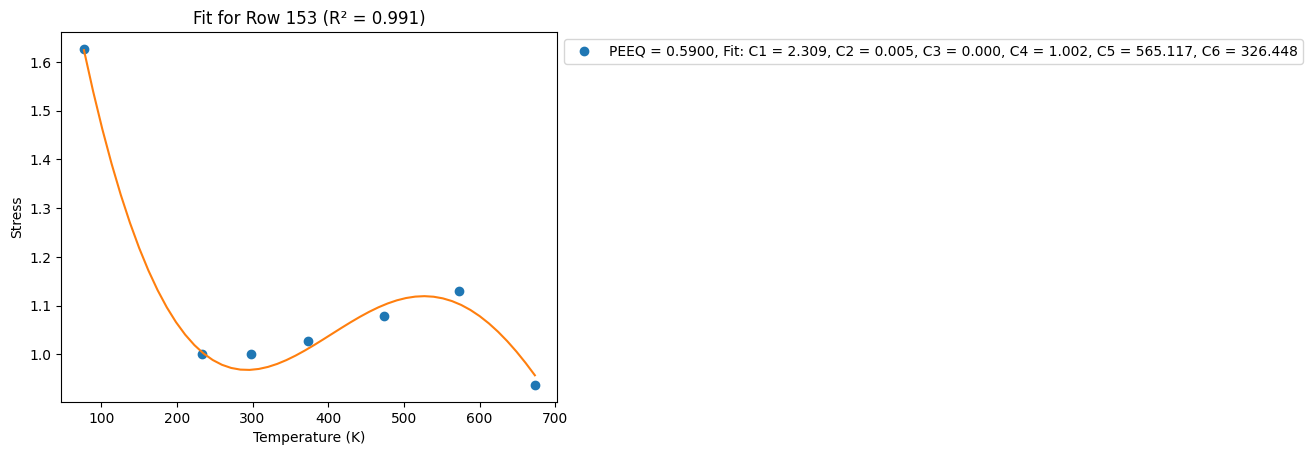

[1.63420497 0.99910442 1.         1.02809363 1.07993611 1.13143482
 0.93874204]


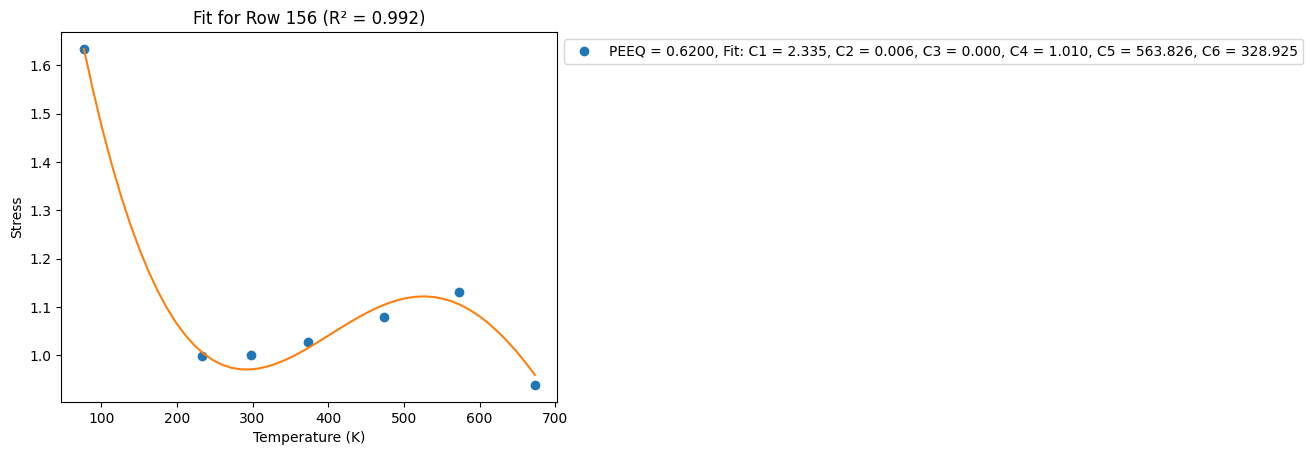

[1.64180709 0.9979224  1.         1.02929378 1.08086811 1.13314277
 0.9398365 ]


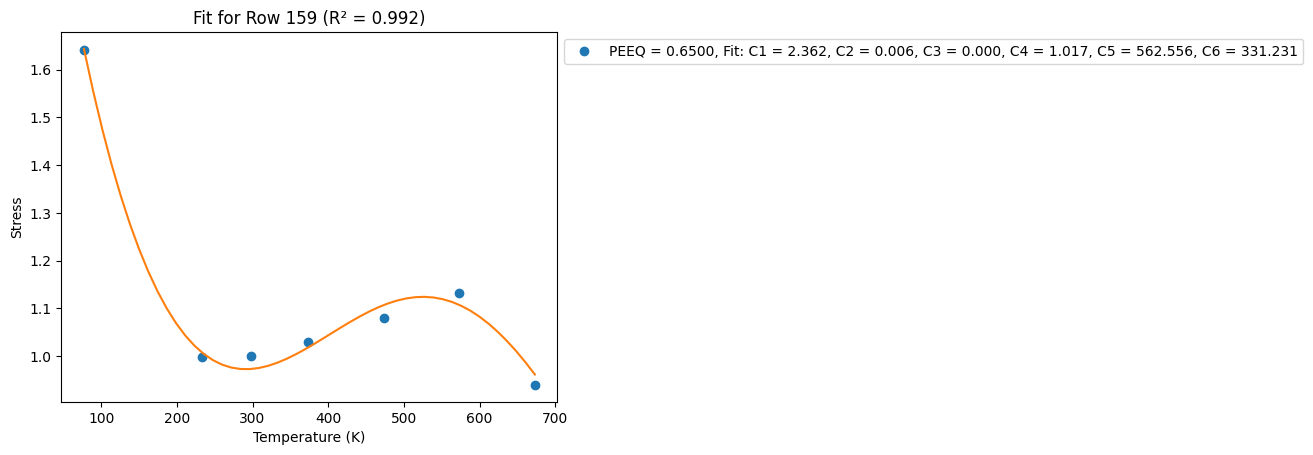

[1.6492022  0.99679983 1.         1.03045013 1.08175926 1.1347747
 0.94089088]


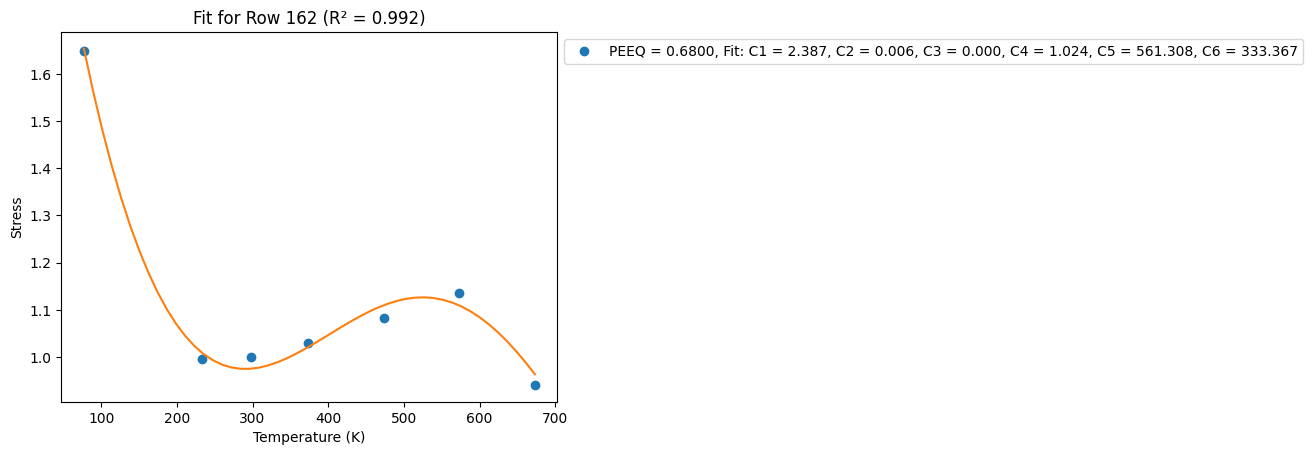

[1.65640371 0.99573153 1.         1.03156591 1.08261298 1.13633709
 0.94190817]


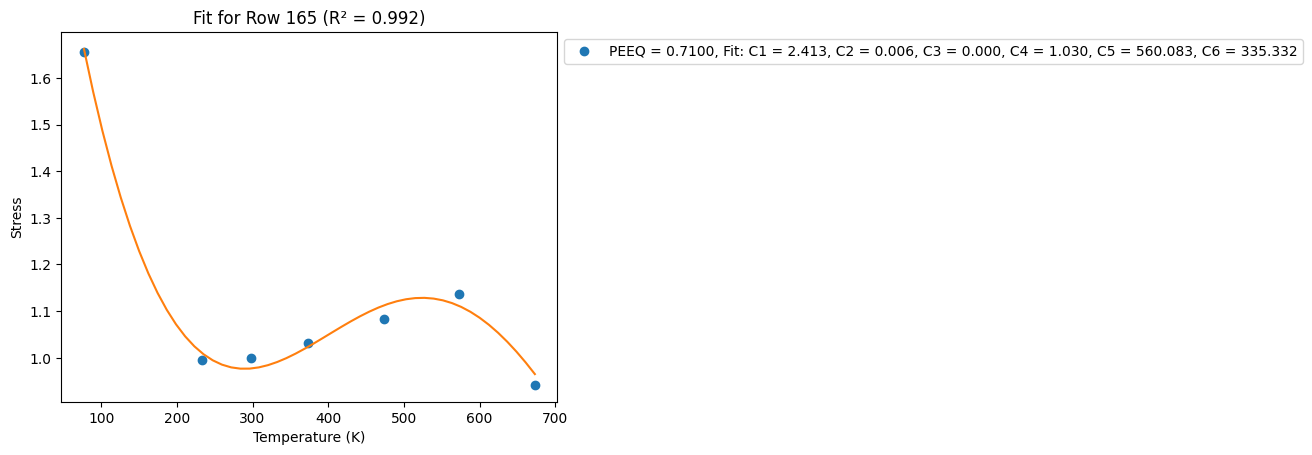

[1.66342373 0.99471292 1.         1.03264402 1.08343228 1.13783566
 0.94289099]


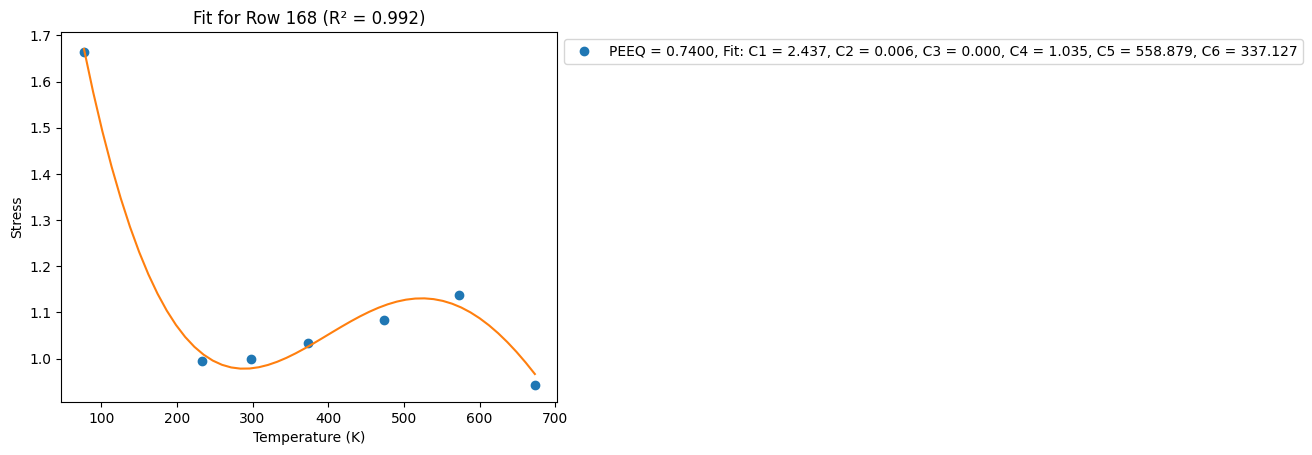

[1.6702732  0.99373995 1.         1.03368703 1.08421985 1.13927543
 0.94384173]


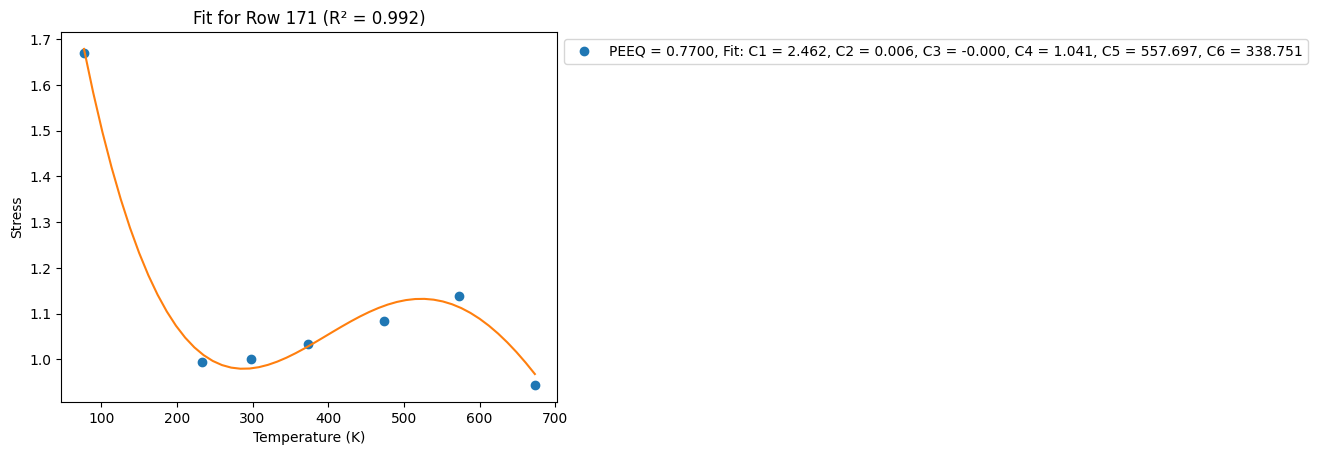

[1.67696204 0.99280905 1.         1.03469726 1.08497804 1.14066084
 0.94476251]


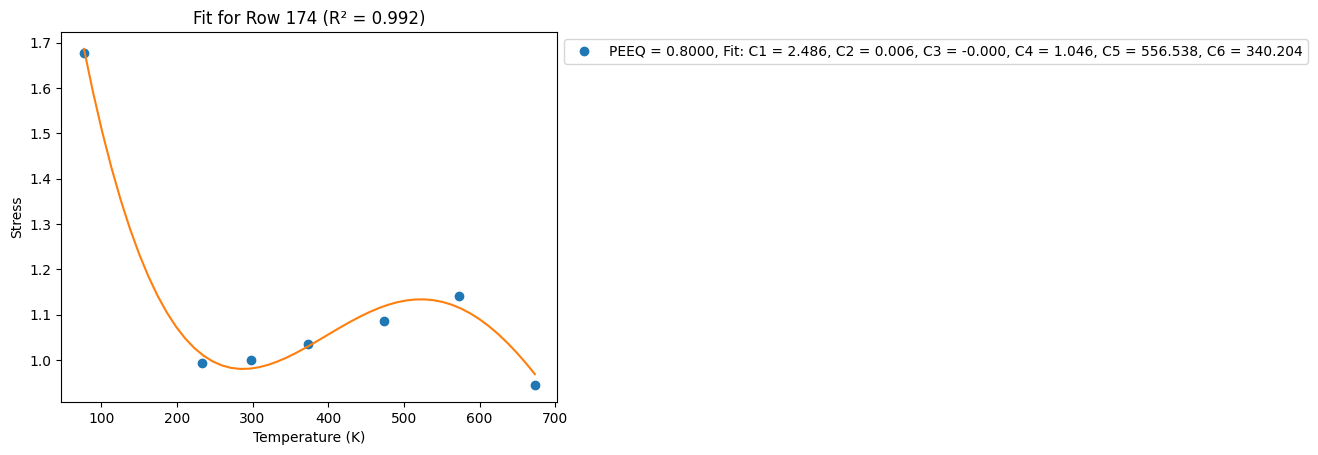

[1.68349929 0.99191704 1.         1.03567682 1.08570897 1.14199587
 0.94565525]


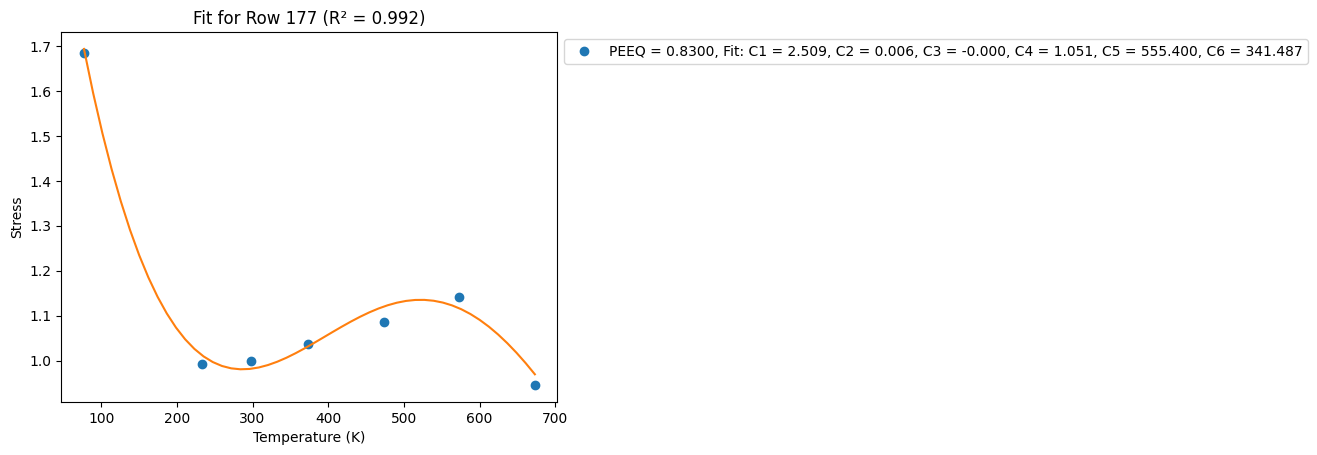

[1.68989319 0.99106106 1.         1.03662759 1.08641452 1.14328406
 0.94652169]


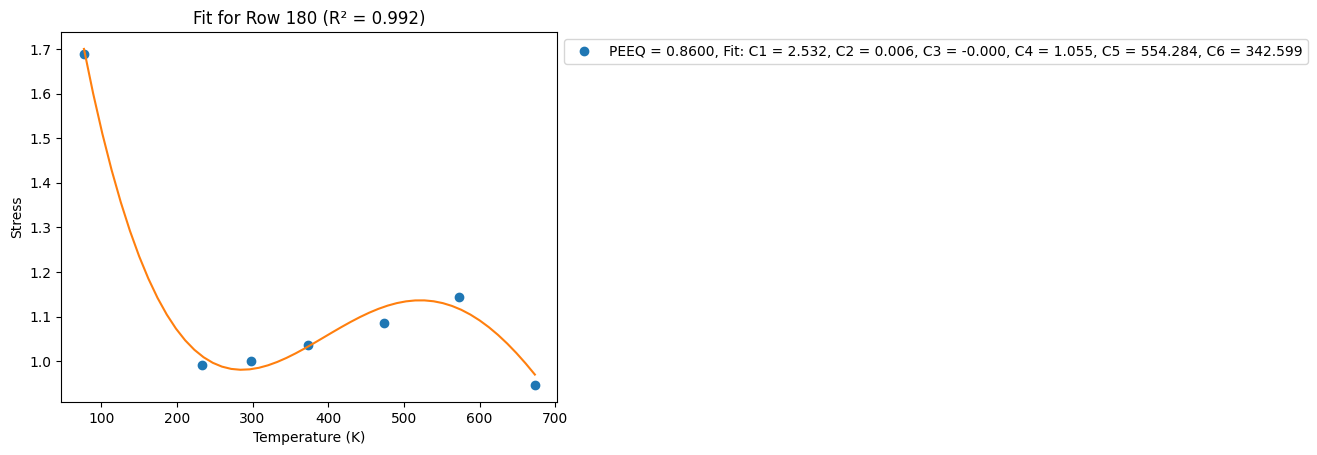

[1.6961513  0.99023855 1.         1.0375513  1.0870964  1.1445286
 0.9473634 ]


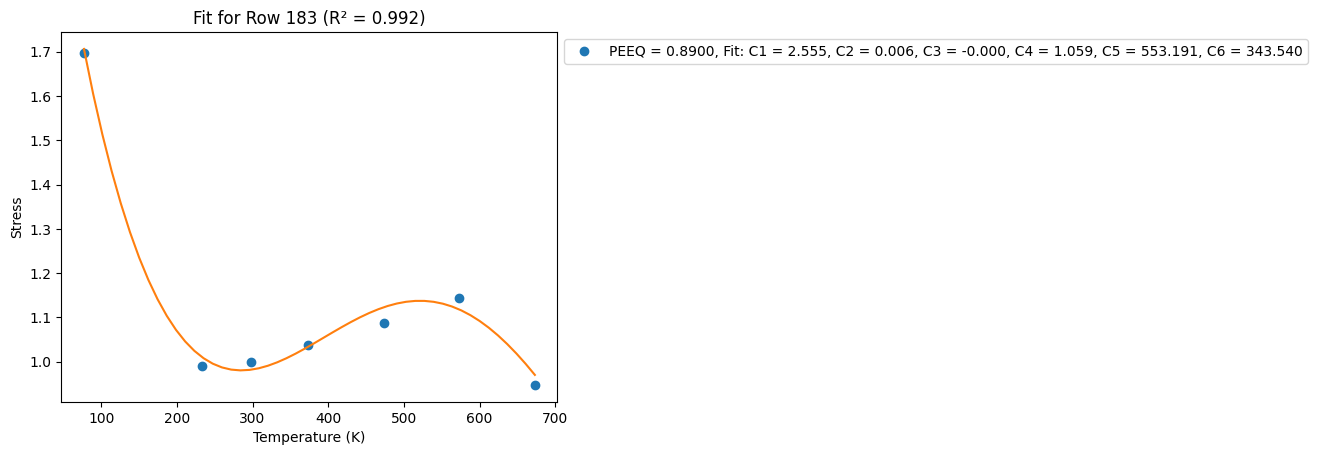

[1.70228056 0.98944722 1.         1.03844952 1.08775614 1.14573234
 0.94818182]


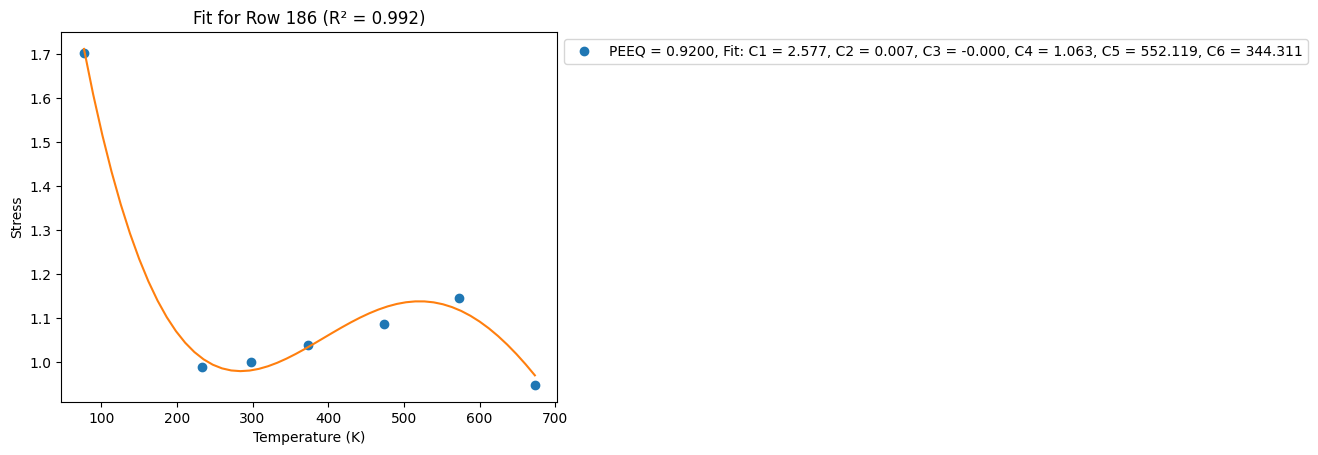

[1.70828735 0.98868498 1.         1.03932369 1.08839513 1.14689788
 0.94897827]


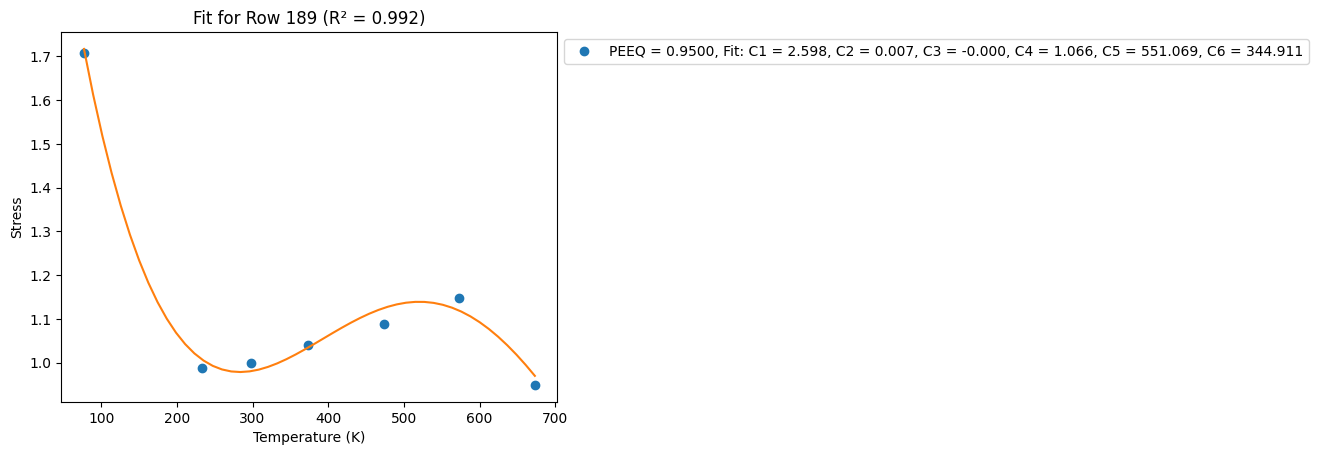

[1.71417758 0.98794995 1.         1.04017513 1.08901464 1.14802758
 0.94975395]


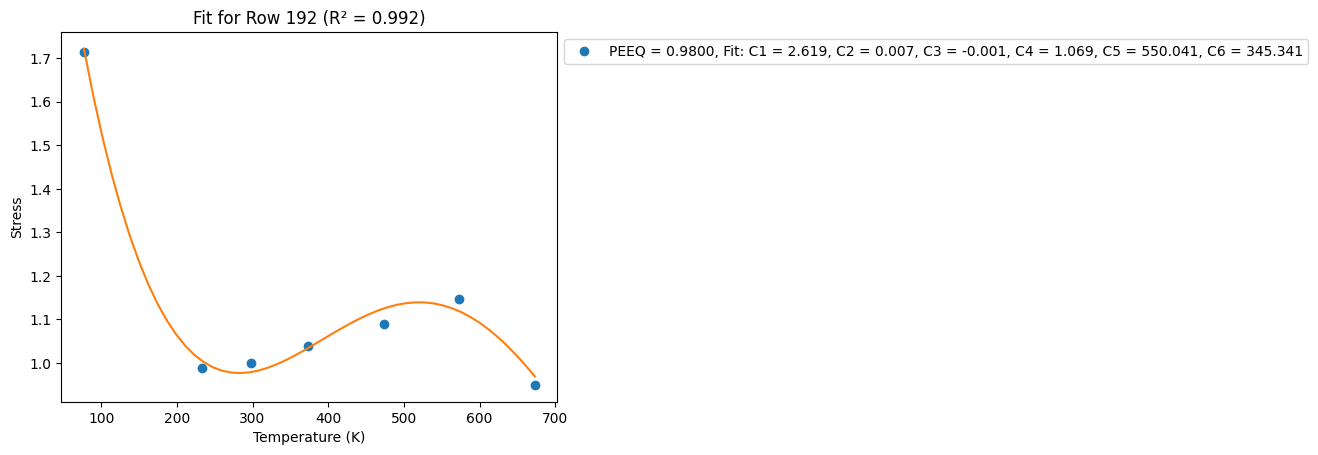

[1.71995669 0.98724041 1.         1.04100503 1.08961581 1.14912358
 0.95050997]


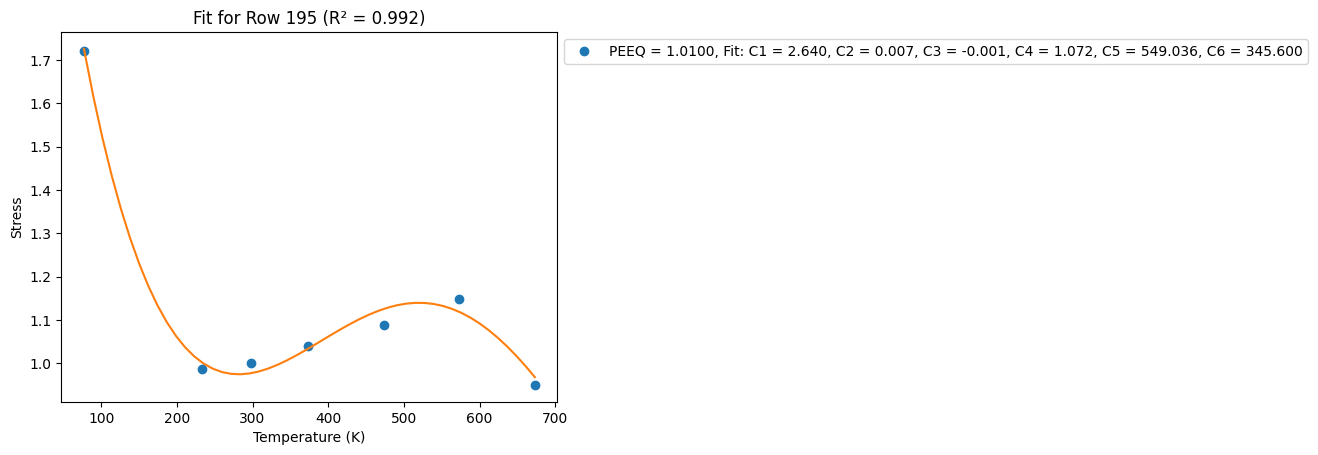

[1.72562976 0.98655481 1.         1.04181451 1.0901997  1.15018783
 0.95124735]


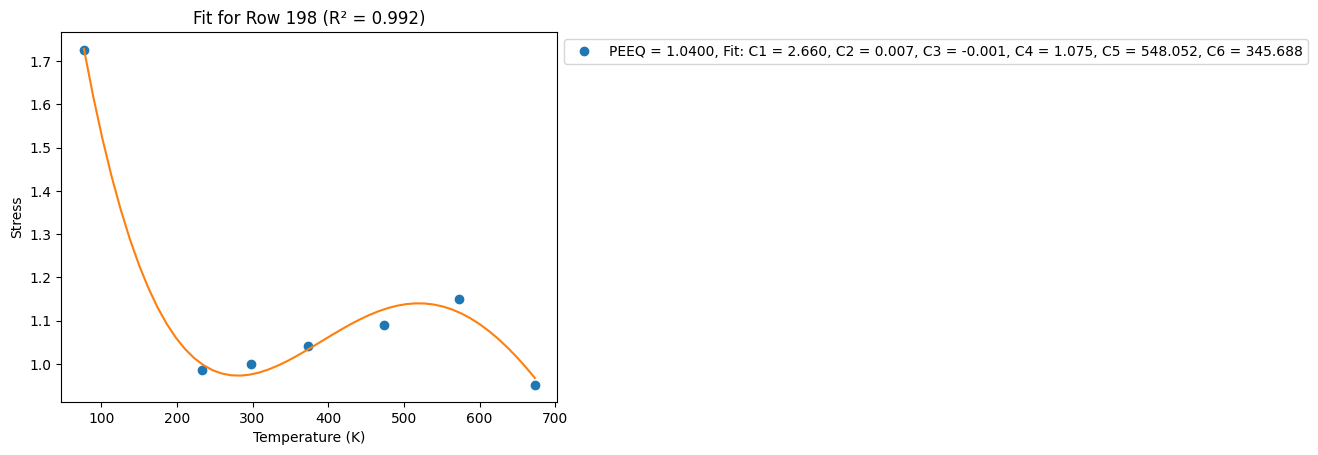

[1.73120147 0.98589171 1.         1.04260461 1.09076727 1.15122212
 0.95196701]


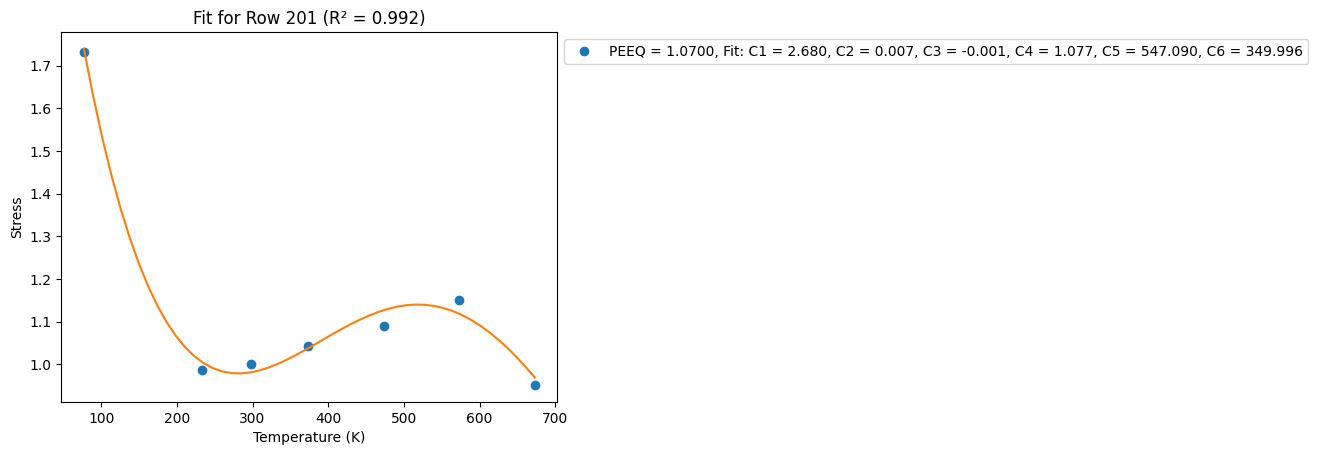

[1.73667621 0.98524981 1.         1.04337626 1.0913194  1.1522281
 0.95266985]


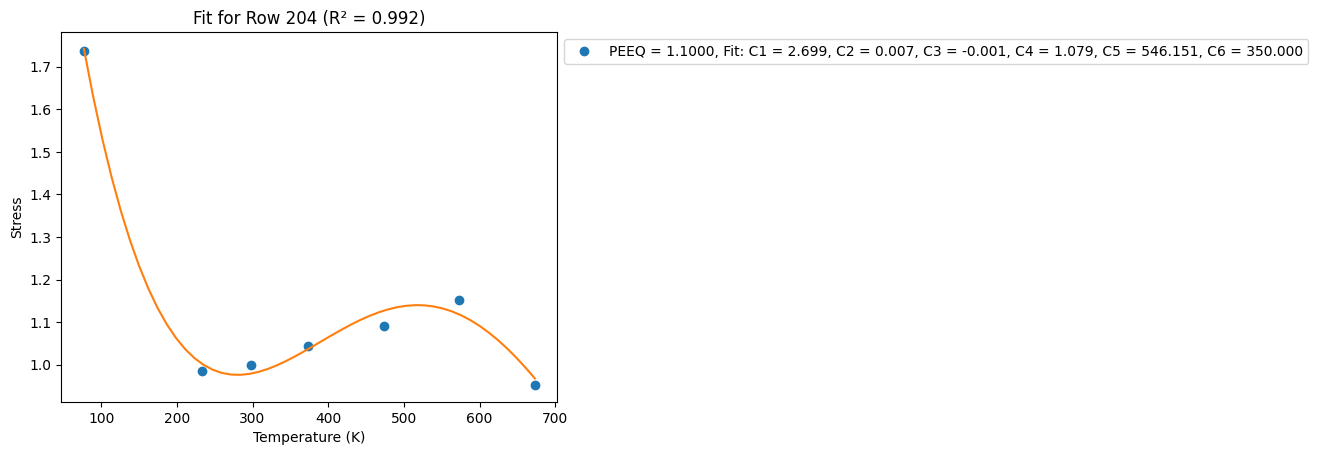

[1.74205806 0.98462792 1.         1.04413036 1.09185691 1.15320727
 0.95335665]


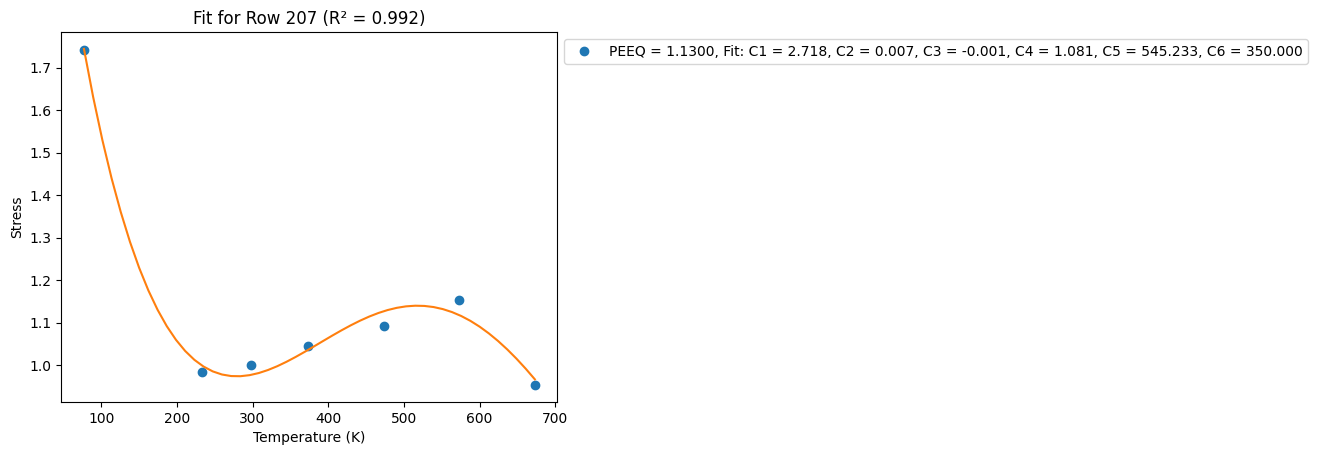

[1.74735083 0.98402492 1.         1.04486771 1.09238055 1.15416103
 0.95402817]


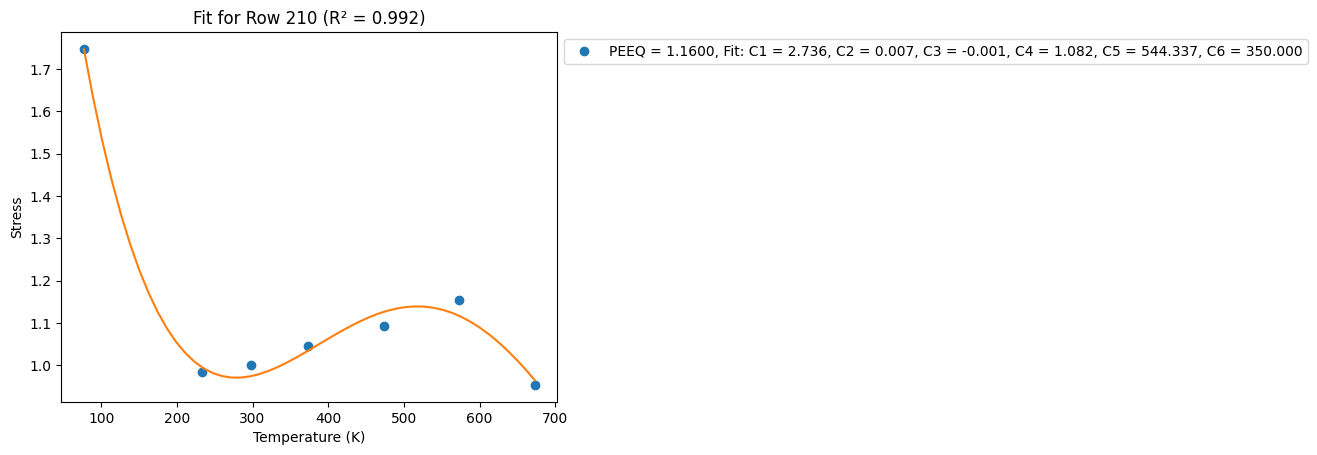

[1.75255809 0.98343981 1.         1.04558909 1.09289102 1.15509067
 0.95468511]


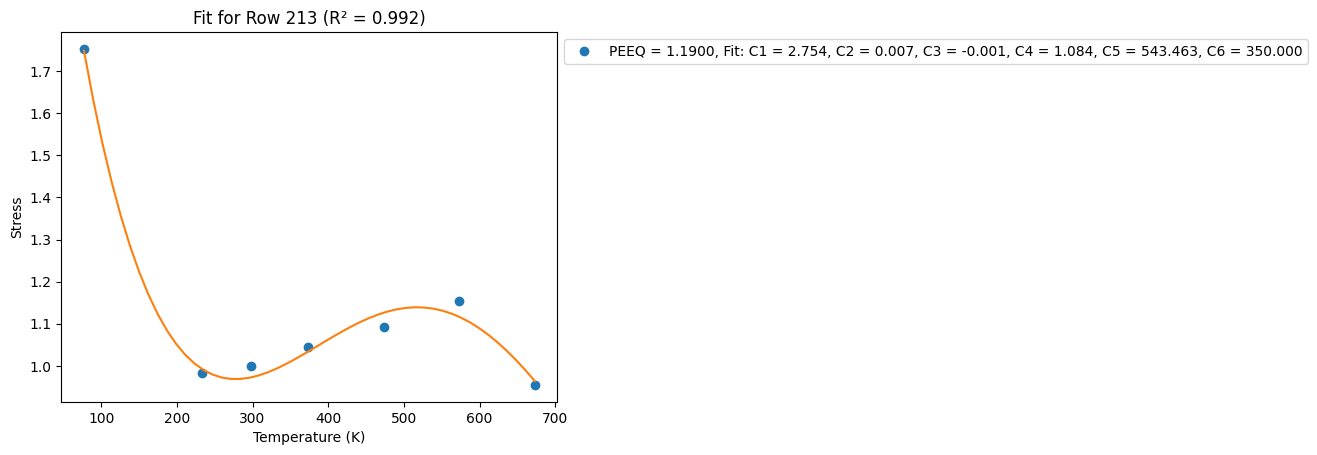

[1.75768318 0.98287163 1.         1.0462952  1.09338895 1.15599737
 0.95532811]


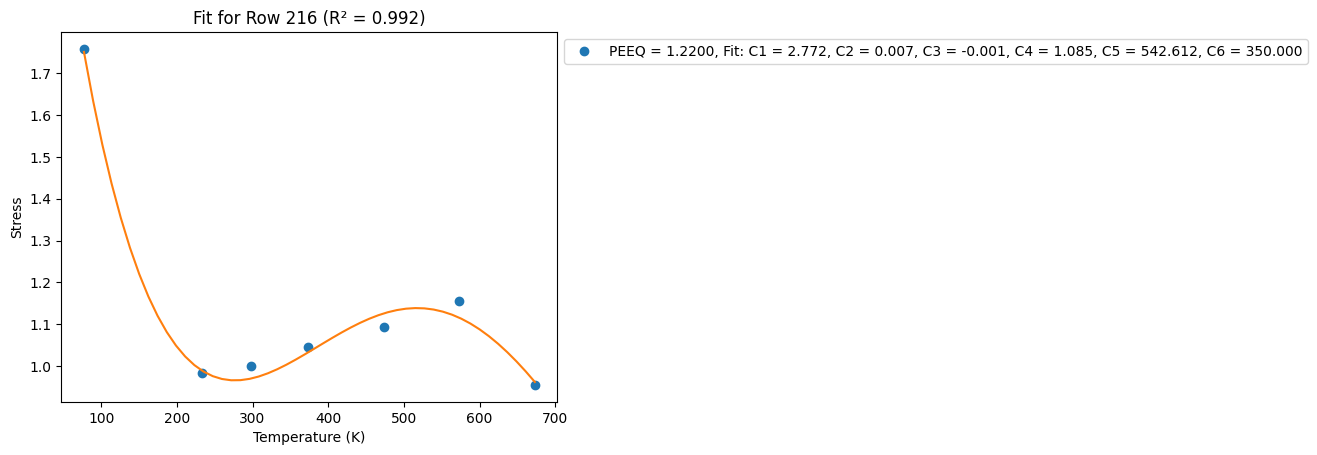

[1.76272925 0.98231952 1.         1.0469867  1.09387496 1.15688224
 0.95595778]


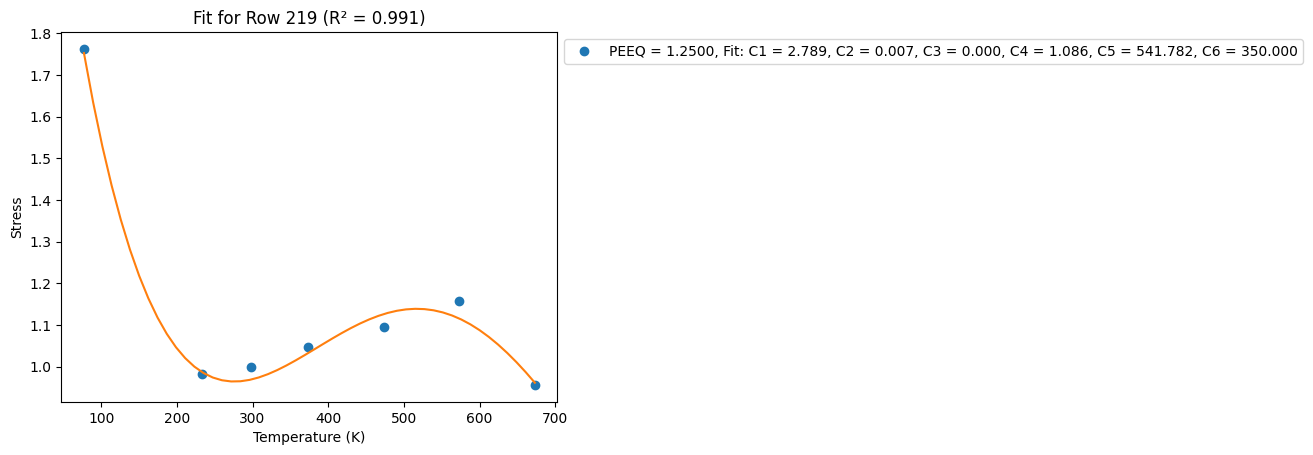

[1.76769925 0.98178268 1.         1.04766421 1.09434959 1.1577463
 0.95657468]


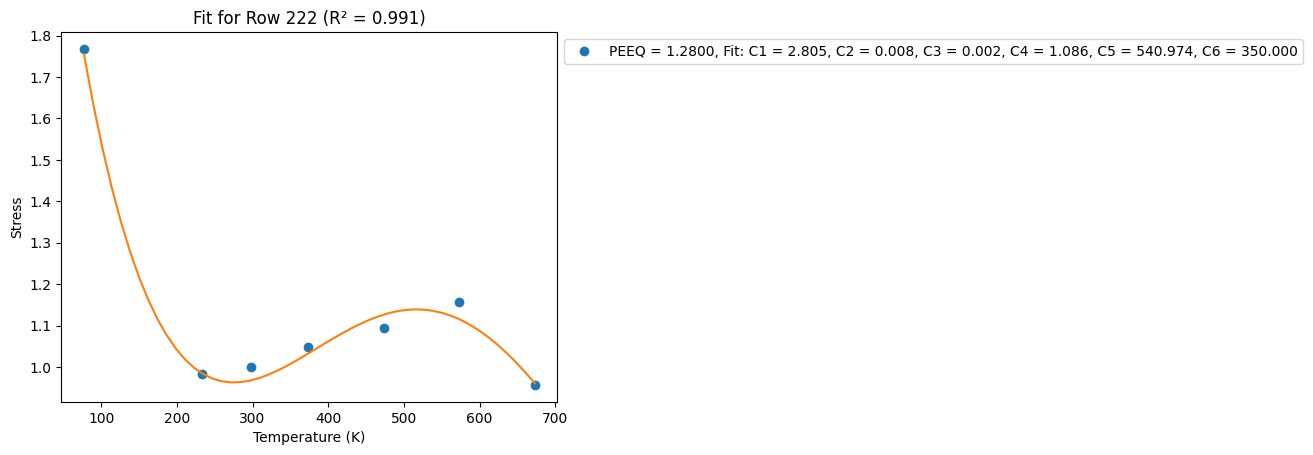

[1.77259597 0.98126034 1.         1.04832831 1.09481337 1.15859052
 0.95717934]


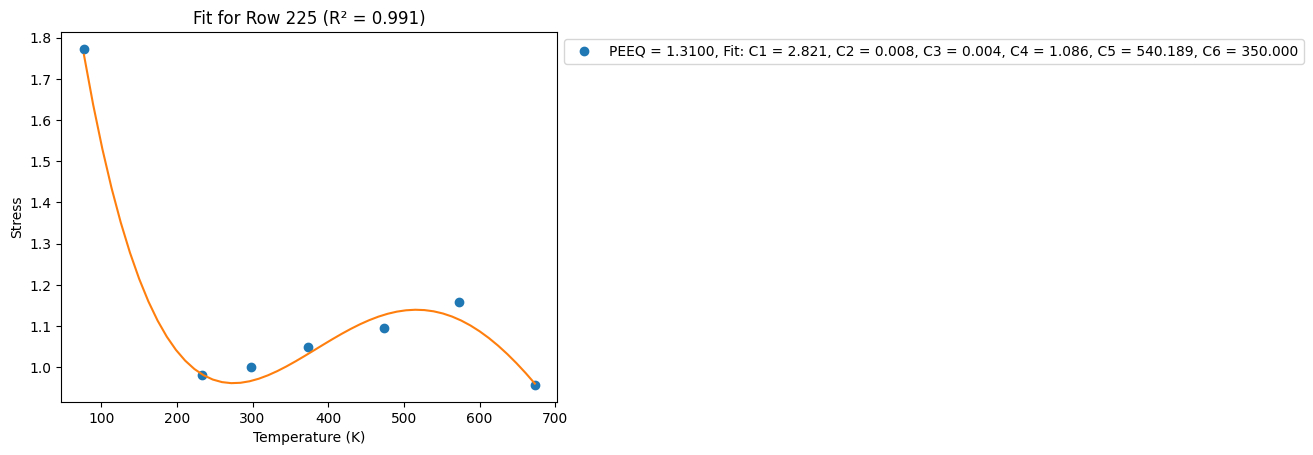

[1.77742202 0.98075183 1.         1.04897955 1.09526677 1.15941578
 0.95777227]


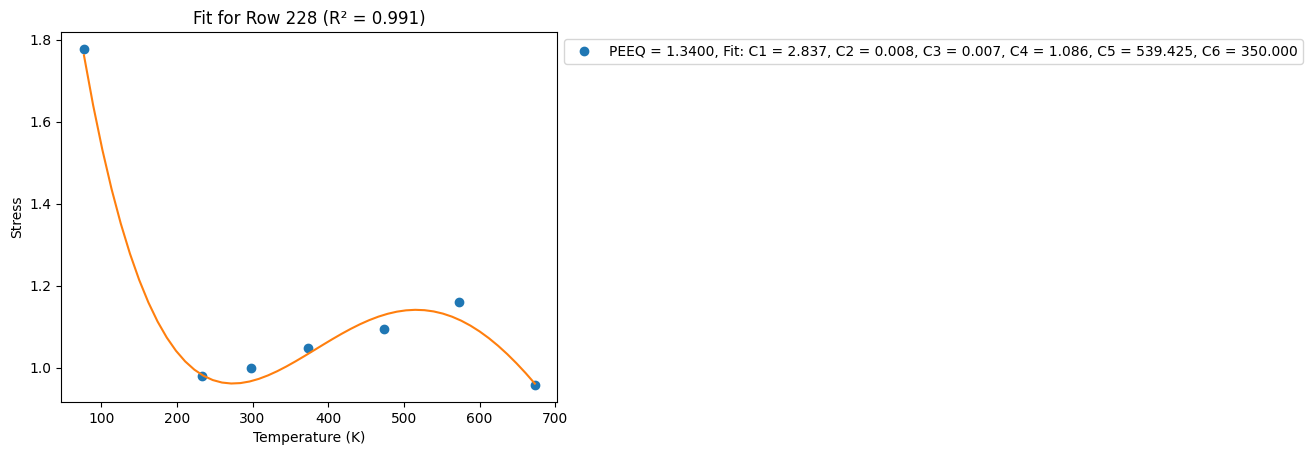

[1.78217987 0.98025648 1.         1.04961844 1.09571025 1.16022292
 0.95835393]


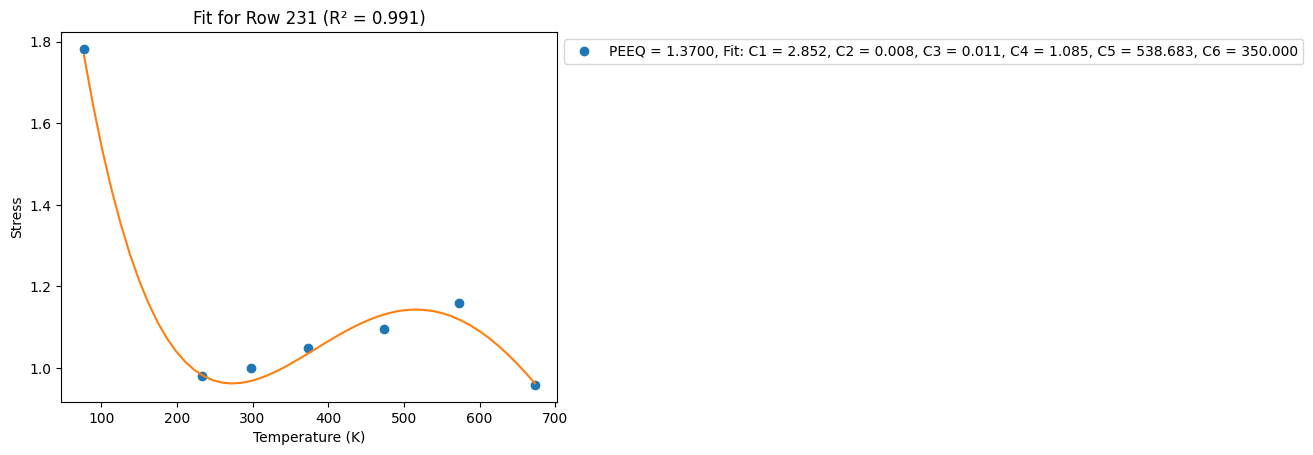

[1.78687188 0.9797737  1.         1.05024545 1.09614423 1.16101272
 0.95892476]


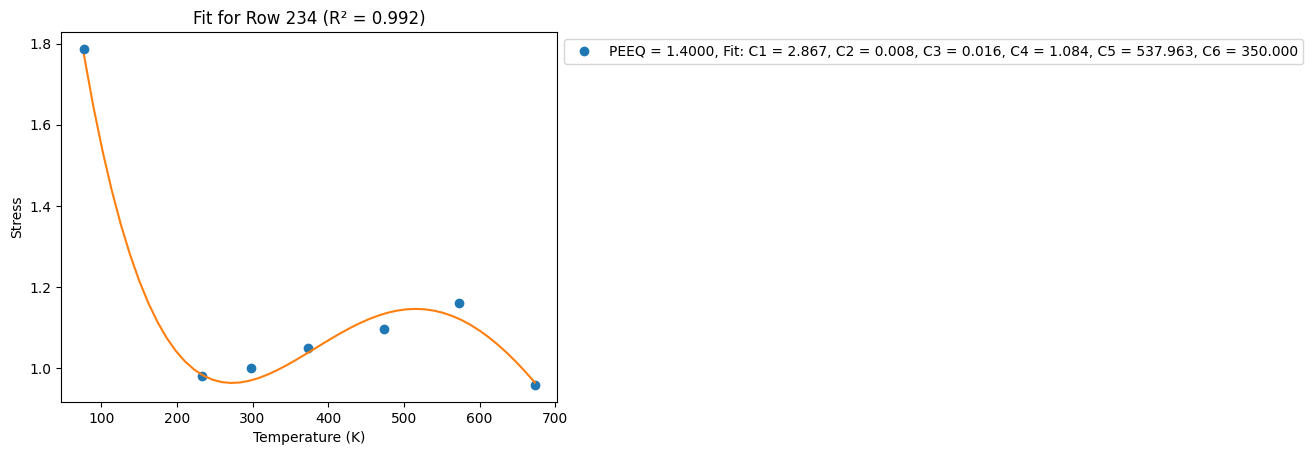

[1.79150024 0.9793029  1.         1.05086105 1.0965691  1.16178589
 0.95948517]


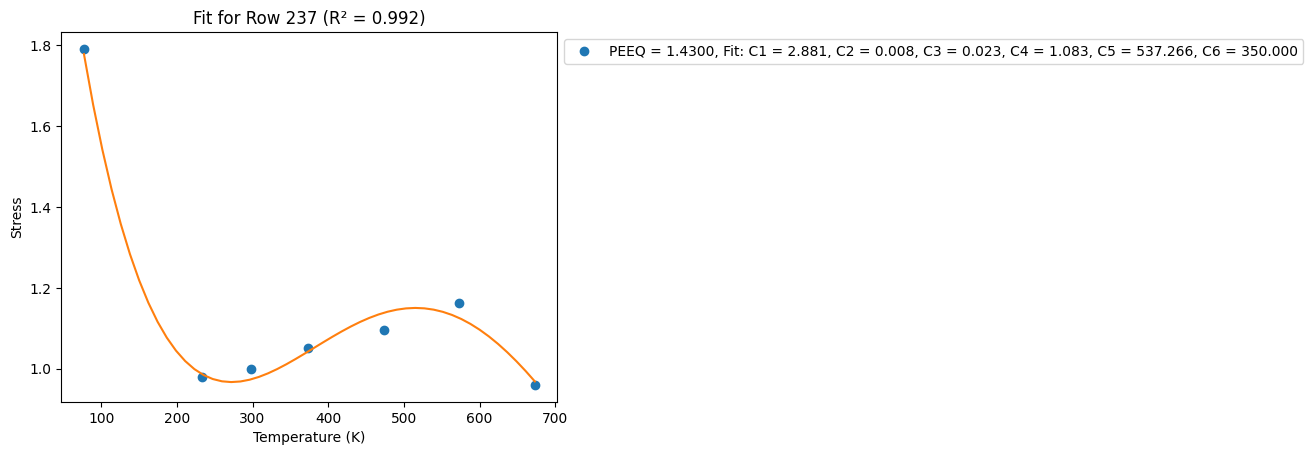

[1.79606707 0.97884357 1.         1.05146566 1.09698525 1.16254314
 0.96003556]


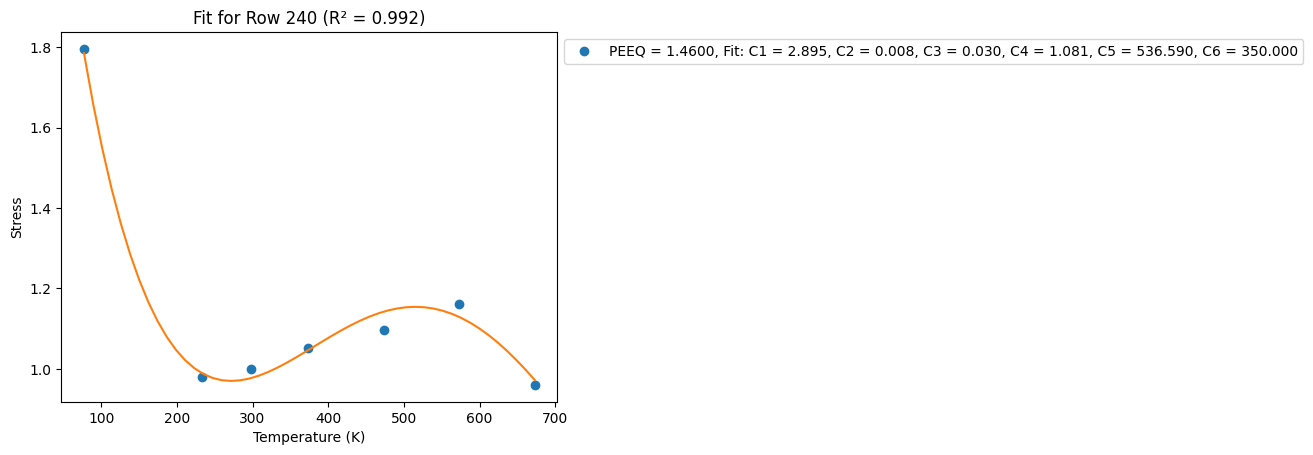

[1.80057434 0.97839521 1.         1.05205967 1.09739302 1.1632851
 0.96057628]


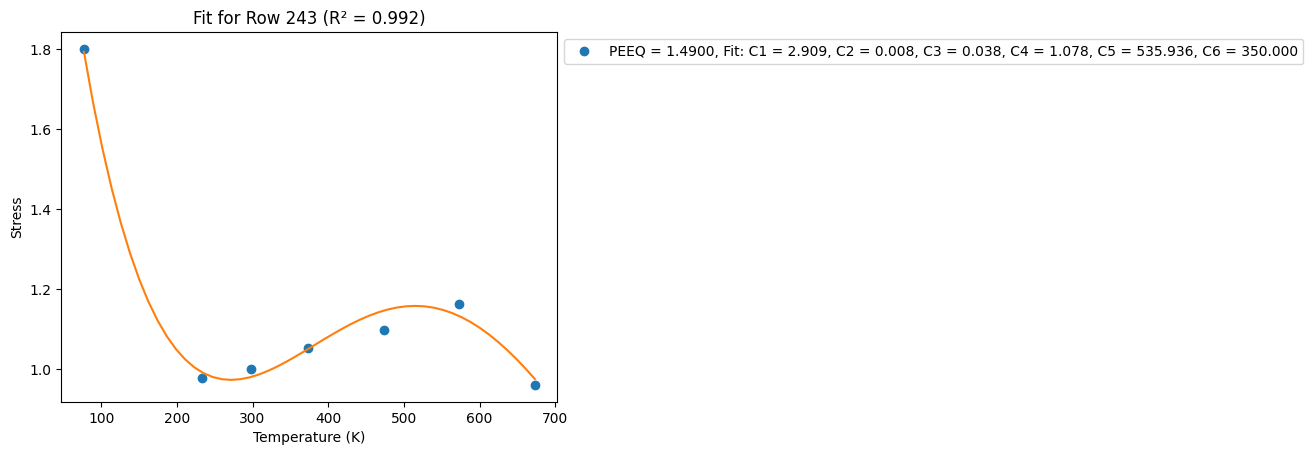

[1.80502394 0.97795734 1.         1.05264348 1.09779273 1.16401237
 0.9611077 ]


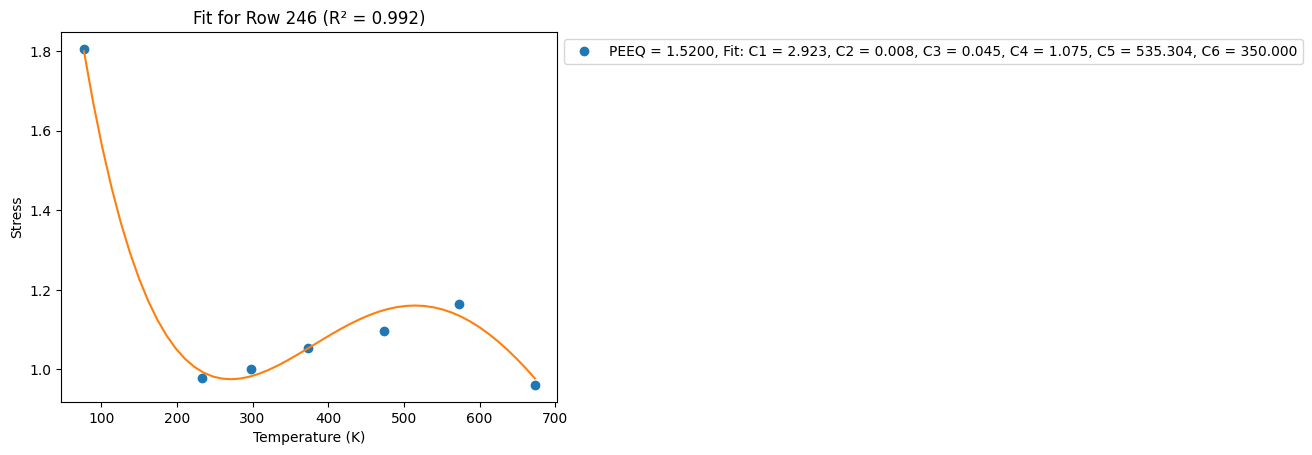

[1.80941767 0.97752954 1.         1.05321744 1.09818471 1.16472553
 0.96163013]


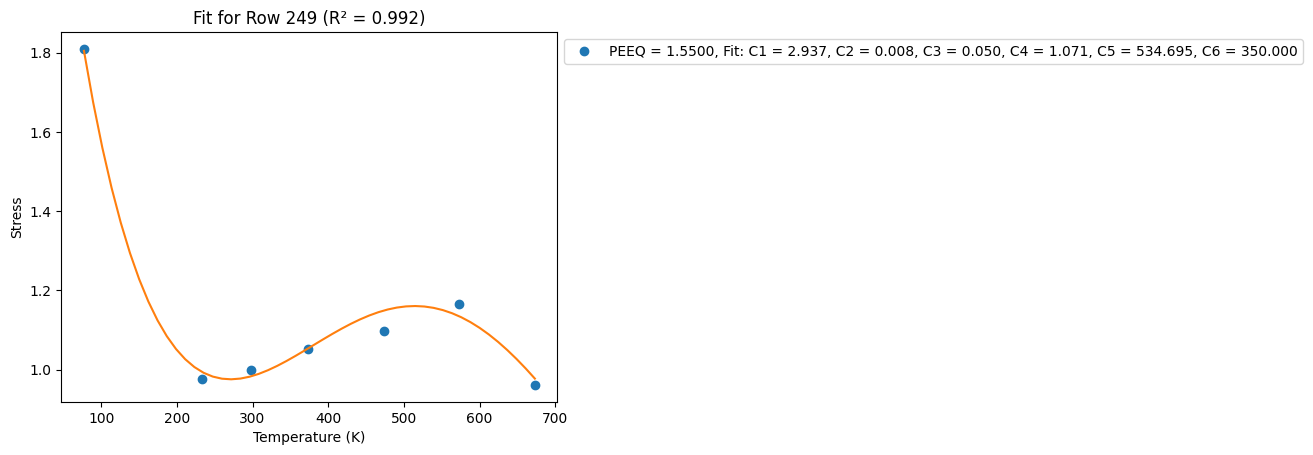

[1.81375723 0.97711139 1.         1.05378189 1.09856923 1.16542511
 0.96214389]


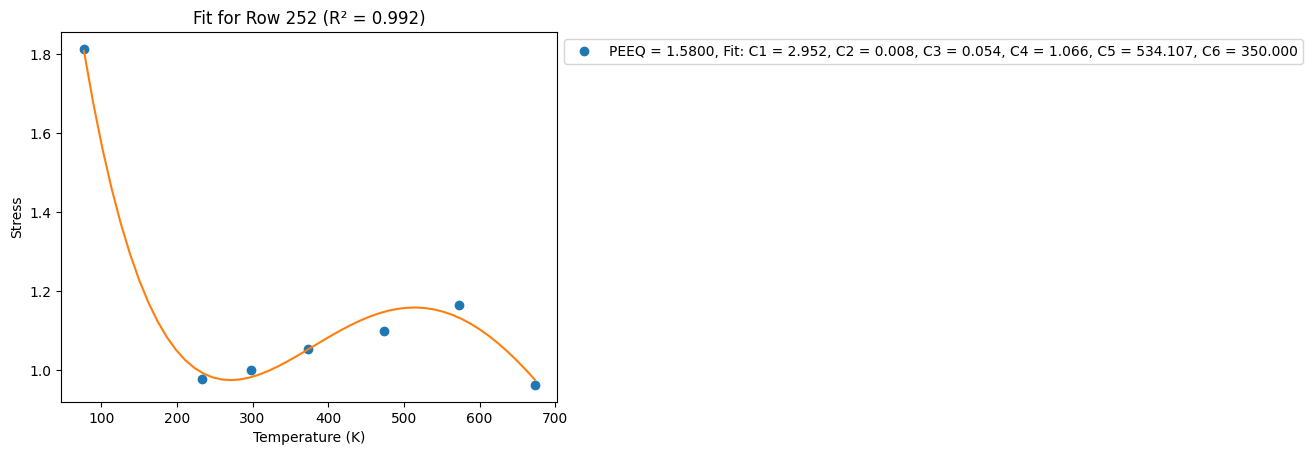

[1.81804425 0.9767025  1.         1.05433716 1.09894658 1.16611163
 0.96264928]


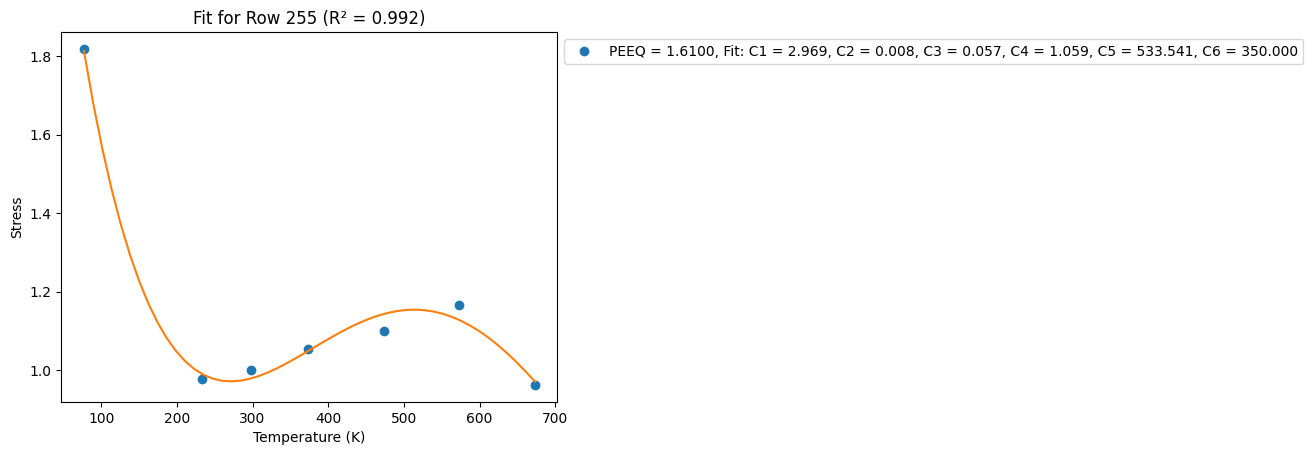

[1.82228027 0.9763025  1.         1.05488356 1.09931703 1.16678555
 0.96314657]


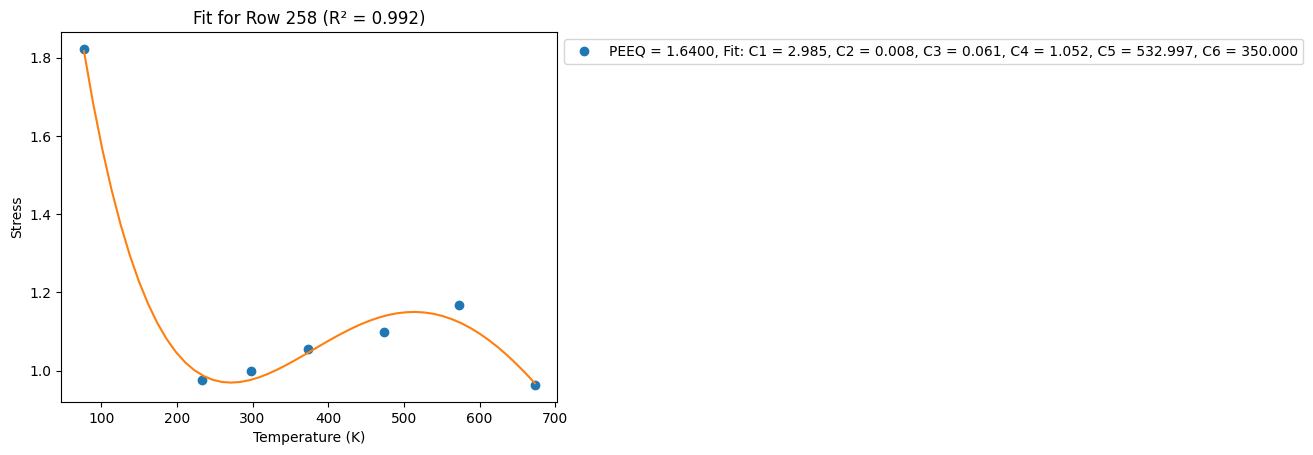

[1.82646678 0.97591106 1.         1.05542137 1.0996808  1.16744733
 0.96363603]


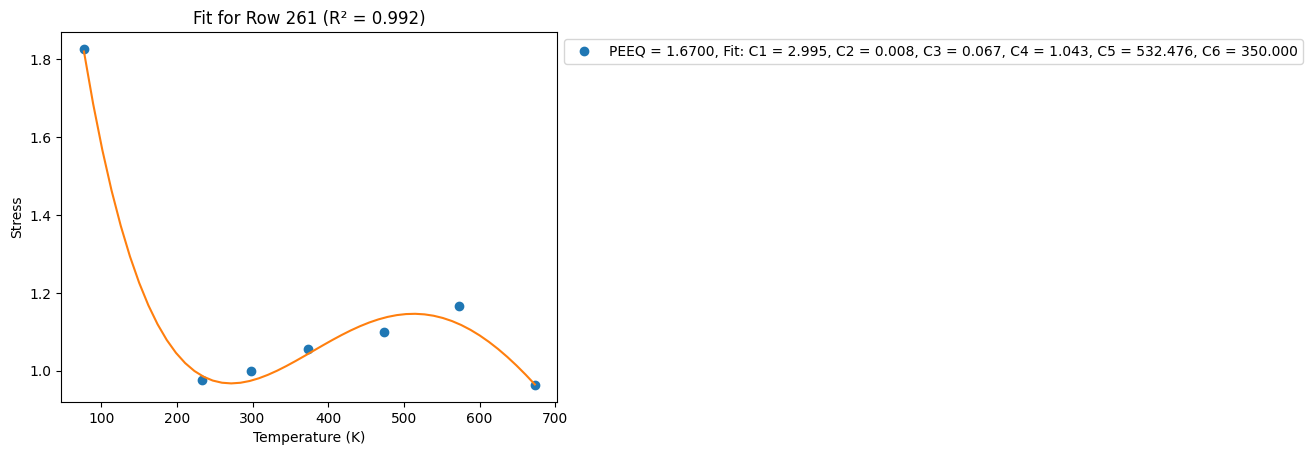

[1.83060517 0.97552784 1.         1.05595087 1.10003815 1.16809741
 0.96411792]


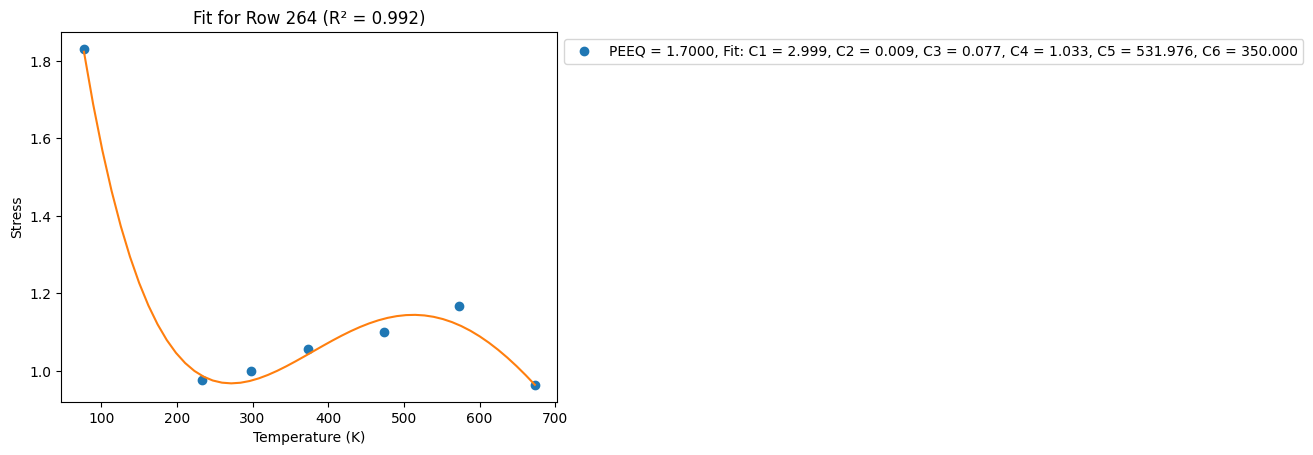

[1.8346968  0.97515253 1.         1.05647233 1.10038929 1.16873618
 0.96459247]


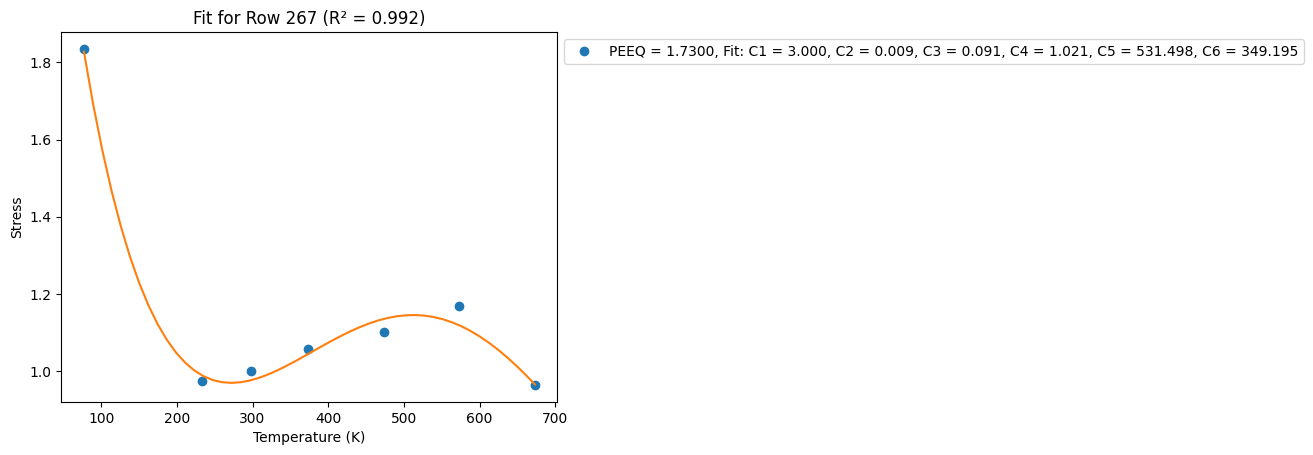

[1.83874295 0.97478485 1.         1.056986   1.10073443 1.16936403
 0.96505992]


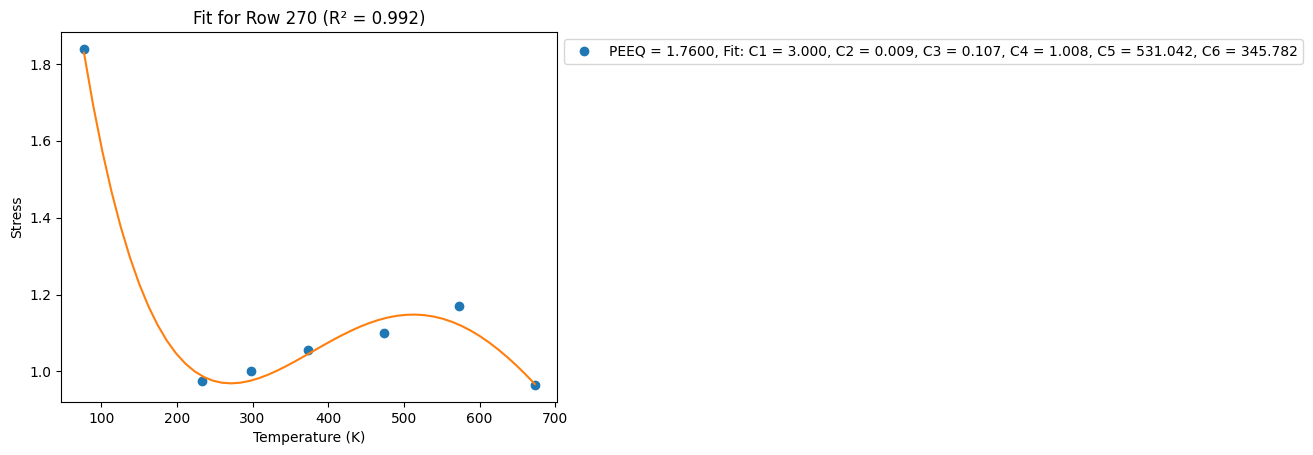

[1.84274486 0.97442451 1.         1.05749211 1.10107377 1.16998134
 0.96552048]


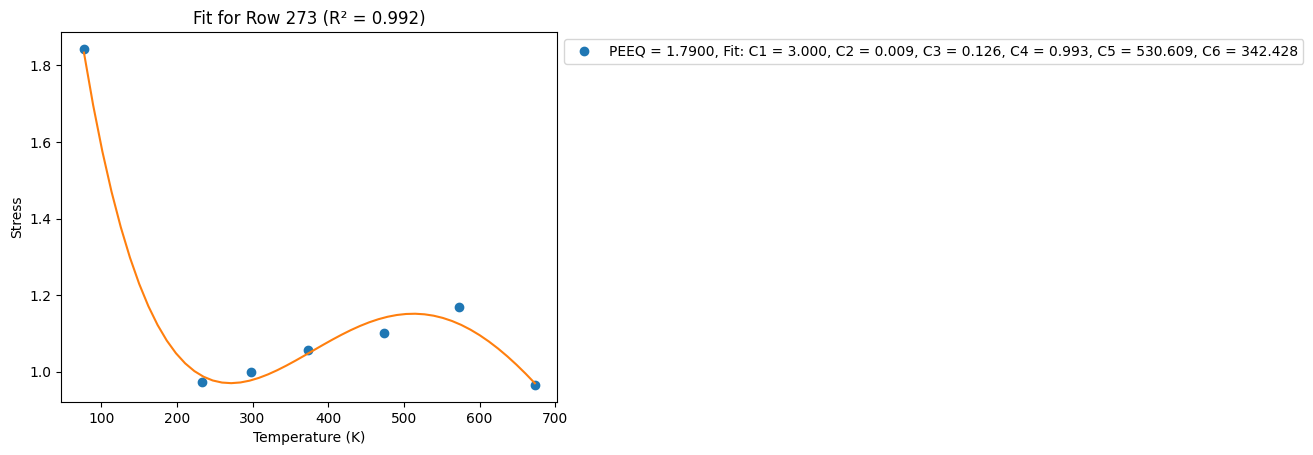

[1.84670369 0.97407126 1.         1.0579909  1.10140751 1.17058844
 0.96597437]


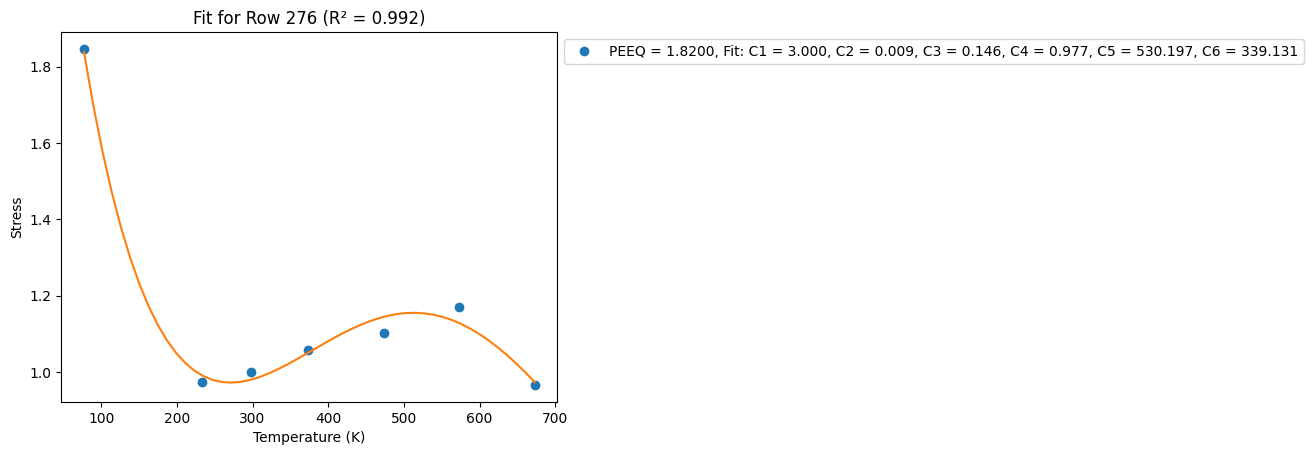

[1.85062059 0.97372485 1.         1.05848258 1.10173582 1.17118567
 0.96642177]


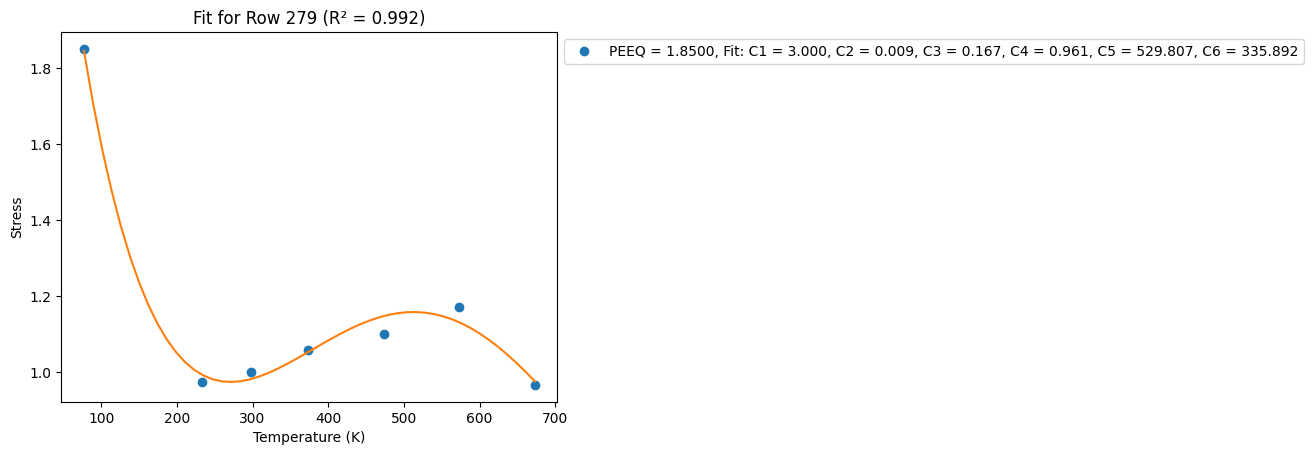

[1.85449662 0.97338503 1.         1.05896736 1.10205888 1.17177335
 0.96686289]


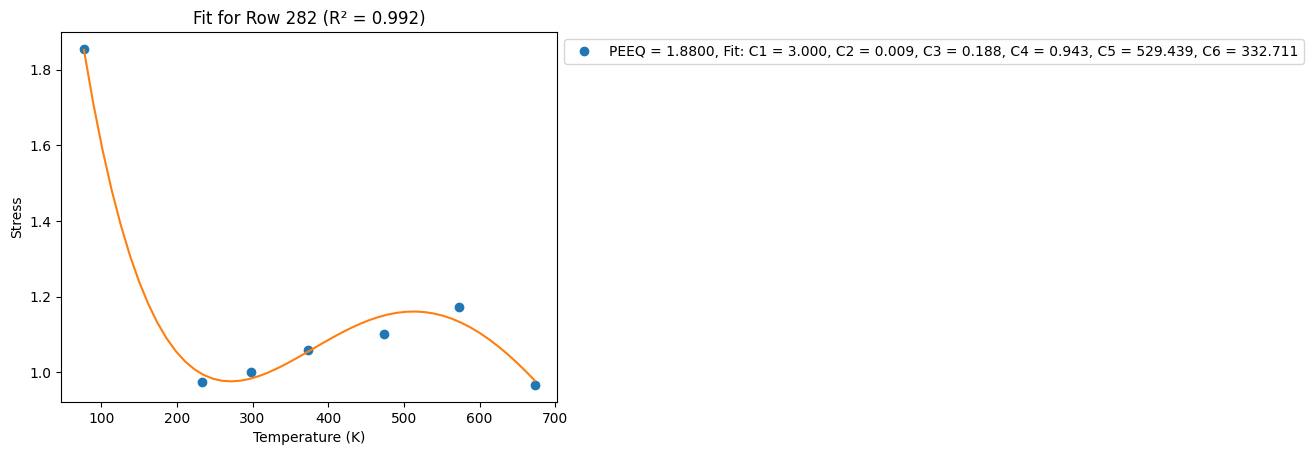

[1.85833284 0.97305159 1.         1.05944544 1.10237685 1.17235177
 0.96729789]


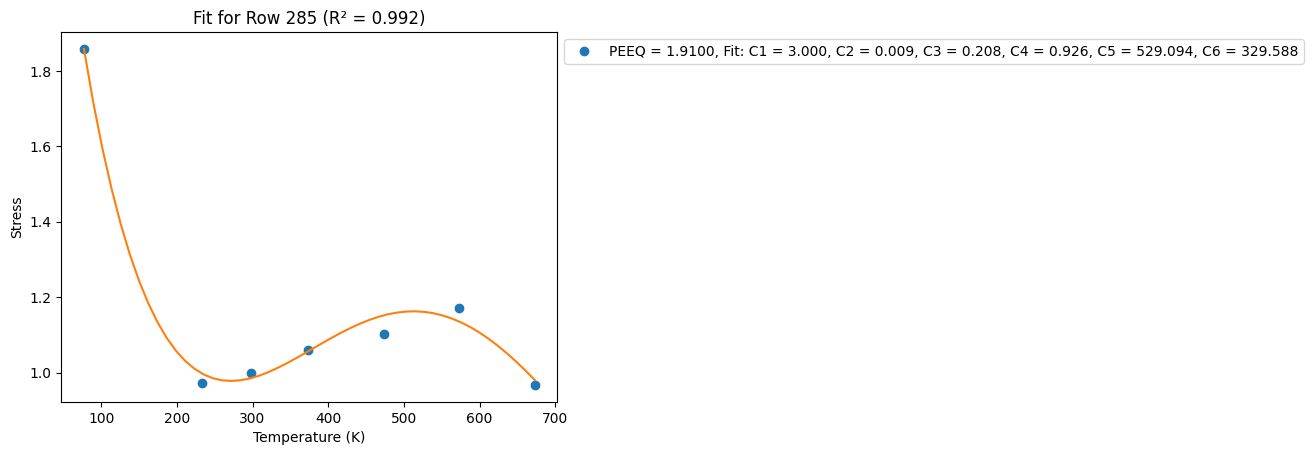

[1.86213024 0.97272431 1.         1.05991702 1.10268988 1.17292122
 0.96772697]


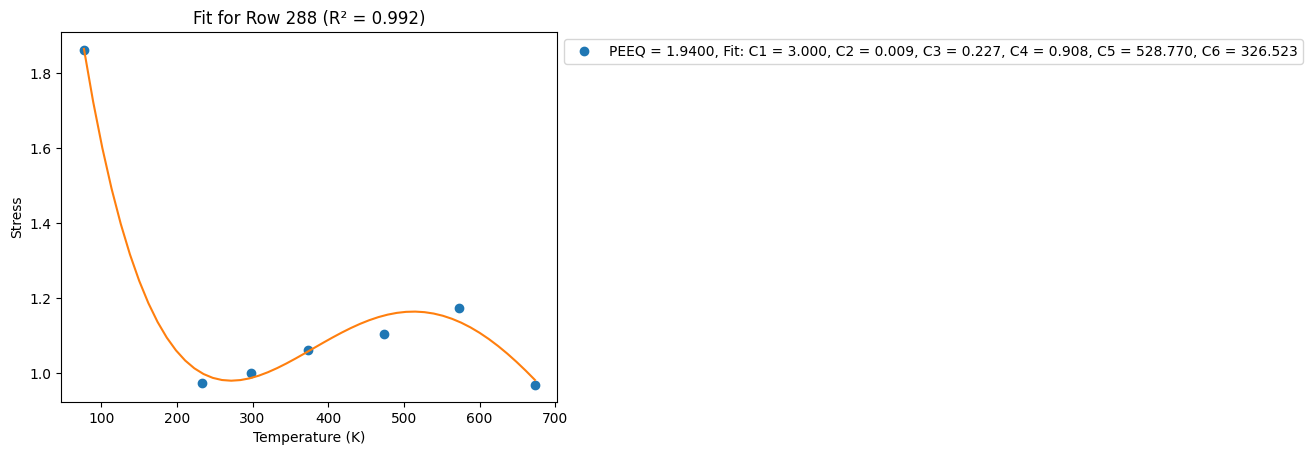

[1.86588977 0.97240299 1.         1.06038227 1.10299813 1.17348198
 0.96815028]


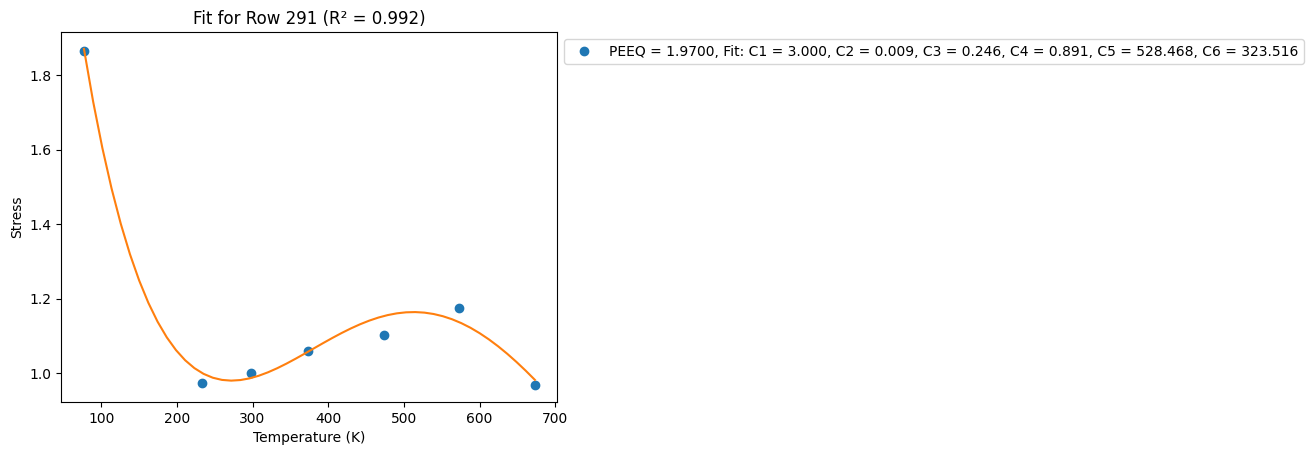

[1.86961236 0.97208743 1.         1.06084136 1.10330175 1.1740343
 0.96856797]


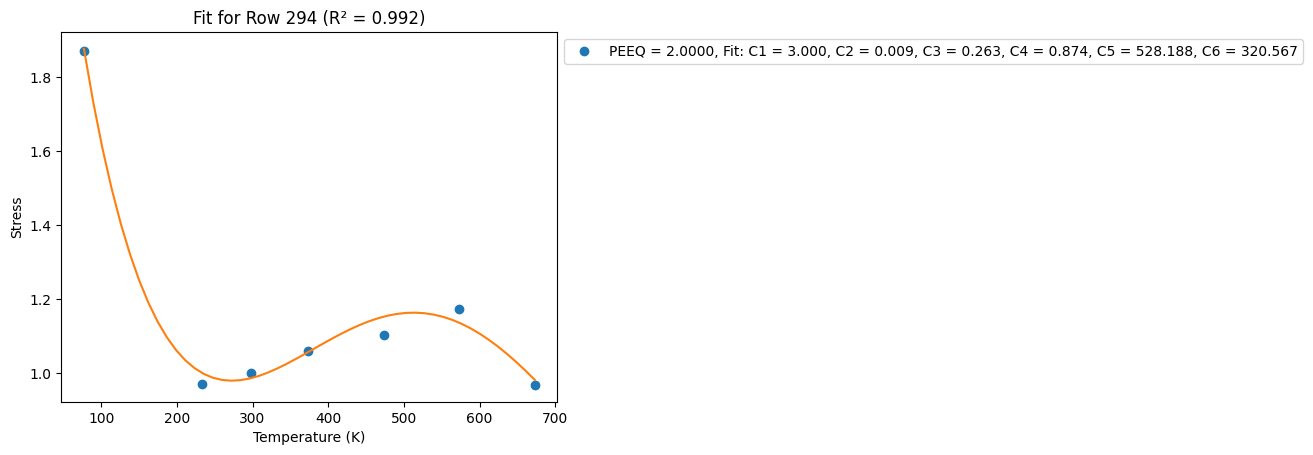

[1.87329889 0.97177744 1.         1.06129447 1.10360086 1.17457844
 0.96898022]


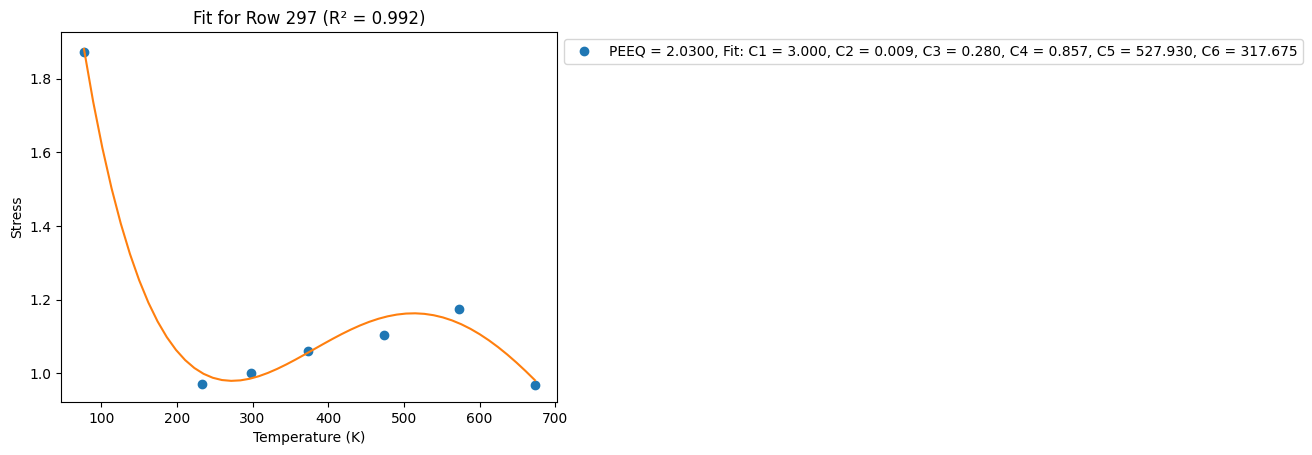

[1.87695021 0.97147286 1.         1.06174176 1.10389559 1.17511463
 0.96938715]


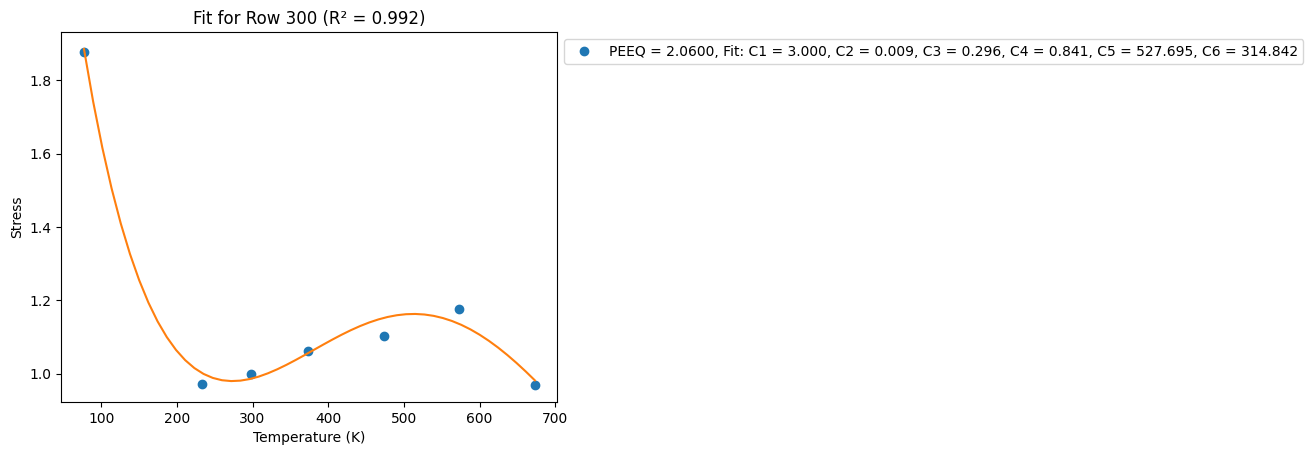

[1.88056715 0.97117351 1.         1.06218337 1.10418608 1.1756431
 0.96978892]


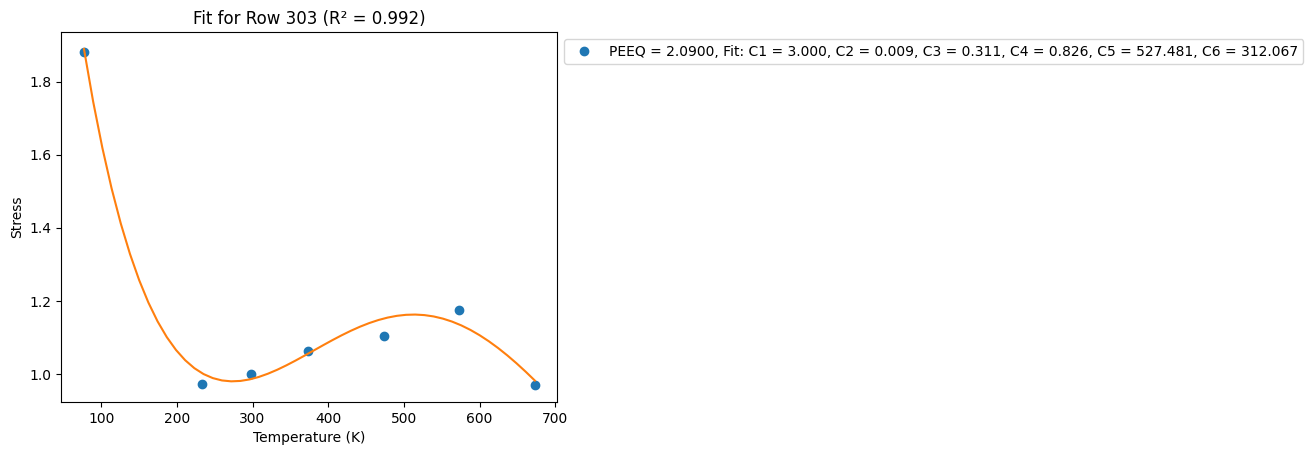

[1.88415048 0.97087923 1.         1.06261946 1.10447244 1.17616407
 0.97018565]


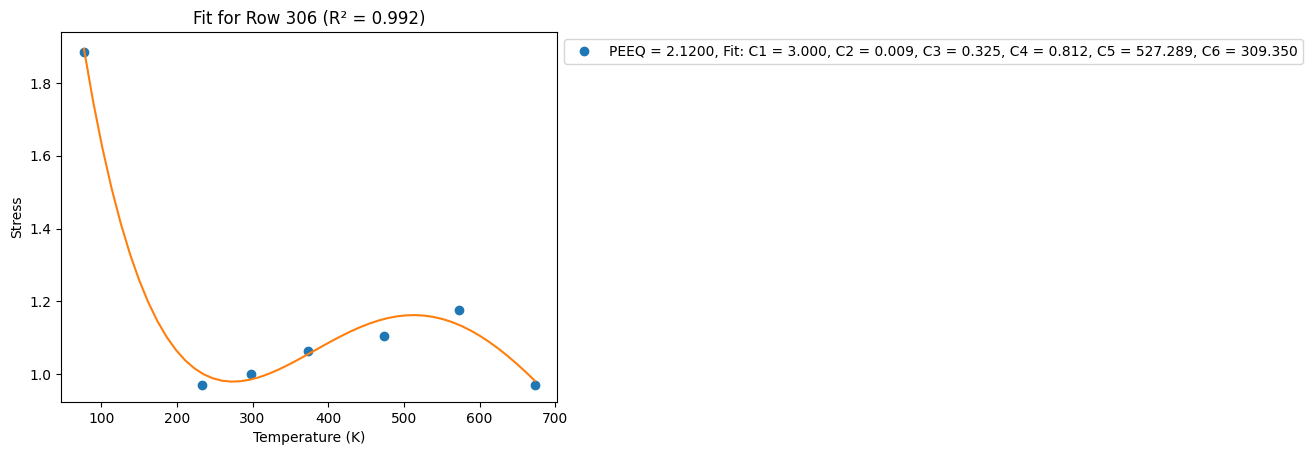

[1.88770098 0.97058988 1.         1.06305017 1.10475479 1.17667776
 0.97057748]


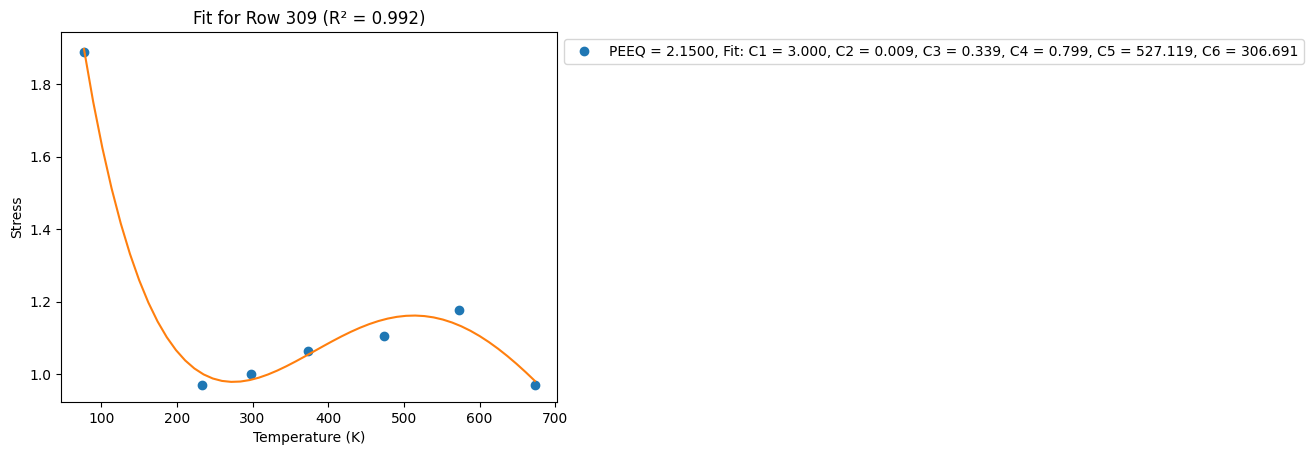

[1.89121938 0.97030529 1.         1.06347564 1.10503324 1.17718435
 0.97096453]


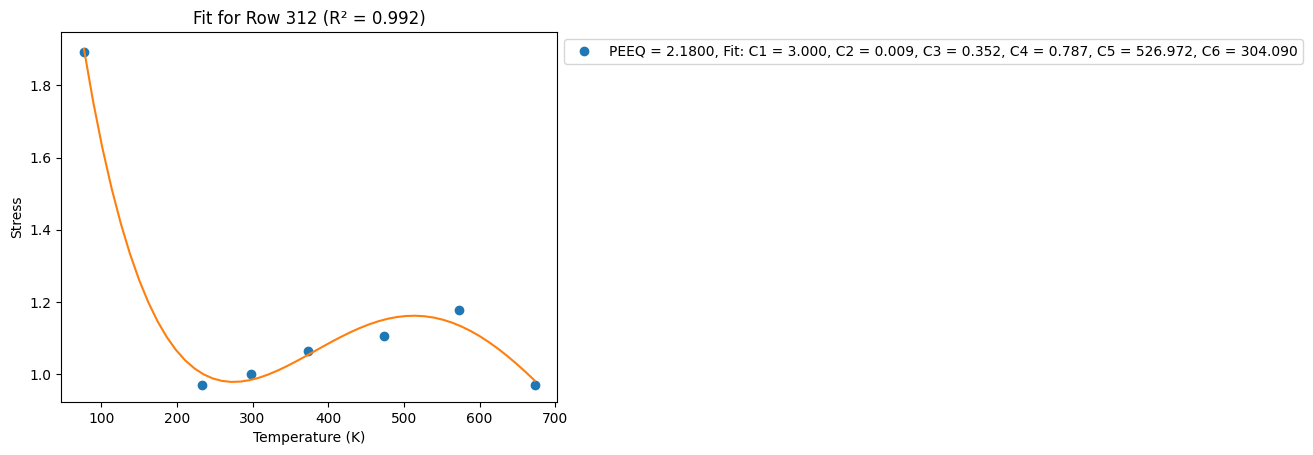

[1.89470638 0.97002533 1.         1.063896   1.10530789 1.17768405
 0.97134692]


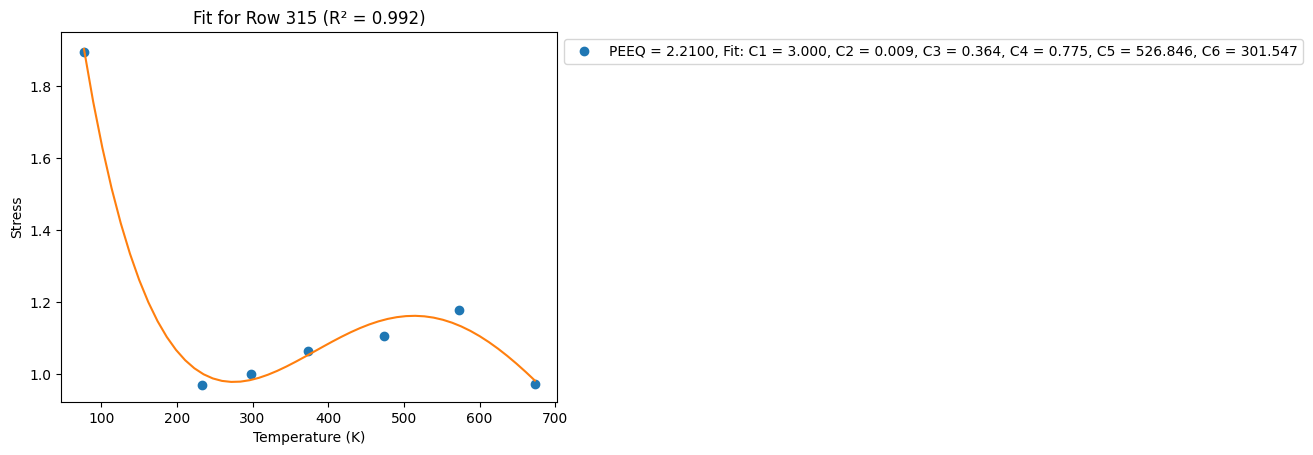

[1.89816267 0.96974987 1.         1.06431136 1.10557884 1.17817703
 0.97172477]


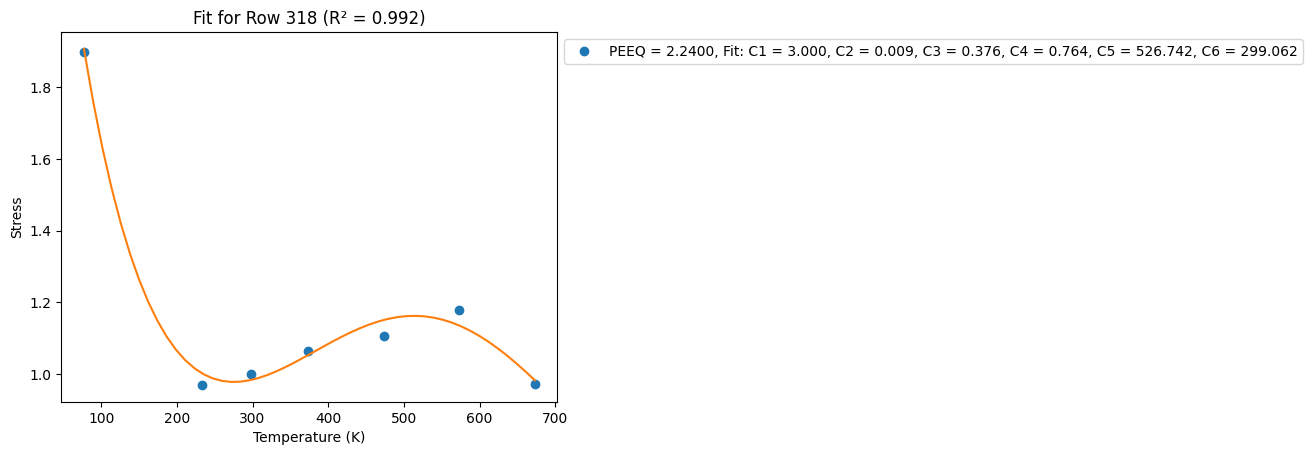

[1.90158891 0.96947877 1.         1.06472187 1.10584619 1.17866348
 0.97209818]


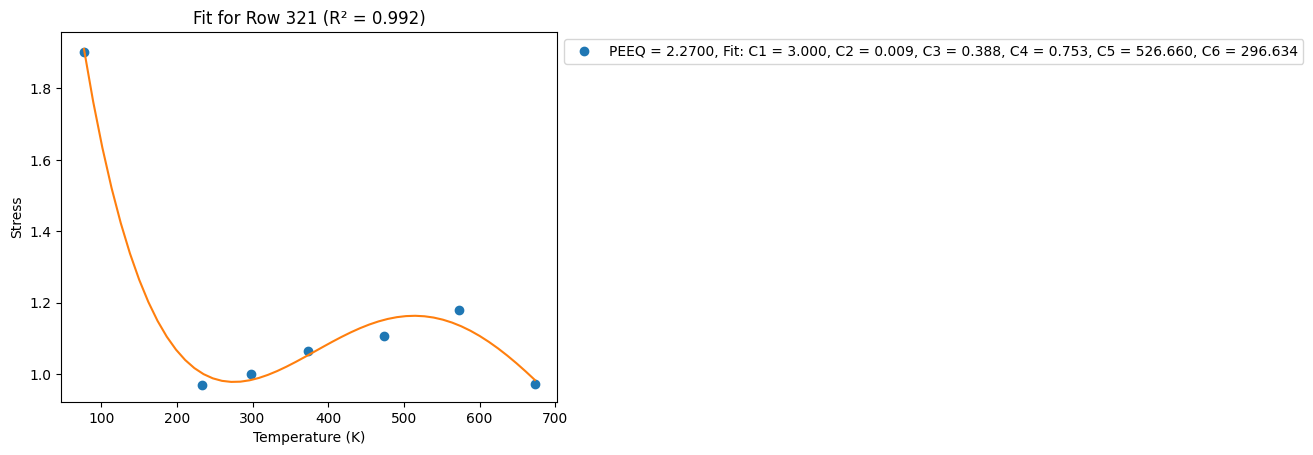

[1.90498574 0.96921191 1.         1.06512763 1.10611004 1.17914357
 0.97246727]


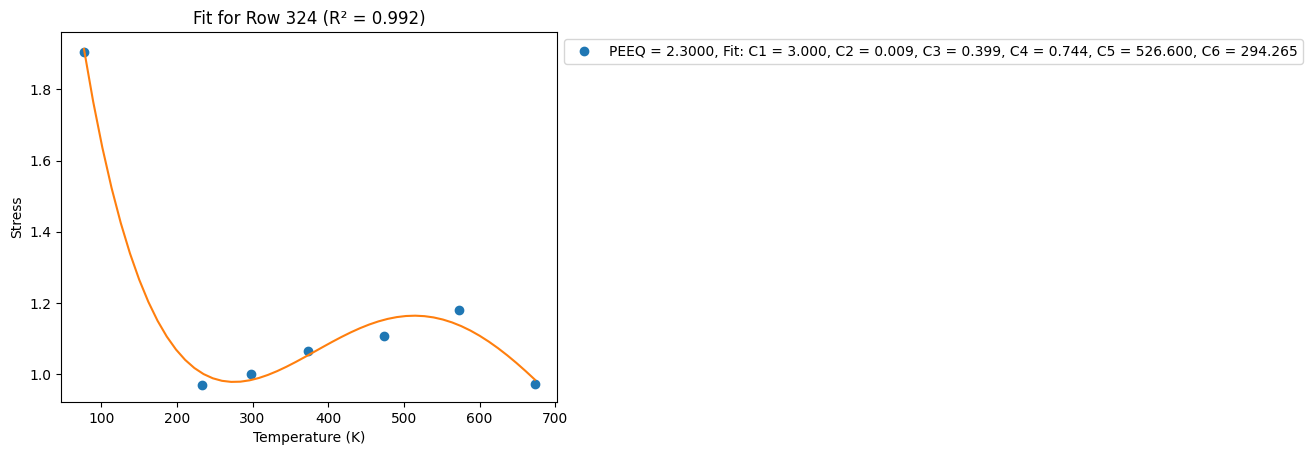

[1.90835377 0.96894918 1.         1.06552875 1.10637048 1.17961746
 0.97283214]


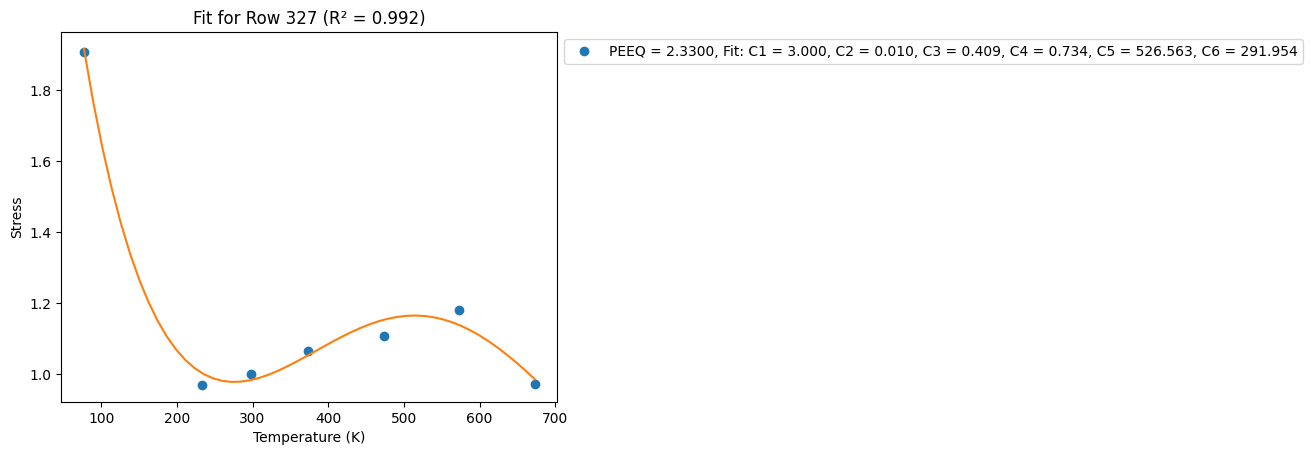

[1.9116936  0.96869045 1.         1.06592534 1.10662758 1.1800853
 0.97319288]


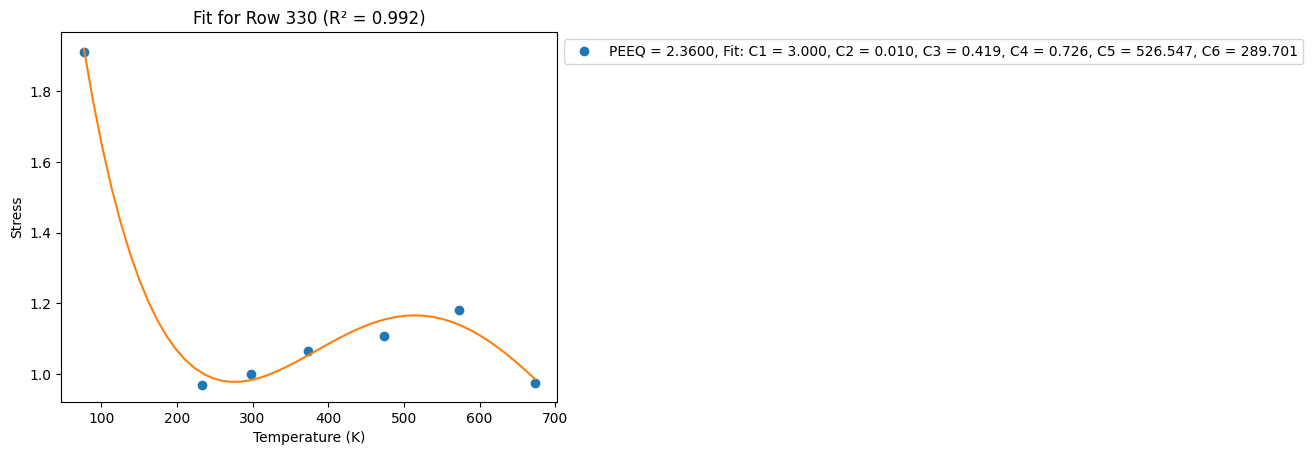

[1.9150058  0.96843563 1.         1.06631752 1.10688144 1.18054726
 0.9735496 ]


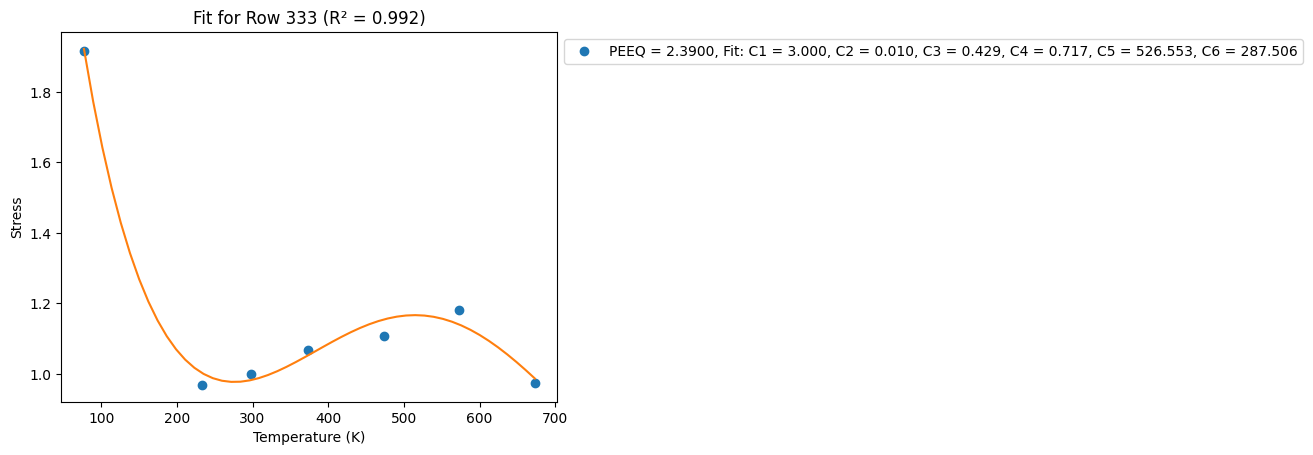

[1.91829094 0.96818459 1.         1.06670538 1.10713214 1.18100347
 0.97390237]


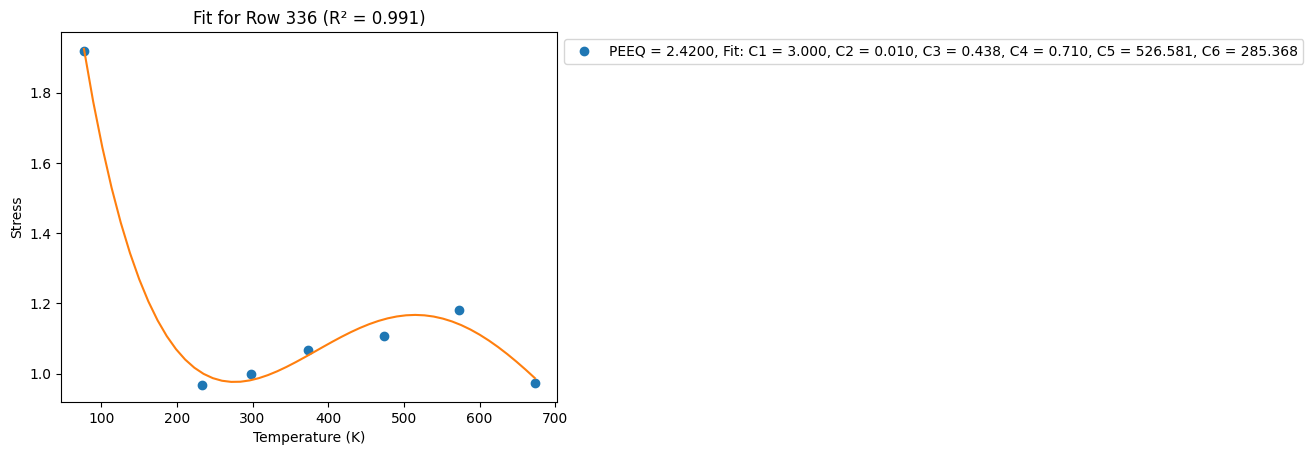

[1.92154954 0.96793725 1.         1.06708902 1.10737974 1.18145408
 0.97425131]


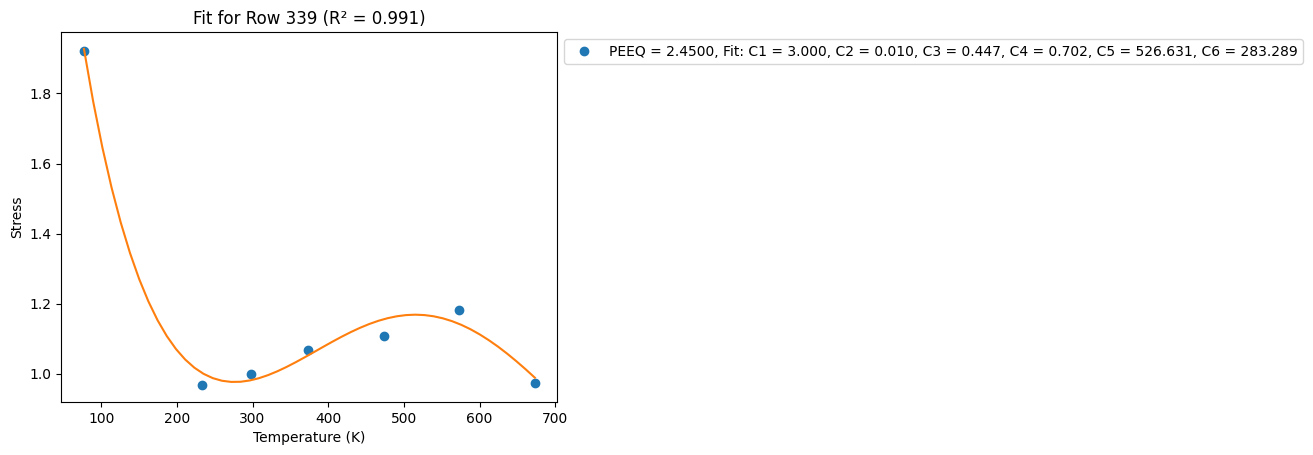

[1.92478215 0.9676935  1.         1.06746853 1.10762434 1.18189921
 0.97459648]


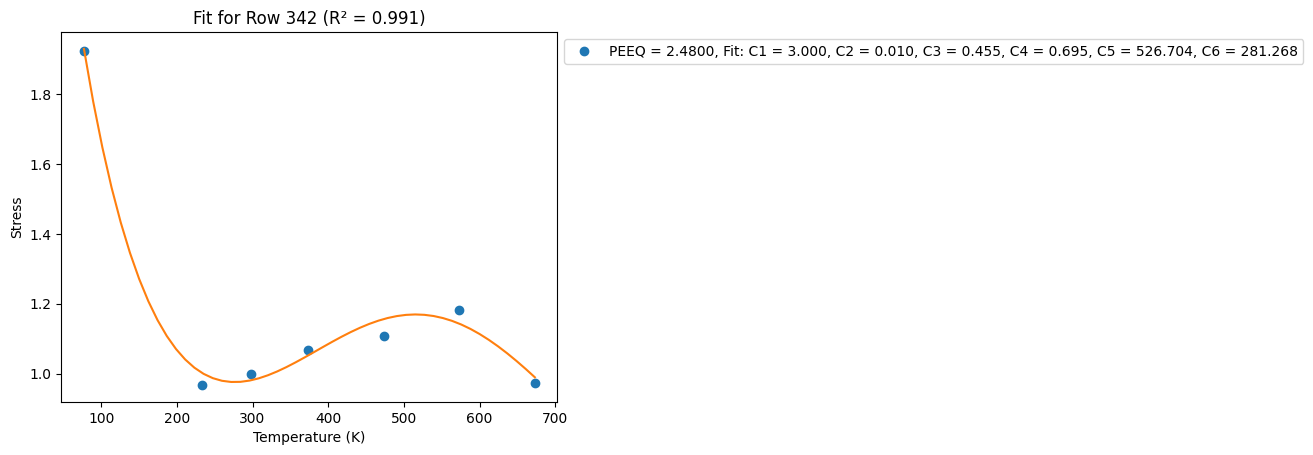

[1.92798925 0.96745326 1.         1.067844   1.10786599 1.18233901
 0.97493798]


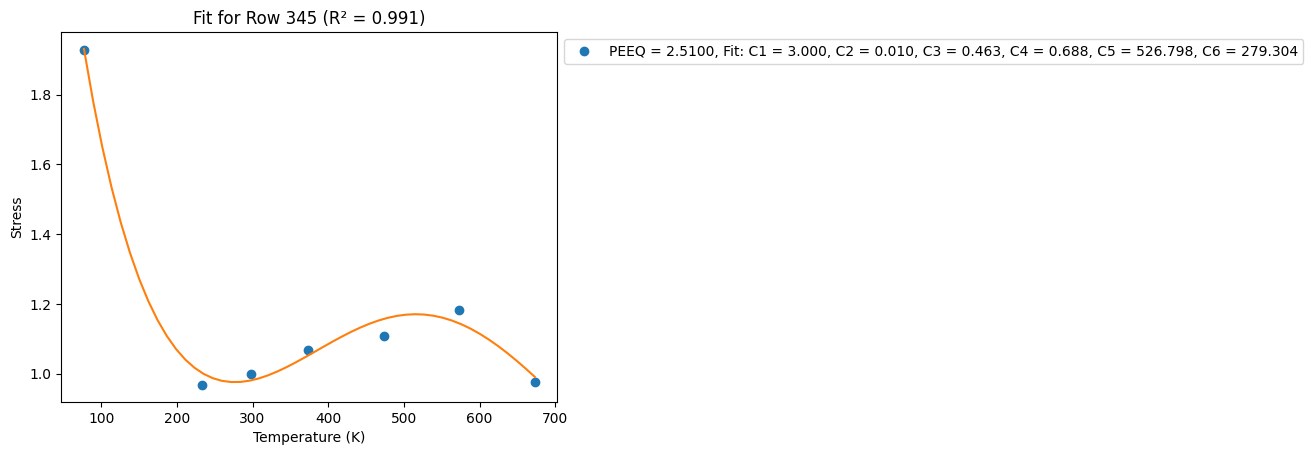

[1.93117135 0.96721642 1.         1.06821553 1.10810477 1.1827736
 0.97527588]


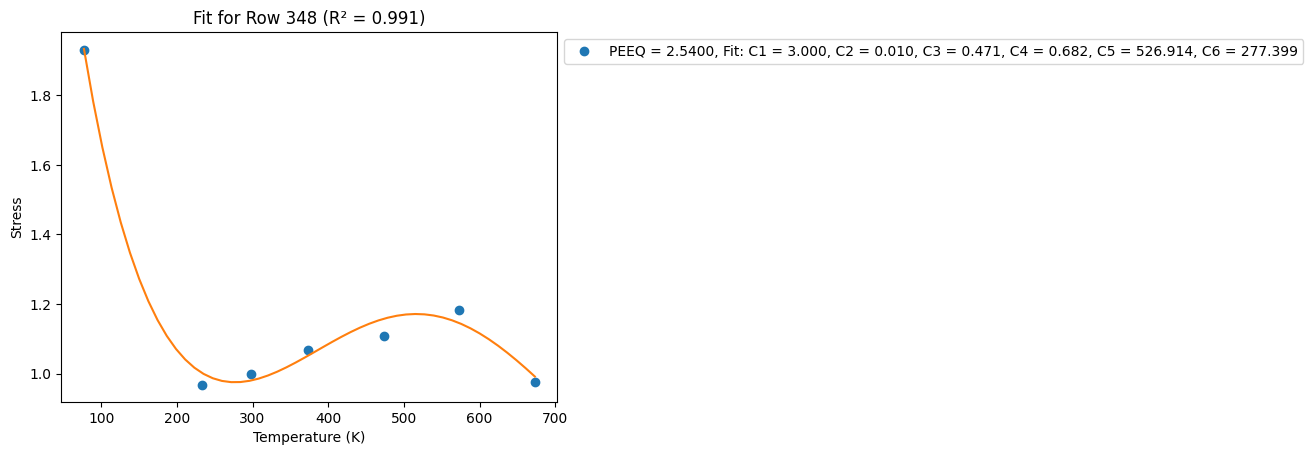

[1.93432892 0.96698291 1.         1.0685832  1.10834075 1.1832031
 0.97561026]


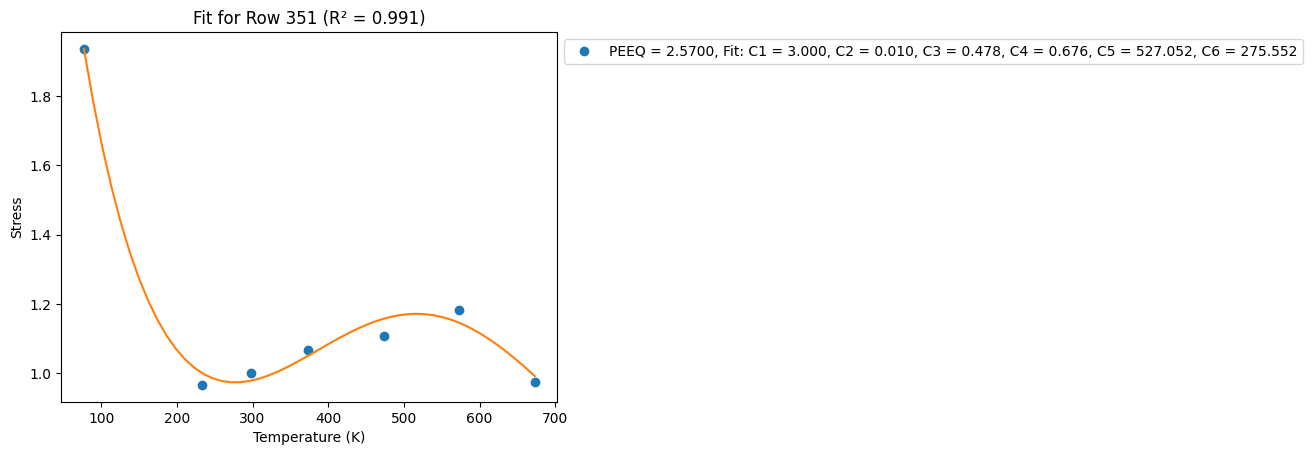

[1.93746242 0.96675264 1.         1.06894708 1.10857398 1.18362763
 0.9759412 ]


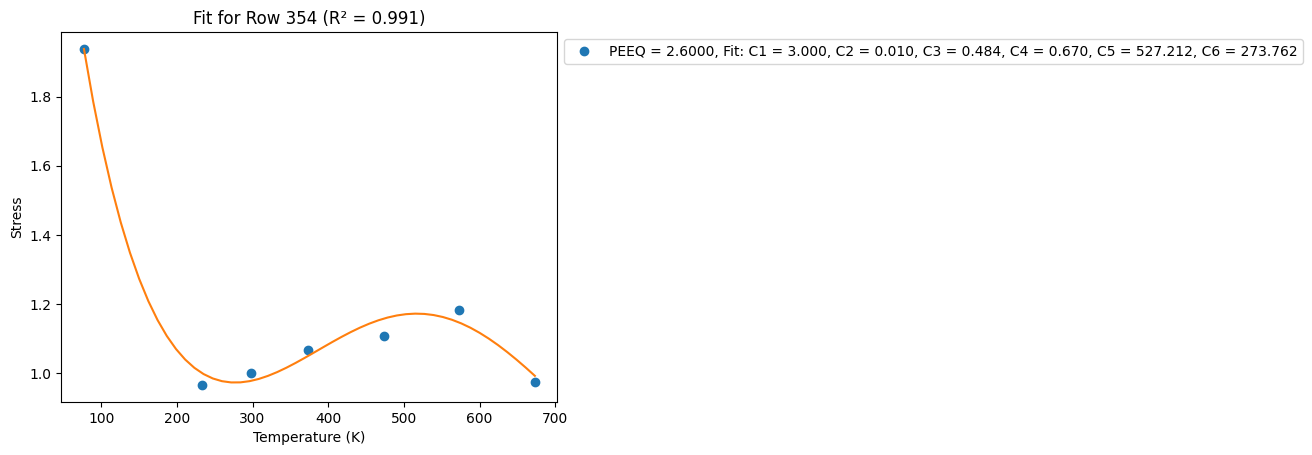

[1.9405723  0.96652553 1.         1.06930727 1.10880454 1.1840473
 0.97626878]


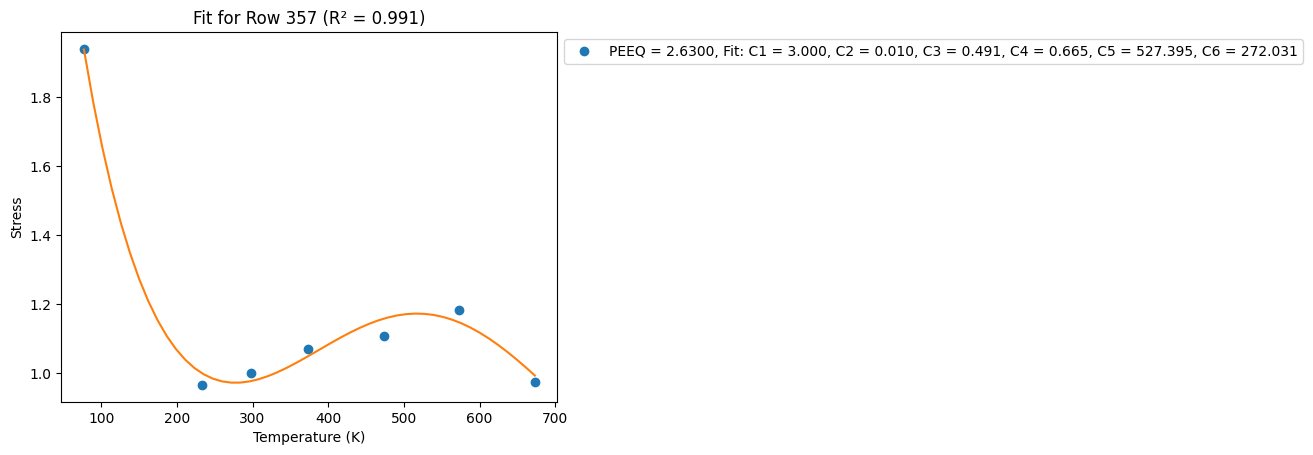

[1.94365899 0.9663015  1.         1.06966384 1.10903248 1.18446222
 0.97659305]


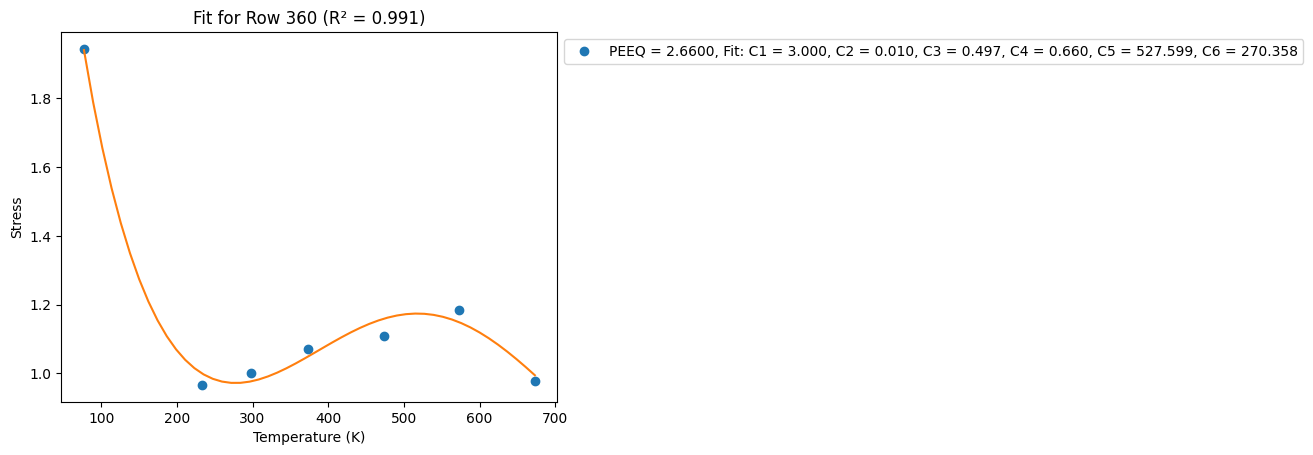

[1.94672292 0.96608047 1.         1.07001686 1.10925786 1.18487249
 0.97691409]


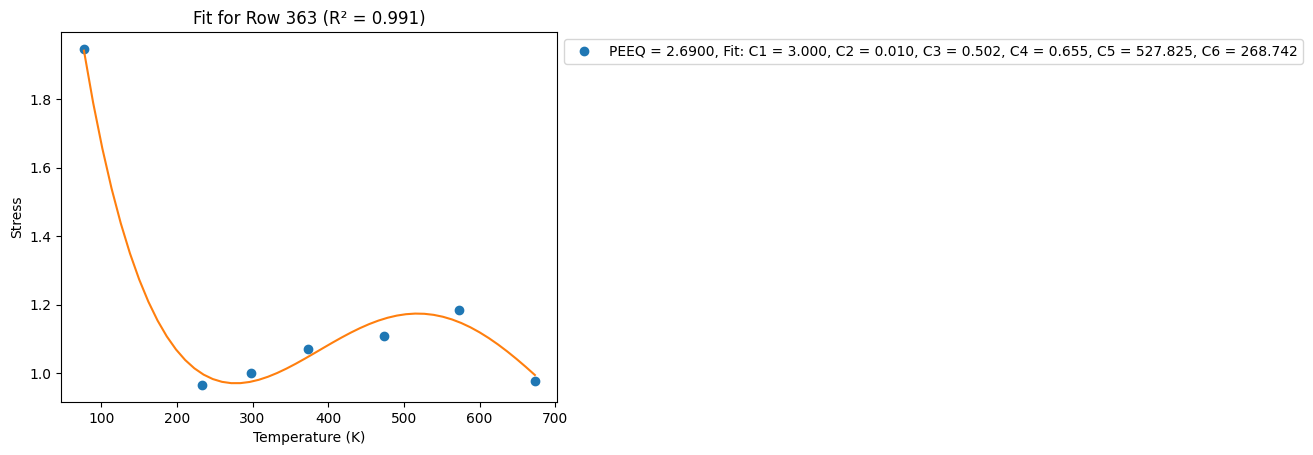

[1.9497645  0.96586238 1.         1.0703664  1.10948073 1.18527823
 0.97723196]


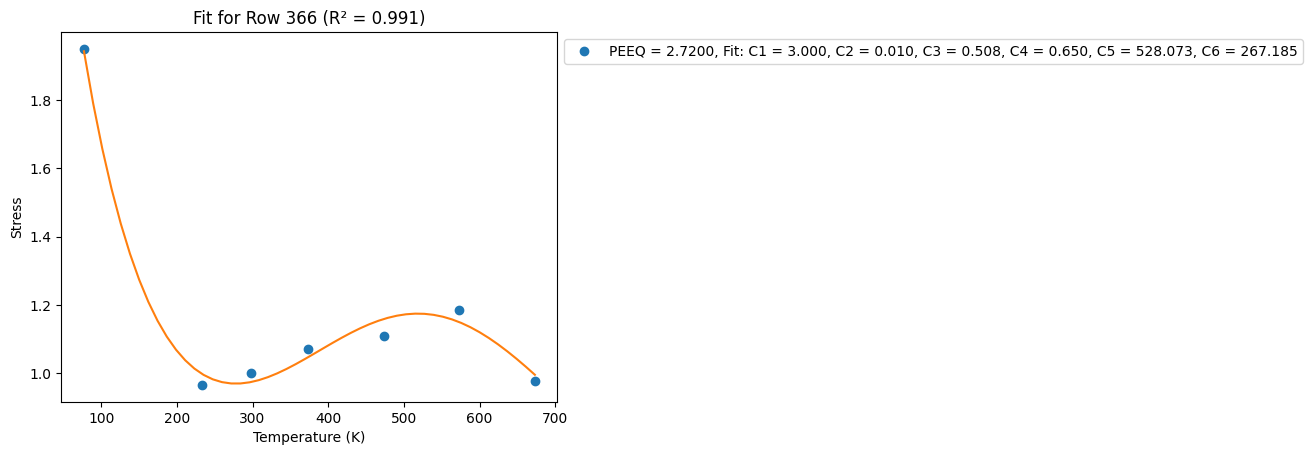

[1.95278412 0.96564715 1.         1.07071254 1.10970116 1.18567952
 0.97754674]


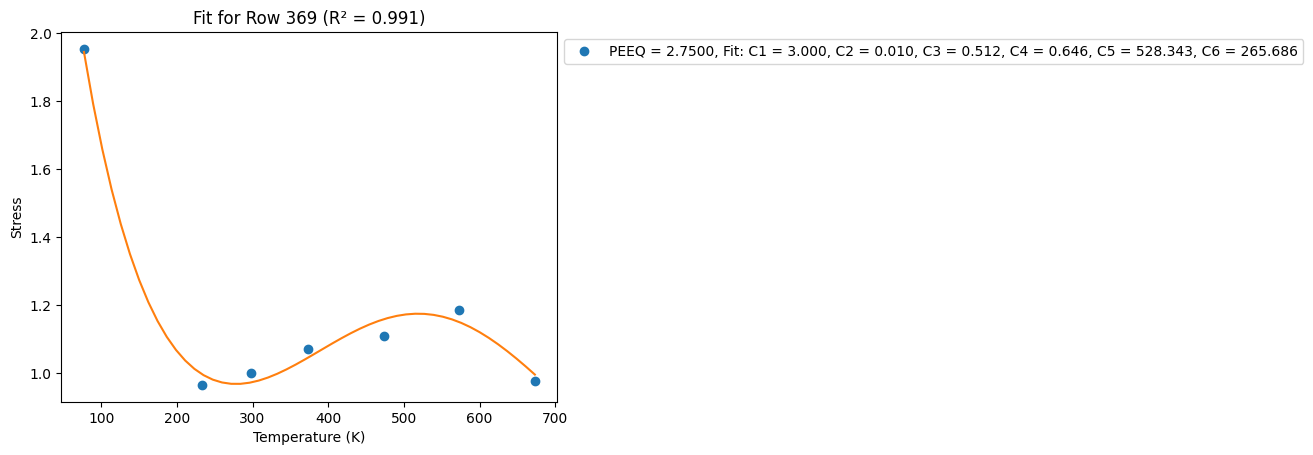

[1.95578217 0.96543472 1.         1.07105535 1.10991919 1.18607647
 0.97785848]


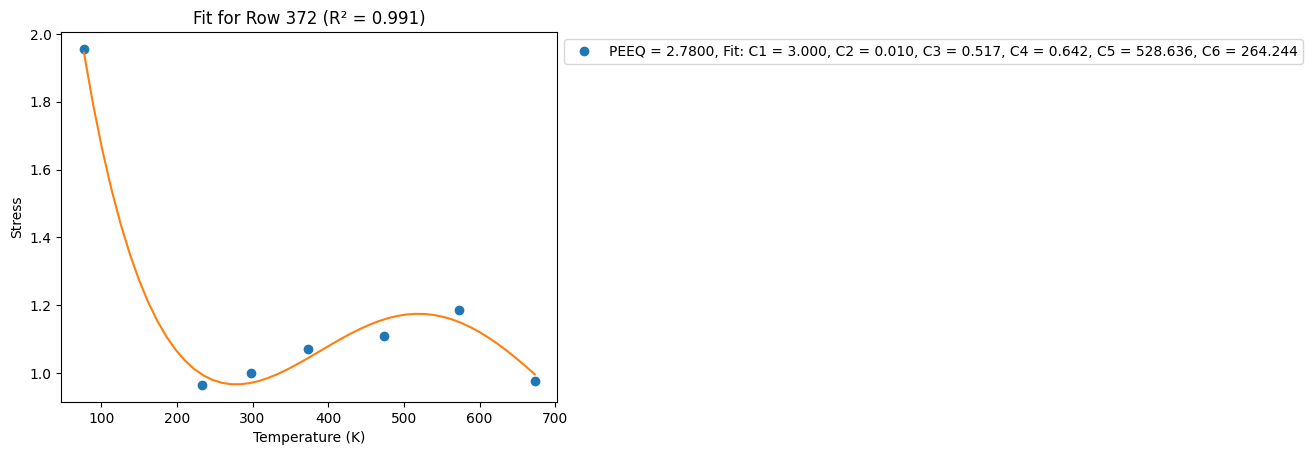

[1.95875903 0.96522502 1.         1.07139489 1.11013488 1.18646917
 0.97816724]


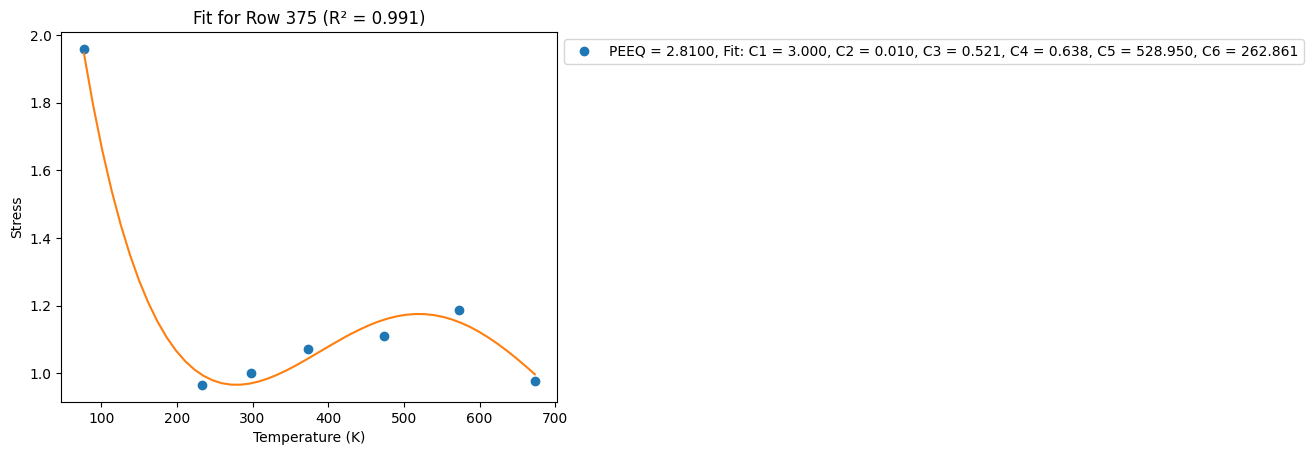

[1.96171507 0.96501799 1.         1.07173122 1.11034827 1.1868577
 0.97847308]


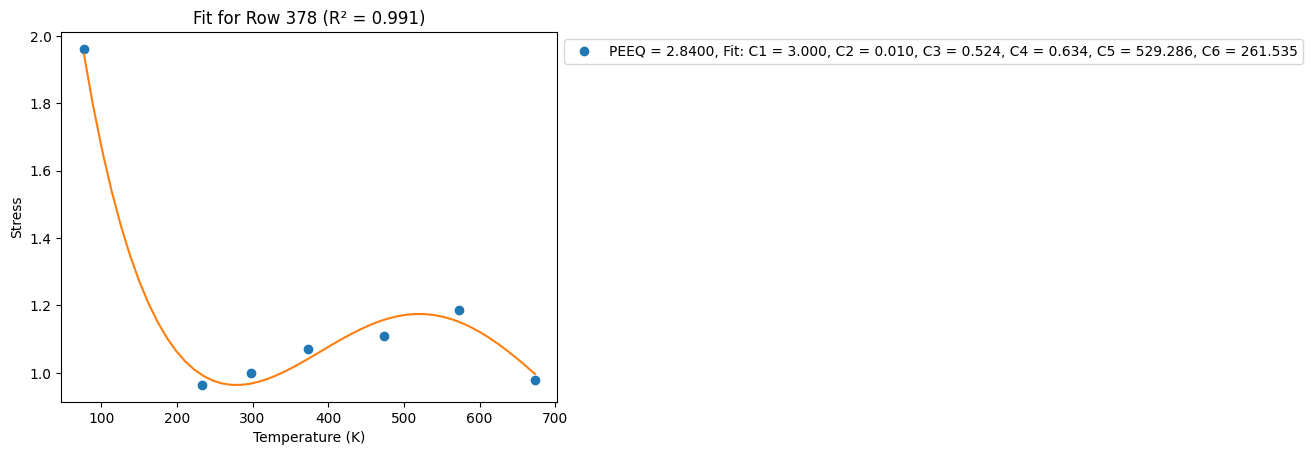

[1.96465063 0.96481357 1.         1.07206441 1.11055941 1.18724216
 0.97877606]


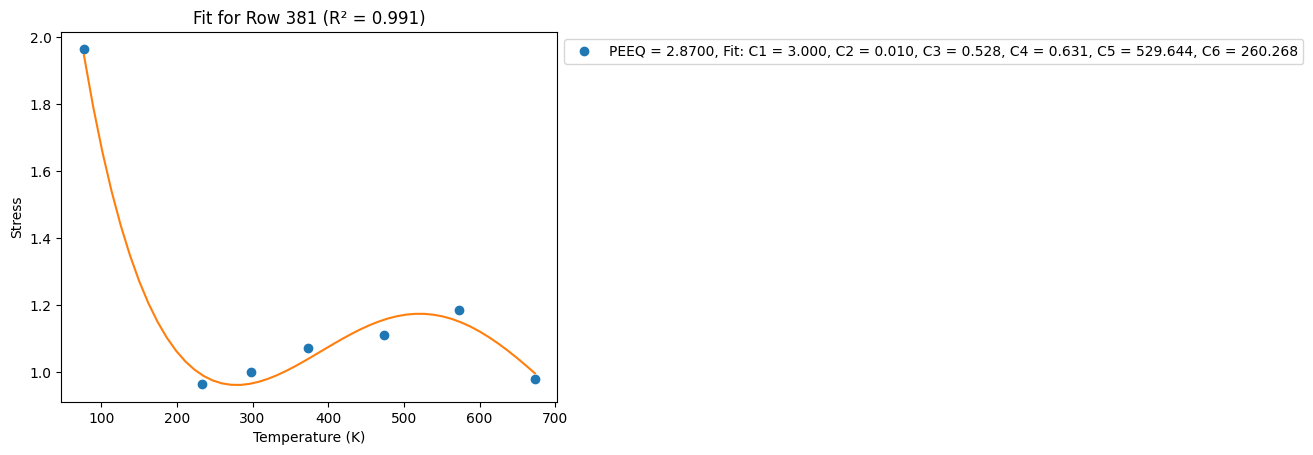

[1.96756607 0.96461169 1.         1.07239452 1.11076835 1.18762262
 0.97907623]


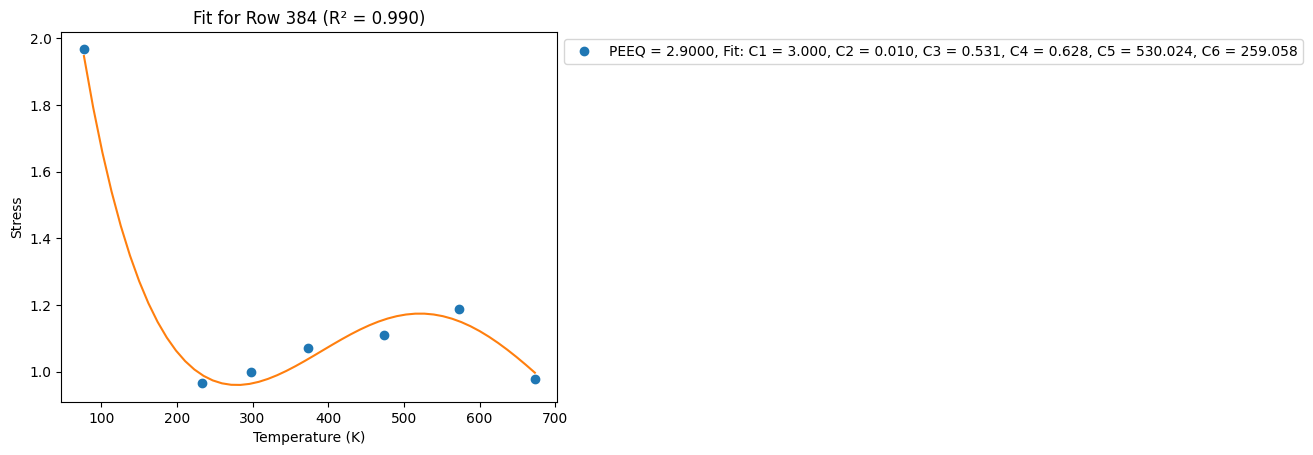

[1.97046173 0.96441231 1.         1.0727216  1.11097513 1.18799918
 0.97937364]


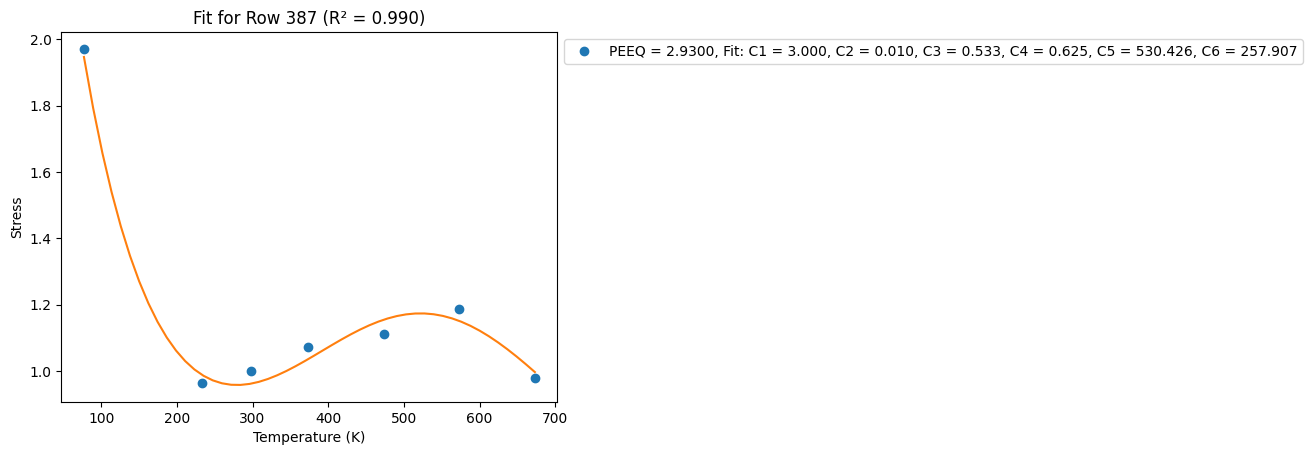

[1.97333792 0.96421536 1.         1.07304571 1.1111798  1.1883719
 0.97966836]


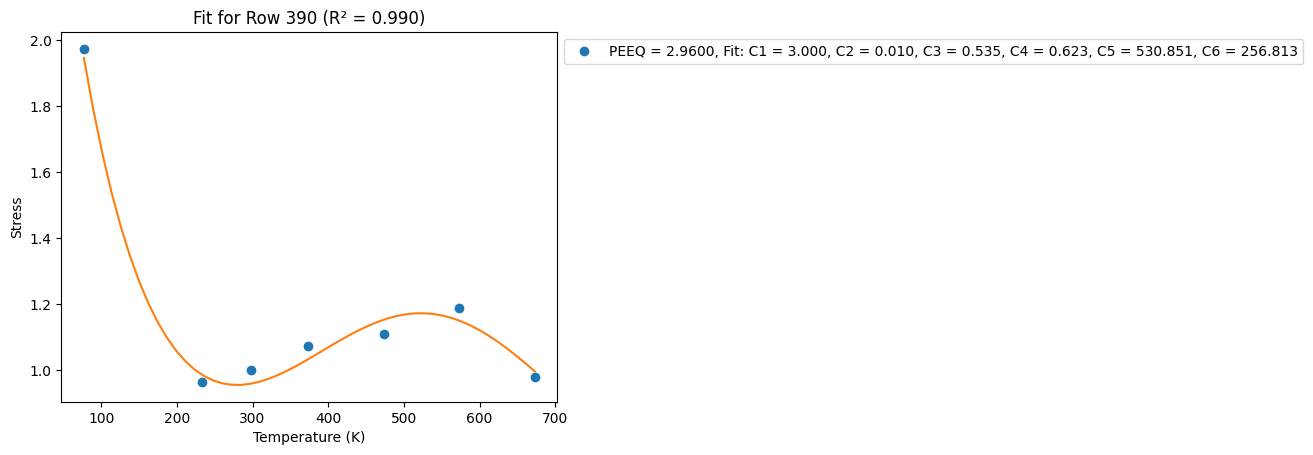

[1.97619498 0.96402079 1.         1.07336692 1.11138241 1.18874087
 0.97996042]


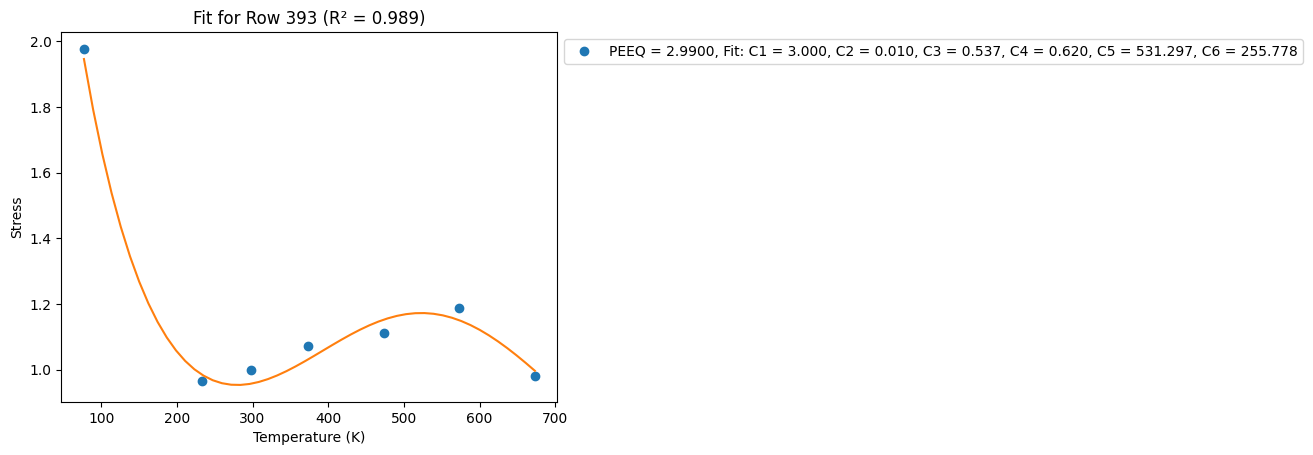

In [49]:
file_path = "Fitted_FC_TmpDpn_RD_StrRt0.0001_ref.csv"
stress_data = pd.read_csv(file_path)

fitted_para = pd.read_csv('fitted_C1_C2_C3_C4_C5_C6_values.csv')

# Temperature function
def f_func(T, C1, C2, C3, C4, C5, C6):
    return C1 * np.exp(-C2 * T) + C3 + C4 * np.exp(-((T - C5) / C6)**2)

for j, i in enumerate([0,1,2, 3,4,5, 6,7,8, 9,10,11, 12,13,14,15,18,21,24,27,30,33, 36, 39, 42, 45, 48, 51,
         54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105,
         108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 
         153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 
         198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234, 237, 240, 
         243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273, 276, 279, 282, 285, 
         288, 291, 294, 297, 300, 303, 306, 309, 312, 315, 318, 321, 324, 327, 330, 
         333, 336, 339, 342, 345, 348, 351, 354, 357, 360, 363, 366, 369, 372, 375,
         378, 381, 384, 387, 390, 393]):
    T_fit = np.linspace(np.min(T), np.max(T), 50)
    [C1, C2, C3, C4, C5, C6] = fitted_para.iloc[i, 1:]
    y = stress_data.iloc[i, 8:].values
    print(y)
    gaussian_fit = f_func(T_fit, C1, C2, C3, C4, C5, C6)

    # Calculate residuals for error estimation
    residuals = y - f_func(T, C1, C2, C3, C4, C5, C6)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.plot(T, y, 'o', T_fit, gaussian_fit)
    plt.xlabel("Temperature (K)")
    plt.ylabel("Stress")
    plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
    plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    
else:
    str(0)